Part 1 - Segmenting images using K-means clustering (OpenCV)
(Can be used for dimensionality reduction)

Thanks to this wonderful article which teaches how to use K-means clustering in OpenCV.
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_ml/py_kmeans/py_kmeans_opencv/py_kmeans_opencv.html#kmeans-opencv

In [1]:
# install opencv
#!pip install opencv-python

# import libraries
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import numpy as np

In [49]:
# read the image
image_bgr = cv2.imread('Valley-Taurus-Mountains-Turkey.jpg')
image = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

In [3]:
# change rgb to hsv 
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_RGB2HSV)

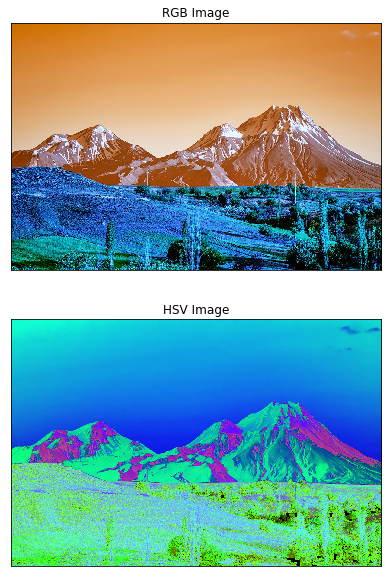

In [4]:
# Plot the images
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(image_hsv)
ax[1].set_title("HSV Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

Text(0.5, 0, 'Value')

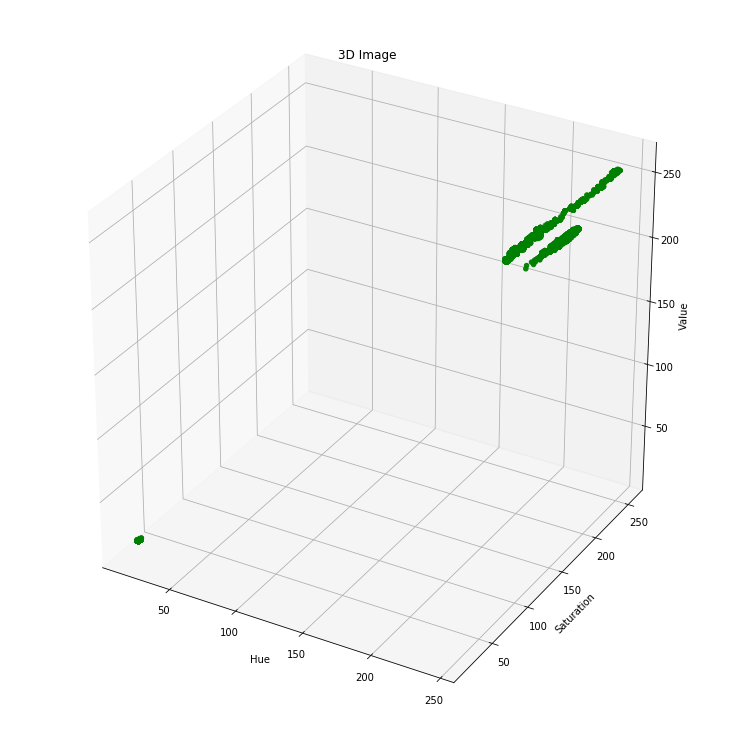

In [5]:
# Look at the points in 3D
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)
# colors = cm.rainbow(np.linspace(0, 1, 3))
ax.scatter3D(image_hsv[0].flatten(), image_hsv[1].flatten(), image_hsv[2].flatten(), c='g')
ax.set_title('3D Image')
ax.set_xlabel('Hue')
ax.set_ylabel('Saturation')
ax.set_zlabel('Value')
# ax.scatter3D(image[0].flatten(), image[1].flatten(), image[2].flatten())

In [6]:
# flatten each image dimension. Each dimension will be considered as one feature. So there will be three features. 
img_hsv = image_hsv.reshape(-1, 3)
img_hsv.shape

(1707200, 3)

In [7]:
# K means clustering parameters

# repeat for multiple values of k (no of clusters)
K = [2,3,4,5,6,7,8,9,10,11,12,14,15]

# no of attempts - run with a different center value. 
attempts = 20

# either run for 10 iterations or till accuracy of 1 is reached.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [8]:
# calculate within cluster sum of squares
wcss = []
for k in K:
    # K means clustering
    retVal, Labels, centers = cv2.kmeans(np.float32(img_hsv), k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
    wcss.append(retVal)

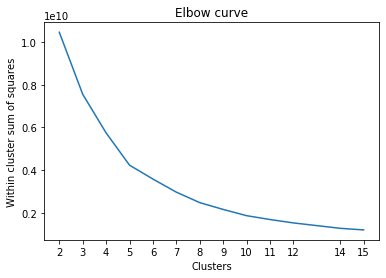

In [9]:
# Elbow curve - to find the optimal number of clusters value
plt.plot(K, wcss)
plt.xticks(K)
plt.title("Elbow curve")
plt.xlabel('Clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

In [10]:
retVal, bestLabels, centers = cv2.kmeans(np.float32(img_hsv), 5, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [11]:
centers = np.uint8(centers)
segmentedImg = centers[bestLabels.flatten()]
segmentedImg = segmentedImg.reshape(image.shape)

In [12]:
segmentedImg.shape

(1067, 1600, 3)

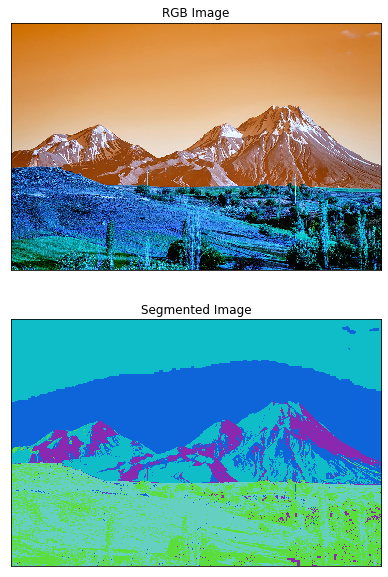

In [13]:
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(segmentedImg)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

In [14]:
segmentedImg.shape

(1067, 1600, 3)

What if I try to segment the image using RGB values as features

In [15]:
# flatten each image dimension. Each dimension will be considered as one feature. So there will be three features. 
img_rgb = image.reshape(-1, 3)
img_rgb.shape

(1707200, 3)

In [16]:
retVal, bestLabels, centers = cv2.kmeans(np.float32(img_rgb), 5, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [17]:
centers = np.uint8(centers)
segmentedImg = centers[bestLabels.flatten()]
segmentedImg = segmentedImg.reshape(image.shape)

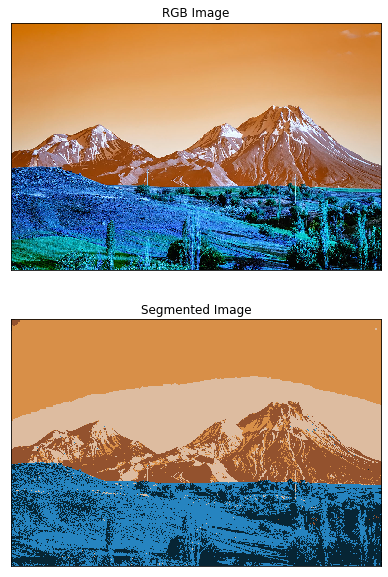

In [18]:
# No of clusters = 4
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(segmentedImg)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

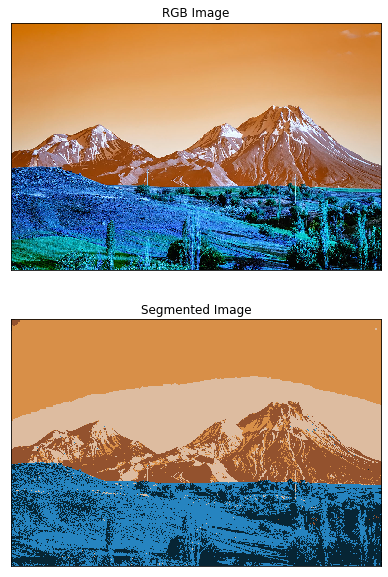

In [19]:
# No of clusters = 5
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(segmentedImg)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

Part 2 - Segmenting images using Kmeans clustering (Naive implementation in Python without opencv)

In [21]:
# Kmeans clustering hyperparameters
nclusters = 5
niters = 10
nattempts = 20

In [242]:
def random_initialize_centers(data):
    '''
        Initialize the cluster centers randomly.
    '''
    ccenters = dict()
    indices = np.random.choice(len(data), replace=False, size=5)
    for c in range(nclusters):
        ccenters[c] = dict()
        ccenters[c]['r'] = data.iloc[indices[c]]['red']
        ccenters[c]['g'] = data.iloc[indices[c]]['green']
        ccenters[c]['b'] = data.iloc[indices[c]]['blue']
    return ccenters

def assignment(data, ccenters):
    '''
        Assign the datapoints to the cluster.
    '''
    for c in range(nclusters):
        data['distance_from_cluster'+str(c)] = np.sqrt((data['red']-ccenters[c]['r'])**2 + (data['blue']-ccenters[c]['b'])**2 + (data['green']-ccenters[c]['g'])**2)
    data['closest'] = data[['distance_from_cluster'+str(c) for c in range(nclusters)]].idxmin(1)
    return data

def reassign(data):
    '''
        Reassign the cluster centers.
    '''
    for c in range(nclusters):
        indices = data.index[data['closest']=='distance_from_cluster'+str(c)]
        ccenters[c]['r'] = data.iloc[indices]['red'].mean()
        ccenters[c]['g'] = data.iloc[indices]['green'].mean()
        ccenters[c]['b'] = data.iloc[indices]['blue'].mean()
    return ccenters

def meansqdistance(data):
    '''
        Calculate the mean squared distance.
    '''
    dist = [data.loc[data['closest']==c]['distance_from_cluster'+str(c)].sum() for c in range(nclusters)]
    return sum(dist)

In [22]:
import pandas as pd
data = pd.DataFrame({'red':img_rgb[:,0], 'green':img_rgb[:,1], 'blue':img_rgb[:,2]})

In [244]:
# run k means
bestMeanSquared = float('inf')

for a in range(nattempts):
    ccenters = random_initialize_centers(data)
    old_ccenters = 0
    
    it = 0
    while it<niters and old_ccenters != ccenters:
        data = assignment(data, ccenters)
        old_ccenters = ccenters
        ccenters = reassign(data)
        it+=1
        
    data = assignment(data, ccenters)
    # update cluster values in the dataframe
    data['closest'] = data['closest'].map(lambda x: int(x.strip('distance_from_cluster')))
    
    meanSquared = meansqdistance(data)
    if meanSquared < bestMeanSquared:
        bestMeanSquared = meanSquared
        bestLabels = data['closest']
        bestCenters = ccenters
        print("a: ", a)
        print("mean sq: ", bestMeanSquared)     

a:  0
mean sq:  199033507.78349364
a:  1
mean sq:  81008871.17666033
a:  2
mean sq:  70273778.91206445


In [245]:
segmentedImg=bestLabels.to_numpy().reshape(image.shape[0], image.shape[1]).astype(int)

Results look similar to open CV results for no of clusters 4 and 5 

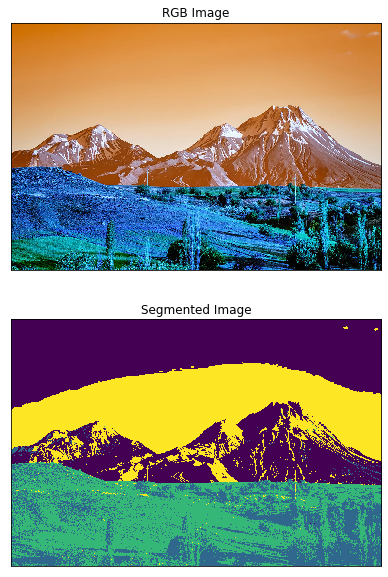

In [239]:
# plot the segmented image for no of clusters 4
colorvals = {'0': [173, 216, 230], '1': [144,238,144], '2': (222,184,135), '3': (139,69,19), '4': (0, 0, 0)}
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(segmentedImg)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

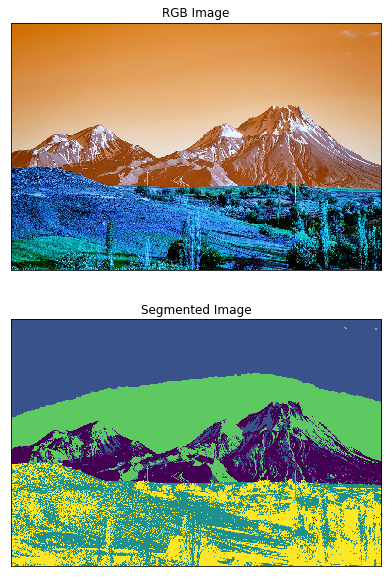

In [246]:
# plot the segmented image for no of clusters 5
colorvals = {'0': [173, 216, 230], '1': [144,238,144], '2': (222,184,135), '3': (139,69,19), '4': (0, 0, 0)}
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(segmentedImg)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

In [297]:
def initialize_kmeans_plusplus(data):
    '''
        Initialize centers for k-means++
        1. Randomly select one point from the points.
        2. Sample the remaining cluster centers such that the new point is at maximum distance from the nearest previously selected centroid.
    '''
    ccenters = dict()
    idx = np.random.choice(len(data), size=1).item()
    ccenters[0] = {}
    ccenters[0]['r'] = data.iloc[idx]['red']
    ccenters[0]['g'] = data.iloc[idx]['green']
    ccenters[0]['b'] = data.iloc[idx]['blue']

    c = 1
    while c<nclusters:
        data['distance_from_cluster'+str(c-1)] = np.sqrt((data['red']-ccenters[c-1]['r'])**2 + (data['green']-ccenters[c-1]['g'])**2 + (data['blue']-ccenters[c-1]['b'])**2)
        idx = data[['distance_from_cluster'+str(i) for i in range(c)]].min(axis=1).idxmax(axis=0)
        ccenters[c] = {}
        ccenters[c]['r'] = data.iloc[idx]['red']
        ccenters[c]['g'] = data.iloc[idx]['green']
        ccenters[c]['b'] = data.iloc[idx]['blue']
        c+=1
    return ccenters

In [299]:
# run k means clustering 
bestMeanSquared = float('inf')

for a in range(nattempts):
    ccenters = initialize_kmeans_plusplus(data)
    old_ccenters = 0
    
    it = 0
    while it<niters and old_ccenters != ccenters:
        data = assignment(data, ccenters)
        old_ccenters = ccenters
        ccenters = reassign(data)
        it+=1
        
    data = assignment(data, ccenters)
    # update cluster values in the dataframe
    data['closest'] = data['closest'].map(lambda x: int(x.strip('distance_from_cluster')))
    
    meanSquared = meansqdistance(data)
    if meanSquared < bestMeanSquared:
        bestMeanSquared = meanSquared
        bestLabels = data['closest']
        bestCenters = ccenters
        print("a: ", a)
        print("mean sq: ", bestMeanSquared)

segmentedImg=bestLabels.to_numpy().reshape(image.shape[0], image.shape[1]).astype(int)

a:  0
mean sq:  195613435.821673
a:  1
mean sq:  87126234.62871264
a:  2
mean sq:  81395927.33817297
a:  8
mean sq:  79344466.81255513
a:  18
mean sq:  77050919.05837885


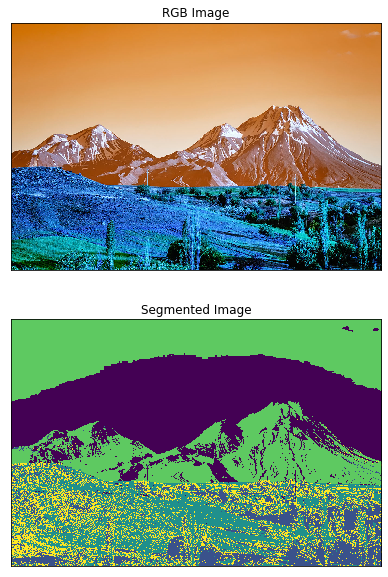

In [301]:
# plot the segmented image for no of clusters 5
colorvals = {'0': [173, 216, 230], '1': [144,238,144], '2': (222,184,135), '3': (139,69,19), '4': (0, 0, 0)}
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(segmentedImg)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

Part 3 - Hierarchial Clustering for Image Segmentation (Using skimage)

In [79]:
import scipy.cluster.hierarchy as shc

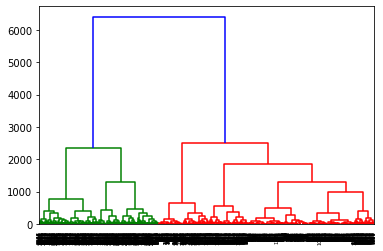

In [80]:
image = cv2.resize(image, (50, 50))
img_rgb = image.reshape(-1, 3)
dend = shc.dendrogram(shc.linkage(img_rgb, method='ward'))

In [216]:
# slight variation - till the time no of clusters = 5
# keep on combining the values

# code for combining list 
# source - https://stackoverflow.com/questions/4842613/merge-lists-that-share-common-elements
import networkx
from networkx.algorithms.components.connected import connected_components

def to_graph(l):
    G = networkx.Graph()
    for p in l:
        G.add_nodes_from(p)
        G.add_edges_from(to_edge(p))
    return G
        
def to_edge(l):
    it = iter(l)
    last = next(it)
    
    for curr in it:
        yield last, curr
        last = curr


def hierarchial_clustering(data, nclusters=5):
    '''
        Hierarchial Clustering 
    '''
    mindist = 0
    
    while len(data) > nclusters:
#     for test in range(2):
        n = len(data)
        dist = np.zeros((n, n))

        for i in range(n):
            dist[i] = np.sqrt((data['red']-data.iloc[i]['red'])**2 + (data['green']-data.iloc[i]['green'])**2 + (data['blue']-data.iloc[i]['blue'])**2)
        np.fill_diagonal(dist, float('inf'))
        mdist = np.amin(dist)
        idx = list(zip(*np.where(dist == mdist)))

        tmpG = to_graph(idx)
        lst = sorted(connected_components(tmpG))

        tmp = pd.DataFrame(columns=['index', 'red', 'green', 'blue'])
        indices = set()

        for i, l in enumerate(lst):
            l = list(l)

            idx = set()
            inds = data.iloc[l]['index'] # iloc should be used here because some of the indices have been dropped.
            for ind in inds:
                if isinstance(ind, int): 
                    idx.add(ind)
                else:
                    idx.update(ind)

            indices.update(l)
            tmp.loc[i] = [list(idx), np.mean(data.iloc[l]['red']), np.mean(data.iloc[l]['green']),  np.mean(data.iloc[l]['blue'])]
            
        print(data)
        
        data = data.drop(indices)
        data = data.append(tmp)
        data = data.reset_index(drop=True)

        print("length: ", len(data))
    return data

In [217]:
image = cv2.resize(image, (100, 100)) # should reduce the dimension even further for subsequent runs
img_rgb = image.reshape(-1, 3)
data = pd.DataFrame({'index': np.arange(0, len(img_rgb)), 'red': img_rgb[:,0], 'green': img_rgb[:,1], 'blue': img_rgb[:,2]})
data = hierarchial_clustering(data)
# print(df)

      index  red  green  blue
0         0    1    108   206
1         1    1    109   206
2         2    1    110   207
3         3    1    111   207
4         4    2    112   208
...     ...  ...    ...   ...
9995   9995   69     56    12
9996   9996   27     25     7
9997   9997   16     15     6
9998   9998   35     24     9
9999   9999   45     29    10

[10000 rows x 4 columns]
length:  3554
             index    red  green   blue
0                0    1.0  108.0  206.0
1               20   14.0  122.0  214.0
2               23   20.0  124.0  215.0
3               25   22.0  124.0  216.0
4               26   23.0  125.0  217.0
...            ...    ...    ...    ...
3549  [9649, 9834]  128.0   86.0   26.0
3550  [9650, 9989]   72.0   42.0   15.0
3551  [9691, 9877]   14.0   12.0    5.0
3552  [9965, 9790]   75.0   40.0   14.0
3553  [9827, 9847]  102.0   94.0   18.0

[3554 rows x 4 columns]
length:  3547
                                          index    red  green   blue
0           

                                                  index         red  \
0                                                     0    1.000000   
1                                                    20   14.000000   
2                                                    23   20.000000   
3                                                    25   22.000000   
4                                                    26   23.000000   
...                                                 ...         ...   
3534                           [2792, 2209, 3198, 3199]   95.166667   
3535  [141, 334, 4110, 432, 4208, 3892, 3222, 1401, ...   93.166667   
3536         [2721, 3813, 5799, 5612, 2131, 4823, 1755]  126.833333   
3537  [3655, 3751, 3948, 3756, 722, 723, 4404, 923, ...  107.300000   
3538  [3585, 6273, 1062, 1063, 1064, 490, 8205, 6511...  103.000000   

           green        blue  
0     108.000000  206.000000  
1     122.000000  214.000000  
2     124.000000  215.000000  
3     124.000000  216.0

                                                  index         red  \
0                                                     0    1.000000   
1                                                    20   14.000000   
2                                                    23   20.000000   
3                                                    25   22.000000   
4                                                    26   23.000000   
...                                                 ...         ...   
3525                     [3886, 3055, 2961, 3320, 4701]  136.666667   
3526                       [3810, 742, 935, 1209, 3135]   83.666667   
3527    [3272, 713, 3273, 3731, 3732, 3224, 2459, 2460]  120.928571   
3528  [2720, 939, 940, 844, 751, 752, 4625, 757, 271...   87.666667   
3529         [3427, 2150, 3531, 3532, 8719, 4856, 8287]  127.166667   

           green        blue  
0     108.000000  206.000000  
1     122.000000  214.000000  
2     124.000000  215.000000  
3     124.000000  216.0

                                                  index         red  \
0                                                     0    1.000000   
1                                                    20   14.000000   
2                                                    23   20.000000   
3                                                    25   22.000000   
4                                                    26   23.000000   
...                                                 ...         ...   
3517  [1441, 1537, 3586, 1155, 1156, 1157, 1351, 135...   90.928571   
3518  [2273, 5122, 1050, 2516, 1049, 2170, 1051, 105...   88.200000   
3519         [6691, 7373, 1966, 1903, 2001, 2898, 6687]  100.800000   
3520    [7494, 2894, 8464, 1907, 8116, 2005, 8660, 790]  119.000000   
3521  [97, 1438, 1252, 3589, 1253, 1254, 3917, 1137,...   86.428571   

           green        blue  
0     108.000000  206.000000  
1     122.000000  214.000000  
2     124.000000  215.000000  
3     124.000000  216.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    26   23.000000   
4                                                    28   28.000000   
...                                                 ...         ...   
3409                           [5809, 7562, 7369, 8582]  130.000000   
3410  [2722, 1829, 1830, 1831, 2664, 2665, 3467, 388...  101.611111   
3411               [1984, 6819, 1871, 6642, 8668, 6524]  127.333333   
3412  [865, 833, 4193, 452, 2277, 453, 460, 1235, 14...   76.266667   
3413  [3682, 3465, 3466, 6127, 6484, 3925, 2774, 120...  101.400000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     125.000000  217.0

                                                  index    red       green  \
0                                                    20   14.0  122.000000   
1                                                    23   20.0  124.000000   
2                                                    25   22.0  124.000000   
3                                                    26   23.0  125.000000   
4                                                    28   28.0  127.000000   
...                                                 ...    ...         ...   
3399  [2181, 296, 2026, 4792, 1976, 1561, 1562, 1563...   94.5  157.833333   
3400  [5216, 164, 613, 2640, 2547, 2452, 2548, 3609,...  104.5  159.500000   
3401  [7299, 4293, 1030, 1225, 7887, 3441, 3349, 978...  102.5  132.500000   
3402                           [9328, 8384, 9470, 9623]  143.5  122.166667   
3403  [1059, 1735, 1736, 1737, 3914, 1832, 2983, 192...   97.0  161.750000   

            blue  
0     214.000000  
1     215.000000  
2     

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    26   23.000000   
4                                                    28   28.000000   
...                                                 ...         ...   
3392  [4449, 5795, 1318, 9640, 8520, 4138, 4139, 299...  132.133333   
3393  [4358, 3485, 1056, 1057, 6185, 9138, 830, 455,...   92.555556   
3394   [8802, 5798, 7821, 8847, 7409, 1685, 9176, 4316]  129.966667   
3395  [3272, 713, 3273, 266, 3758, 3663, 3662, 3854,...  120.964286   
3396  [9346, 8996, 5258, 3659, 3852, 9322, 270, 1688...  106.000000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     125.000000  217.0

                                           index         red       green  \
0                                             20   14.000000  122.000000   
1                                             23   20.000000  124.000000   
2                                             25   22.000000  124.000000   
3                                             26   23.000000  125.000000   
4                                             28   28.000000  127.000000   
...                                          ...         ...         ...   
3380                     [562, 2716, 1029, 1719]   71.333333  147.166667   
3381                     [377, 2307, 2391, 2807]   74.666667  144.833333   
3382               [1538, 3563, 1455, 4016, 274]  104.666667  165.833333   
3383  [6277, 2123, 2573, 2221, 1103, 8052, 6107]  111.333333  132.833333   
3384        [8096, 3300, 4683, 4269, 6291, 8403]   97.500000  105.666667   

            blue  
0     214.000000  
1     215.000000  
2     216.000000  
3     217.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    26   23.000000   
4                                                    28   28.000000   
...                                                 ...         ...   
3373  [3462, 3271, 5000, 3093, 3733, 4536, 4537, 453...  151.388889   
3374  [160, 161, 1536, 9414, 1355, 4685, 9326, 3511,...   98.500000   
3375  [4200, 4201, 4202, 3543, 3544, 3545, 3546, 354...  137.047619   
3376  [512, 4934, 5490, 6869, 9720, 7385, 9371, 3516...  119.500000   
3377  [439, 355, 260, 356, 261, 357, 5815, 536, 634,...   50.272727   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     125.000000  217.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    26   23.000000   
4                                                    28   28.000000   
...                                                 ...         ...   
3365               [1346, 1347, 1348, 2626, 3919, 3120]  101.600000   
3366          [3872, 1796, 612, 1898, 1899, 1392, 6550]   61.400000   
3367    [6754, 2470, 9734, 906, 3380, 7868, 3230, 6463]  104.033333   
3368  [2400, 2401, 1993, 9484, 8047, 9040, 639, 3514...  100.214286   
3369  [641, 642, 3589, 1438, 550, 553, 1330, 3911, 2...   86.023810   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     125.000000  217.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    26   23.000000   
4                                                    28   28.000000   
...                                                 ...         ...   
3351  [2560, 2561, 2562, 8769, 4160, 5449, 8958, 293...  142.000000   
3352                     [4800, 3650, 5254, 4883, 4343]  159.833333   
3353  [7872, 4961, 4195, 264, 1465, 5555, 4793, 9177...   97.114286   
3354  [2339, 2244, 932, 5094, 13, 4526, 112, 3984, 5...   91.428571   
3355  [2788, 3210, 4251, 1070, 3279, 4252, 4596, 171...  142.050000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     125.000000  217.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3224    [6244, 9148, 2605, 7149, 2704, 2930, 282, 8732]   99.700000   
3225                      [1029, 562, 1719, 1274, 2716]   71.666667   
3226  [960, 3745, 3912, 3690, 815, 2480, 1236, 1429,...   94.428571   
3227  [7299, 4293, 1030, 7048, 1225, 7887, 3441, 389...  101.916667   
3228           [488, 588, 4879, 5392, 2582, 1527, 5758]   92.500000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3217  [2273, 5122, 2170, 1777, 2419, 2516, 1049, 105...   88.100000   
3218  [3778, 1644, 1645, 1742, 1935, 1840, 1841, 193...   93.288462   
3219  [8257, 1539, 6276, 3141, 1444, 1443, 2857, 295...  100.655844   
3220  [6304, 5185, 6020, 7716, 1193, 5999, 2512, 692...   93.333333   
3221                           [3505, 3603, 2589, 2111]   93.666667   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3206                     [9281, 7234, 6983, 9193, 7948]  137.500000   
3207  [1346, 1347, 1348, 2626, 3785, 1643, 1646, 391...  102.300000   
3208  [4514, 2724, 3236, 3237, 5063, 2868, 2069, 286...  115.600000   
3209  [2380, 5657, 1136, 1426, 2035, 4020, 6067, 203...   97.400000   
3210    [5154, 6117, 5802, 720, 7221, 3515, 4540, 4541]  132.133333   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3198               [2916, 3108, 3692, 3452, 8122, 7100]  131.666667   
3199  [2080, 2081, 2950, 1774, 1775, 2420, 1877, 370...   91.000000   
3200  [2369, 3814, 2473, 6410, 6570, 2925, 1041, 946...   95.571429   
3201  [162, 258, 1826, 163, 298, 632, 1805, 340, 437...   58.000000   
3202                           [7960, 7043, 9072, 9459]  151.333333   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3191  [7299, 8387, 4293, 1030, 2980, 7048, 1225, 788...  101.291667   
3192  [9696, 3395, 9383, 5671, 5549, 1808, 1616, 190...   84.600000   
3193                      [2307, 1686, 2807, 377, 2391]   75.333333   
3194  [3523, 2340, 2245, 2056, 2827, 2732, 2731, 226...  109.250000   
3195  [641, 642, 3589, 1929, 1930, 1438, 550, 553, 1...   86.511905   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3183                           [9448, 8321, 7154, 9714]  123.166667   
3184         [2915, 3013, 7869, 1706, 2797, 7964, 5405]   76.666667   
3185  [1922, 1417, 9035, 4111, 5041, 5746, 2387, 610...  127.333333   
3186                             [185, 1703, 2405, 183]   53.333333   
3187                     [1955, 2531, 3621, 3985, 2239]  118.166667   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3174  [3584, 3714, 4361, 1101, 3022, 3918, 2576, 350...  107.940476   
3175  [266, 3854, 3731, 3732, 3224, 2459, 4507, 2460...  120.315476   
3176     [198, 1481, 1482, 591, 1360, 1361, 1629, 1534]   72.250000   
3177  [3215, 1935, 1936, 1937, 2327, 3491, 1840, 184...   93.144231   
3178  [2273, 5122, 1050, 1777, 1778, 2419, 2516, 188...   87.550000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3140               [7745, 7391, 7846, 6702, 8571, 6907]  175.500000   
3141                      [704, 9032, 6773, 8542, 6271]  126.166667   
3142  [3720, 4650, 985, 4659, 9977, 5335, 7609, 5435...  105.500000   
3143  [2465, 2466, 2467, 2468, 3276, 2639, 2355, 235...  116.350000   
3144  [961, 962, 965, 40, 2378, 235, 236, 4109, 1011...   80.950000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    20   14.000000   
1                                                    23   20.000000   
2                                                    25   22.000000   
3                                                    30   30.000000   
4                                                    90   37.000000   
...                                                 ...         ...   
3130               [1574, 2316, 2317, 1678, 1716, 2687]   83.500000   
3131  [9378, 8663, 4998, 4999, 2315, 3725, 4558, 241...  134.333333   
3132                     [8748, 3124, 7224, 8538, 5208]  160.333333   
3133                     [9186, 9060, 8006, 1080, 5819]   87.833333   
3134   [7427, 2691, 3205, 9959, 4903, 4499, 7254, 8183]  126.000000   

           green        blue  
0     122.000000  214.000000  
1     124.000000  215.000000  
2     124.000000  216.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    25   22.000000   
2                                                    30   30.000000   
3                                                    90   37.000000   
4                                                   130   33.000000   
...                                                 ...         ...   
3118                                [217, 20, 313, 215]   14.000000   
3119                           [1380, 1814, 1278, 1175]   69.250000   
3120  [1978, 795, 1487, 1488, 1791, 1589, 1590, 1690...   69.833333   
3121         [3719, 3207, 3084, 3282, 2067, 2068, 3454]  120.500000   
3122           [2304, 2403, 2568, 2569, 1580, 1106, 85]   77.416667   

           green        blue  
0     124.000000  215.000000  
1     124.000000  216.000000  
2     129.000000  218.000000  
3     124.000000  213.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    25   22.000000   
2                                                    30   30.000000   
3                                                    90   37.000000   
4                                                   130   33.000000   
...                                                 ...         ...   
3110   [6120, 3884, 6193, 2237, 5246, 3773, 4254, 1503]   92.666667   
3111  [7360, 7650, 6852, 7239, 3053, 8109, 3504, 309...  133.166667   
3112                [3828, 3829, 5526, 4375, 602, 3579]  116.166667   
3113  [992, 700, 5, 701, 5960, 6604, 5645, 8252, 578...   81.750000   
3114  [6530, 870, 3111, 6, 971, 5132, 6573, 7822, 44...  119.477778   

           green        blue  
0     124.000000  215.000000  
1     124.000000  216.000000  
2     129.000000  218.000000  
3     124.000000  213.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   187   41.000000   
...                                                 ...         ...   
3090   [2209, 2792, 3505, 3603, 3199, 2589, 3198, 2111]   94.416667   
3091  [1986, 1987, 2700, 2701, 2702, 2607, 1680, 168...   80.666667   
3092               [7942, 4519, 9170, 8978, 5364, 9525]  135.000000   
3093   [3009, 6849, 1891, 9261, 7758, 9999, 3451, 3355]  112.333333   
3094         [9761, 9090, 9230, 5267, 9045, 7637, 3865]   98.000000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                 index         red  \
0                                                   23   20.000000   
1                                                   30   30.000000   
2                                                   90   37.000000   
3                                                  130   33.000000   
4                                                  187   41.000000   
...                                                ...         ...   
3081                          [6466, 5709, 4326, 5119]  120.333333   
3082  [3302, 4552, 2793, 2570, 2895, 2896, 1105, 2674]   93.666667   
3083         [610, 5416, 4363, 7729, 8694, 6327, 8984]  108.333333   
3084               [769, 7654, 9064, 1003, 7378, 7550]  143.333333   
3085               [8388, 6749, 4263, 4167, 5463, 605]   68.666667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.000000  
4   

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   187   41.000000   
...                                                 ...         ...   
3072               [3426, 8364, 3252, 9173, 9368, 9087]  134.666667   
3073  [736, 5313, 1858, 832, 5632, 195, 4556, 2235, ...   94.583333   
3074          [1538, 2274, 2822, 3563, 1455, 4016, 274]  104.833333   
3075  [7744, 7328, 129, 1385, 6126, 6901, 821, 919, ...   84.833333   
3076         [5442, 9000, 7083, 6134, 9848, 1084, 1085]   99.166667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index       red       green  \
0                                                    23   20.0000  124.000000   
1                                                    30   30.0000  129.000000   
2                                                    90   37.0000  124.000000   
3                                                   130   33.0000  129.000000   
4                                                   187   41.0000  127.000000   
...                                                 ...       ...         ...   
3063  [1568, 2273, 5122, 1050, 1571, 1675, 1777, 177...   86.3875  153.412500   
3064         [3904, 3393, 3394, 3496, 3497, 3806, 3807]  118.1250  170.625000   
3065  [5889, 4872, 5193, 1806, 6801, 6130, 8631, 989...  111.5000  117.833333   
3066                     [3683, 3651, 3459, 3308, 2776]  134.5000  183.166667   
3067         [5896, 1516, 1614, 2386, 4831, 5140, 2719]  105.9000  152.900000   

            blue  
0     21

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   187   41.000000   
...                                                 ...         ...   
3036                           [7952, 8456, 9845, 6966]  161.000000   
3037                           [9337, 7835, 8605, 8710]  178.000000   
3038                     [5512, 4011, 3213, 4814, 3217]  134.333333   
3039  [2720, 2785, 472, 4297, 939, 940, 844, 1624, 7...   88.666667   
3040         [9896, 3501, 7982, 2830, 9104, 2106, 5020]   87.100000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   187   41.000000   
...                                                 ...         ...   
3029                      [706, 9680, 5300, 7193, 4159]   98.000000   
3030  [4257, 3559, 3656, 3848, 3499, 3153, 820, 918,...  121.333333   
3031  [2629, 2630, 2726, 2536, 2537, 2823, 2347, 216...  105.000000   
3032   [1574, 2023, 2316, 2317, 1678, 1716, 1468, 2687]   83.500000   
3033  [2336, 4707, 1956, 1701, 1957, 3846, 6160, 917...   86.500000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index     red   green  \
0                                                    23   20.00  124.00   
1                                                    30   30.00  129.00   
2                                                    90   37.00  124.00   
3                                                   130   33.00  129.00   
4                                                   191   43.00  126.00   
...                                                 ...     ...     ...   
3016                                     [1203, 86, 87]   38.25  126.00   
3017                           [2708, 2290, 2188, 2493]   83.75  149.00   
3018                           [5465, 6489, 4770, 5372]   86.50  103.75   
3019  [3362, 3734, 3735, 3736, 3737, 3738, 3739, 374...  147.50  191.50   
3020  [3015, 3113, 3017, 2379, 2572, 3114, 3212, 248...  104.25  165.00   

        blue  
0     215.00  
1     218.00  
2     213.00  
3     218.00  
4     212.00  
...      

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
3009  [4966, 5418, 715, 684, 716, 784, 785, 4721, 10...   66.250000   
3010  [266, 3854, 3731, 3732, 3224, 4507, 2459, 2460...  121.157738   
3011  [3207, 3719, 3084, 3282, 2067, 2068, 275, 4636...  120.250000   
3012  [7173, 6410, 1041, 1938, 1939, 1940, 2473, 657...   95.485714   
3013         [3616, 3686, 3519, 3119, 3184, 3287, 3615]  126.625000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index     red   green  \
0                                                    23   20.00  124.00   
1                                                    30   30.00  129.00   
2                                                    90   37.00  124.00   
3                                                   130   33.00  129.00   
4                                                   191   43.00  126.00   
...                                                 ...     ...     ...   
2998               [5768, 3085, 3086, 5519, 6064, 2705]   87.25  131.75   
2999               [6368, 4965, 3083, 5847, 3517, 3390]   92.25  136.25   
3000               [4491, 5171, 4694, 3416, 5977, 5114]  125.75  150.00   
3001  [46, 47, 144, 145, 49, 242, 435, 532, 243, 148...   47.00  137.25   
3002   [3232, 3233, 3330, 2764, 2765, 2870, 3326, 3327]  126.75  180.00   

        blue  
0     215.00  
1     218.00  
2     213.00  
3     218.00  
4     212.00  
...      

                                           index         red       green  \
0                                             23   20.000000  124.000000   
1                                             30   30.000000  129.000000   
2                                             90   37.000000  124.000000   
3                                            130   33.000000  129.000000   
4                                            191   43.000000  126.000000   
...                                          ...         ...         ...   
2990                     [6360, 6562, 8567, 911]   73.666667   99.666667   
2991   [527, 5008, 7825, 4306, 9268, 4888, 8351]  140.333333  135.000000   
2992        [7009, 4420, 8262, 5320, 6005, 9151]  130.666667  101.666667   
2993        [5667, 5029, 5678, 5876, 6233, 5663]   88.666667  109.833333   
2994  [8807, 7533, 9614, 8921, 9078, 7545, 7611]  163.166667  119.000000   

            blue  
0     215.000000  
1     218.000000  
2     213.000000  
3     218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2983                     [5722, 5723, 5820, 5821, 5724]   12.166667   
2984               [8010, 7508, 7700, 9974, 7769, 6779]  139.500000   
2985  [4512, 4001, 5025, 5062, 3016, 3792, 3154, 325...  110.133333   
2986  [3584, 3714, 4361, 1677, 2318, 2576, 1818, 489...  106.985119   
2987  [6787, 839, 744, 840, 936, 651, 652, 2298, 674...   86.600000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                 index         red  \
0                                                   23   20.000000   
1                                                   30   30.000000   
2                                                   90   37.000000   
3                                                  130   33.000000   
4                                                  191   43.000000   
...                                                ...         ...   
2971                                [7200, 7202, 7303]  122.750000   
2972                                [9488, 8171, 9574]   24.750000   
2973                   [930, 1222, 461, 462, 365, 463]   57.750000   
2974   [230, 4107, 3117, 3118, 7727, 8115, 8758, 7006]  132.750000   
2975  [2188, 2290, 2291, 2708, 2805, 2903, 2493, 2495]   83.041667   

           green    blue  
0     124.000000  215.00  
1     129.000000  218.00  
2     124.000000  213.00  
3     129.000000  218.00  
4     126.000000  212.00

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2964  [3812, 3773, 6120, 3884, 6193, 6488, 4254, 223...   91.833333   
2965  [3811, 938, 843, 1035, 842, 748, 7886, 758, 20...   76.700000   
2966         [4833, 4078, 4213, 3671, 5242, 5211, 5854]  137.800000   
2967          [480, 5281, 5517, 5007, 6416, 9361, 7379]  131.000000   
2968       [1130, 1227, 6059, 2002, 662, 663, 664, 665]   60.714286   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2880  [3520, 4450, 1221, 1375, 5096, 2574, 3761, 376...  130.000000   
2881  [4833, 2122, 4078, 4213, 5046, 3671, 5688, 524...  136.900000   
2882  [3426, 6628, 8364, 7471, 3252, 8981, 9173, 908...  133.833333   
2883  [3808, 929, 3946, 8652, 8492, 4854, 1019, 1117...   93.900000   
2884  [7744, 7328, 129, 1385, 6126, 6800, 6901, 821,...   85.916667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2873  [5829, 5255, 1961, 6153, 3370, 110, 977, 6195,...   85.716667   
2874  [2370, 4324, 806, 2828, 2829, 2125, 2223, 3381...  118.500000   
2875               [7168, 8423, 7338, 9362, 7922, 9561]  151.833333   
2876   [7265, 4632, 7981, 2509, 3408, 8528, 6680, 4633]  137.833333   
2877  [6402, 9186, 9060, 5317, 8006, 9544, 521, 7984...   87.516667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2865  [2080, 2081, 2519, 2950, 1529, 1774, 1775, 258...   91.000000   
2866  [9568, 9025, 6472, 683, 783, 1104, 3379, 883, ...   96.200000   
2867  [954, 6598, 2694, 3601, 1138, 1042, 950, 951, ...   87.916667   
2868   [3328, 1902, 2000, 5619, 4279, 2975, 2974, 3423]  111.666667   
2869  [1346, 1347, 1348, 2626, 2342, 2343, 2248, 224...  101.816667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2856  [2176, 1559, 8677, 4392, 4589, 943, 1328, 1232...  101.800000   
2857  [9889, 515, 1189, 7176, 7672, 3242, 7146, 2959...   99.266667   
2858  [740, 933, 934, 1141, 1142, 1237, 1238, 2521, ...   73.650000   
2859   [9922, 5890, 5928, 1517, 6766, 2385, 7644, 1276]  102.200000   
2860         [1287, 749, 750, 753, 754, 755, 756, 5461]   65.000000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    30   30.000000   
2                                                    90   37.000000   
3                                                   130   33.000000   
4                                                   191   43.000000   
...                                                 ...         ...   
2849  [1921, 1028, 1039, 1428, 2072, 666, 667, 2076,...   76.708333   
2850  [4256, 9953, 3777, 6214, 168, 169, 7376, 2769,...   91.283333   
2851  [2209, 3302, 2792, 4552, 2793, 2570, 2895, 289...   94.041667   
2852   [9760, 6180, 8616, 1870, 1873, 2424, 6458, 9757]  106.733333   
2853               [3424, 2532, 8459, 7659, 6989, 7389]  145.333333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     124.000000  213.000000  
3     129.000000  218.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                    90   37.000000   
2                                                   130   33.000000   
3                                                   191   43.000000   
4                                                   297   36.000000   
...                                                 ...         ...   
2840                                 [5412, 5085, 4783]  154.500000   
2841  [1632, 450, 451, 197, 5542, 9349, 8265, 1630, ...   87.166667   
2842                           [36, 229, 134, 522, 523]   37.000000   
2843  [8294, 714, 9260, 9708, 2649, 2553, 2650, 1756...   91.833333   
2844    [8164, 8714, 3851, 3503, 9556, 3192, 825, 8670]  116.833333   

           green        blue  
0     124.000000  215.000000  
1     124.000000  213.000000  
2     129.000000  218.000000  
3     126.000000  212.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   191   43.000000   
3                                                   297   36.000000   
4                                                   303    4.000000   
...                                                 ...         ...   
2833                      [579, 5930, 4821, 4665, 4764]   66.916667   
2834  [1162, 1163, 9484, 542, 543, 9008, 3514, 1993,...   99.607143   
2835  [1542, 1543, 1544, 1545, 1546, 1547, 1548, 154...  103.411111   
2836  [7010, 7394, 3972, 9030, 3718, 4006, 3470, 398...  133.166667   
2837  [2016, 4545, 4546, 4547, 4548, 7779, 7114, 980...  133.055556   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     126.000000  212.000000  
3     122.000000  209.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   191   43.000000   
3                                                   297   36.000000   
4                                                   303    4.000000   
...                                                 ...         ...   
2824   [2530, 3651, 3683, 3459, 3620, 3308, 4085, 2776]  134.000000   
2825  [1792, 2786, 414, 1893, 1607, 2696, 968, 6697,...   87.166667   
2826                           [7041, 8588, 8177, 7039]   94.666667   
2827                     [7687, 2408, 6352, 8989, 4926]   61.000000   
2828               [5217, 6247, 4463, 6872, 6587, 7295]   93.333333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     126.000000  212.000000  
3     122.000000  209.0

                                                  index        red  \
0                                                    23  20.000000   
1                                                   130  33.000000   
2                                                   191  43.000000   
3                                                   297  36.000000   
4                                                   303   4.000000   
...                                                 ...        ...   
2817    [4610, 6179, 9865, 173, 1395, 5972, 8087, 1599]  72.300000   
2818  [2304, 2403, 2568, 2569, 1580, 1106, 1301, 85,...  77.708333   
2819   [6528, 6537, 7626, 8783, 9840, 4372, 5943, 4671]  98.400000   
2820  [1280, 2049, 1602, 1284, 1285, 1700, 2008, 191...  66.166667   
2821  [9347, 6280, 1738, 1835, 1739, 1740, 1741, 183...  89.066667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     126.000000  212.000000  
3     122.000000  209.000000  
4   

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   191   43.000000   
3                                                   297   36.000000   
4                                                   303    4.000000   
...                                                 ...         ...   
2810  [5984, 827, 5704, 3510, 729, 730, 59, 5342, 62...   68.100000   
2811  [7973, 7465, 8720, 4984, 8789, 6070, 5590, 690...  115.750000   
2812                     [9897, 9098, 8975, 8725, 9721]  112.333333   
2813                     [8417, 8521, 6415, 9558, 8186]  147.833333   
2814          [614, 2921, 2549, 2550, 1241, 1146, 1147]   84.166667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     126.000000  212.000000  
3     122.000000  209.0

                                     index         red       green   blue
0                                       23   20.000000  124.000000  215.0
1                                      130   33.000000  129.000000  218.0
2                                      297   36.000000  122.000000  209.0
3                                      303    4.000000  113.000000  208.0
4                                      308    9.000000  117.000000  211.0
...                                    ...         ...         ...    ...
2744  [7841, 8193, 7492, 6506, 8699, 9567]  114.666667   70.666667   23.0
2745  [9688, 6954, 9711, 9621, 9942, 9144]   75.500000   79.000000   15.5
2746              [6976, 9994, 9645, 9479]   82.500000   66.500000   14.0
2747              [9354, 8876, 8901, 7118]  108.000000   87.500000   16.5
2748              [7145, 7569, 8929, 9950]  166.500000  106.500000   36.0

[2749 rows x 4 columns]
length:  2748
                                     index         red       green       

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2736  [4196, 3142, 3143, 3144, 2954, 3051, 3050, 267...  123.474026   
2737         [8228, 7564, 8529, 3667, 3604, 4377, 5084]  149.333333   
2738  [8388, 605, 9543, 4263, 4167, 5949, 2893, 5463...   69.500000   
2739  [898, 1097, 1098, 395, 397, 398, 399, 695, 794...   46.500000   
2740   [4576, 7426, 4230, 8007, 4679, 9462, 4476, 6397]  142.100000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2729  [3607, 1029, 869, 262, 263, 170, 970, 562, 152...   70.500000   
2730  [7649, 7844, 9253, 2214, 2313, 6607, 6269, 315...  100.200000   
2731  [2208, 2240, 8000, 8835, 4549, 5830, 3079, 452...  117.416667   
2732  [258, 1805, 1807, 534, 5014, 662, 663, 664, 66...   59.178571   
2733   [1185, 9601, 2627, 7767, 8145, 5942, 9047, 8639]  104.833333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2722  [9696, 8513, 3395, 9383, 5671, 5549, 1808, 161...   84.800000   
2723                     [7493, 6155, 1262, 4467, 6811]  125.666667   
2724          [9477, 8013, 6480, 7217, 7864, 697, 8766]  104.166667   
2725  [896, 897, 4422, 2886, 41, 2058, 2061, 3311, 4...   90.833333   
2726  [1376, 4867, 1273, 5770, 973, 2485, 5270, 2617...   74.333333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index     red   green  \
0                                                    23   20.00  124.00   
1                                                   130   33.00  129.00   
2                                                   297   36.00  122.00   
3                                                   303    4.00  113.00   
4                                                   308    9.00  117.00   
...                                                 ...     ...     ...   
2711                                 [3492, 3907, 3596]  122.75  174.25   
2712                                 [4624, 5314, 4724]  192.00  176.25   
2713  [3490, 9443, 9771, 9870, 497, 498, 9715, 7001,...  105.00  114.75   
2714                           [3592, 3593, 4130, 2492]  126.25  175.75   
2715    [5696, 4618, 1711, 979, 5620, 6583, 3864, 3421]   86.00  130.25   

        blue  
0     215.00  
1     218.00  
2     209.00  
3     208.00  
4     211.00  
...      

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2704                   [1698, 7, 5961, 5169, 406, 2524]   54.500000   
2705  [480, 5281, 6502, 5517, 5007, 6416, 9361, 7379...  131.500000   
2706  [992, 320, 418, 7524, 5, 5948, 5960, 6604, 564...   80.541667   
2707  [3810, 742, 935, 1574, 2023, 2316, 2317, 1678,...   83.791667   
2708  [2915, 3013, 7964, 5405, 1706, 2797, 1486, 741...   76.500000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2697  [6081, 610, 8803, 7395, 5416, 5771, 4363, 7729...  108.166667   
2698  [2944, 2945, 2445, 912, 2841, 2842, 2843, 2844...  107.861111   
2699               [3489, 2984, 3564, 4113, 3705, 3295]  130.750000   
2700  [3168, 3169, 3171, 3533, 3629, 3759, 3856, 367...  139.416667   
2701  [4514, 2724, 3236, 3237, 5063, 1715, 2868, 206...  114.800000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2689                     [4781, 5073, 4948, 1787, 5117]  129.666667   
2690  [8160, 770, 7590, 972, 2383, 1521, 2643, 2644,...  105.500000   
2691  [7553, 4803, 4868, 7782, 4272, 4144, 8757, 741...  148.533333   
2692  [1162, 1163, 9484, 542, 543, 6687, 6691, 1966,...  100.203571   
2693  [3320, 4701, 5095, 4200, 4201, 4202, 3886, 305...  137.190476   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2682         [7526, 3336, 3337, 8905, 8693, 4281, 7101]  144.400000   
2683  [641, 642, 3589, 1929, 1930, 1560, 1438, 550, ...   85.211310   
2684  [288, 2241, 2242, 2052, 3685, 5323, 1200, 1201...   97.250000   
2685  [704, 5279, 9032, 5932, 8927, 6773, 8061, 8542...  125.791667   
2686  [1955, 2531, 3621, 3719, 3207, 3084, 3985, 328...  119.208333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index     red   green  \
0                                                    23   20.00  124.00   
1                                                   130   33.00  129.00   
2                                                   297   36.00  122.00   
3                                                   303    4.00  113.00   
4                                                   308    9.00  117.00   
...                                                 ...     ...     ...   
2670                                 [5272, 5521, 5473]   90.50  106.00   
2671                                 [6121, 6435, 5623]   24.25   73.50   
2672                                 [9273, 7490, 6879]  106.50   80.25   
2673  [7136, 4708, 582, 6887, 331, 7116, 9037, 5485,...  121.00  125.50   
2674  [7170, 580, 581, 9382, 9767, 1032, 1129, 9517,...   72.50  103.00   

        blue  
0     215.00  
1     218.00  
2     209.00  
3     208.00  
4     211.00  
...      

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2663                           [6946, 7474, 8786, 6956]  137.166667   
2664               [6728, 3528, 6093, 7025, 6391, 2430]  125.000000   
2665  [1888, 1989, 1990, 2311, 2410, 2091, 2606, 270...   78.125000   
2666         [5504, 8353, 8806, 3947, 2507, 8240, 4603]  140.800000   
2667  [3872, 1796, 612, 585, 4553, 1898, 1899, 1392,...   62.200000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2656  [3297, 2690, 8838, 9735, 3565, 1811, 5239, 370...  153.633333   
2657  [2629, 2630, 2726, 2536, 2537, 2823, 2347, 244...  105.500000   
2658  [4769, 866, 867, 9065, 3468, 2482, 500, 958, 8...   93.428571   
2659  [6784, 4070, 7879, 584, 3978, 5836, 1586, 6677...   85.833333   
2660  [2471, 3913, 3689, 905, 9516, 3822, 2479, 3023...  102.928571   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2645  [6244, 6568, 282, 3693, 2605, 7149, 2704, 593,...  100.850000   
2646  [1316, 5222, 3720, 4650, 7609, 7946, 5981, 465...  105.850000   
2647          [7618, 1770, 1771, 629, 9751, 5689, 4095]   92.333333   
2648               [5505, 1060, 1061, 1390, 2350, 5528]   68.666667   
2649               [3106, 2515, 9333, 6776, 3164, 1982]  118.333333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2638  [1376, 4867, 5770, 973, 2617, 4564, 2485, 5270...   75.166667   
2639  [7522, 967, 3657, 6026, 3753, 3849, 5005, 7945...  125.833333   
2640          [8323, 196, 4583, 4590, 6486, 7383, 9658]  128.333333   
2641                           [6840, 6723, 7180, 9991]  132.666667   
2642  [2186, 2978, 2979, 2084, 2993, 4530, 2612, 261...   84.375000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2631  [2818, 3910, 8551, 4393, 811, 1036, 2834, 2740...  112.900000   
2632  [1473, 5697, 4897, 8261, 1576, 3165, 3541, 555...  142.277778   
2633         [6823, 3945, 5033, 6027, 6798, 4656, 4381]  143.500000   
2634   [2661, 2663, 5160, 7371, 7820, 9836, 2672, 3701]  130.633333   
2635                      [709, 6517, 4661, 5786, 7998]  100.833333   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2624  [3426, 6628, 8203, 8364, 7471, 1424, 9841, 767...  135.083333   
2625  [2181, 141, 4110, 1935, 1936, 1937, 3215, 1429...   93.839629   
2626       [36, 229, 134, 522, 523, 426, 427, 621, 817]   38.375000   
2627  [3467, 2833, 2722, 1829, 2342, 2343, 1830, 183...  101.026389   
2628         [6791, 8936, 9033, 9071, 2003, 2004, 2195]  130.100000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2598   [8288, 6794, 7374, 9838, 9716, 7511, 6809, 8092]  124.000000   
2599                           [9513, 8462, 8950, 6991]  158.000000   
2600  [3456, 3075, 3076, 3208, 3341, 2960, 2962, 297...  130.625000   
2601                       [2405, 1703, 1901, 183, 185]   54.666667   
2602                     [8395, 6770, 9175, 7866, 9660]   91.000000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2587  [448, 449, 454, 1031, 459, 563, 659, 3290, 540...   63.000000   
2588  [5952, 5963, 1869, 5458, 6035, 982, 3707, 6428...   81.750000   
2589                [7714, 1411, 1067, 7218, 8413, 222]   90.750000   
2590                           [4929, 4930, 6165, 4719]   55.000000   
2591  [8067, 8167, 7209, 6409, 5773, 1710, 4975, 495...  106.164286   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2580   [3489, 2984, 3564, 4113, 4947, 3705, 1469, 3295]  130.875000   
2581                             [420, 518, 28, 29, 30]   29.625000   
2582  [7072, 7329, 5252, 6404, 2185, 8779, 5099, 807...  140.928571   
2583  [7299, 2308, 1030, 7048, 147, 3349, 150, 151, ...  101.479167   
2584  [8516, 7494, 2894, 8464, 1907, 8116, 2005, 866...  119.500000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2573    [5858, 5640, 1165, 813, 6062, 1166, 6069, 1722]   59.750000   
2574  [1639, 2760, 2761, 2856, 2763, 2762, 8266, 164...  113.277778   
2575  [6272, 1376, 4867, 1273, 3688, 5770, 6381, 973...   75.583333   
2576  [2700, 2701, 2702, 2188, 1680, 1681, 2707, 270...   81.854167   
2577  [1420, 1164, 4240, 923, 2588, 2461, 2462, 3751...  109.273611   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2565         [6369, 3618, 3399, 6667, 9619, 5460, 5653]   90.833333   
2566  [2789, 7913, 9290, 1948, 7832, 9494, 1912, 213...   86.900000   
2567  [6543, 784, 785, 5418, 684, 1075, 1076, 325, 7...   65.375000   
2568  [1794, 1894, 1287, 1896, 1387, 1996, 1388, 749...   66.375000   
2569  [4257, 3907, 3492, 3559, 3656, 3848, 3499, 359...  122.041667   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2556  [9856, 1283, 868, 7399, 7051, 2413, 7951, 2483...  105.983333   
2557  [6728, 3528, 6093, 4592, 6097, 3378, 7025, 639...  124.000000   
2558                                 [5506, 5380, 5479]   85.250000   
2559               [5762, 2533, 5958, 5321, 4591, 4120]  111.750000   
2560                     [8518, 7947, 8050, 6619, 8349]  199.750000   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2549          [802, 6724, 9797, 3942, 3943, 9264, 6394]  113.100000   
2550  [165, 2469, 907, 7181, 1005, 3824, 3025, 3191,...   95.000000   
2551  [4097, 4100, 4105, 4106, 4651, 4203, 3442, 350...  129.333333   
2552  [7169, 2946, 1412, 914, 1315, 5807, 1207, 3129...  120.154762   
2553  [8579, 2183, 2714, 6170, 1436, 1828, 571, 572,...   92.136364   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                          index         red       green  \
0                                            23   20.000000  124.000000   
1                                           130   33.000000  129.000000   
2                                           297   36.000000  122.000000   
3                                           303    4.000000  113.000000   
4                                           308    9.000000  117.000000   
...                                         ...         ...         ...   
2487                         [4171, 4964, 5757]   70.000000  106.000000   
2488                   [6664, 8674, 8253, 6838]  159.333333  115.166667   
2489       [7722, 9578, 9550, 6671, 6104, 7615]  104.100000   63.200000   
2490             [8289, 6666, 5996, 5173, 7160]   90.166667   87.333333   
2491  [6953, 2795, 6283, 9293, 4566, 892, 7966]   66.000000   96.166667   

            blue  
0     215.000000  
1     218.000000  
2     209.000000  
3     208.000000  
4   

                                                  index         red  \
0                                                    23   20.000000   
1                                                   130   33.000000   
2                                                   297   36.000000   
3                                                   303    4.000000   
4                                                   308    9.000000   
...                                                 ...         ...   
2479  [6035, 1046, 1047, 6428, 925, 3486, 2207, 6447...   81.625000   
2480  [3200, 3201, 2918, 7689, 9131, 8016, 18, 8181,...   87.000000   
2481  [2307, 2311, 2703, 2192, 1684, 1686, 2091, 260...   76.729167   
2482  [5440, 2595, 3717, 3397, 5895, 6085, 5630, 532...   99.000000   
2483  [4291, 8357, 8586, 845, 846, 847, 5263, 7855, ...  111.222222   

           green        blue  
0     124.000000  215.000000  
1     129.000000  218.000000  
2     122.000000  209.000000  
3     113.000000  208.0

                                                  index      red       green  \
0                                                    23   20.000  124.000000   
1                                                   130   33.000  129.000000   
2                                                   297   36.000  122.000000   
3                                                   303    4.000  113.000000   
4                                                   308    9.000  117.000000   
...                                                 ...      ...         ...   
2471               [7364, 9776, 9297, 7602, 5427, 3767]   81.500   76.833333   
2472                                 [7313, 7420, 6207]  148.250   80.500000   
2473    [4768, 4777, 1709, 3286, 278, 5850, 4634, 6078]   97.500  137.000000   
2474  [1445, 1446, 1655, 1447, 1448, 1656, 2128, 321...   89.075  158.850000   
2475                 [1009, 1107, 1402, 187, 1500, 191]   41.375  127.250000   

            blue  
0     215.000000  
1

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2463                     [4812, 6797, 9967, 9594, 3771]   91.333333   
2464  [8768, 3204, 2692, 4229, 5605, 4744, 374, 7319...  124.800000   
2465               [9672, 8395, 6770, 9175, 7866, 9660]   92.500000   
2466                                  [25, 26, 125, 23]   21.375000   
2467  [1734, 5768, 5133, 3085, 3086, 5519, 6064, 270...   85.875000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2456   [5443, 4458, 4781, 5073, 4948, 3674, 1787, 5117]  130.500000   
2457               [4800, 3650, 4260, 5254, 4883, 4343]  160.416667   
2458  [6281, 1033, 8910, 143, 9806, 3891, 8692, 1974...   89.400000   
2459  [9889, 706, 515, 1189, 7176, 3242, 7146, 2959,...   98.633333   
2460    [5152, 5410, 1220, 4681, 396, 6063, 3409, 4851]   96.416667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                           index         red       green  \
0                                            130   33.000000  129.000000   
1                                            297   36.000000  122.000000   
2                                            303    4.000000  113.000000   
3                                            308    9.000000  117.000000   
4                                            501    8.000000  115.000000   
...                                          ...         ...         ...   
2446         [4674, 9038, 9267, 5336, 5145, 698]  116.833333  125.000000   
2447  [2880, 6785, 6344, 1834, 3149, 9358, 4573]  108.833333  135.000000   
2448              [5228, 6605, 1584, 7122, 4183]  130.666667  126.500000   
2449  [7491, 8676, 8965, 1219, 5006, 7186, 5659]  117.500000  116.333333   
2450                    [6336, 5945, 5946, 6023]   17.250000   72.125000   

            blue  
0     218.000000  
1     209.000000  
2     208.000000  
3     211.0

                                                  index         red   green  \
0                                                   130   33.000000  129.00   
1                                                   297   36.000000  122.00   
2                                                   303    4.000000  113.00   
3                                                   308    9.000000  117.00   
4                                                   501    8.000000  115.00   
...                                                 ...         ...     ...   
2439  [4034, 4035, 6309, 8519, 5306, 2768, 6192, 402...  132.800000  148.50   
2440                  [5569, 3414, 347, 348, 349, 1695]   64.900000  135.90   
2441  [2912, 1187, 5091, 5190, 5511, 4148, 3962, 198...  138.916667  165.25   
2442                     [7041, 7076, 8588, 8177, 7039]   95.333333   67.00   
2443  [3616, 4130, 3686, 3592, 3593, 3615, 3119, 318...  126.437500  176.75   

            blue  
0     218.000000  
1     209.000

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2432  [4871, 6567, 3979, 4075, 7119, 6290, 4595, 251...  111.928571   
2433  [3009, 6849, 1891, 1508, 6988, 9261, 7758, 999...  113.666667   
2434         [9092, 5451, 4652, 5164, 1490, 8082, 4917]   92.666667   
2435                           [4520, 3218, 6596, 7514]   87.666667   
2436                [8577, 3315, 6040, 4921, 9114, 764]  107.000000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index        red  \
0                                                   130  33.000000   
1                                                   297  36.000000   
2                                                   303   4.000000   
3                                                   308   9.000000   
4                                                   501   8.000000   
...                                                 ...        ...   
2425  [771, 1031, 659, 540, 1439, 563, 448, 449, 454...  64.125000   
2426  [3588, 2565, 2566, 2567, 2570, 1426, 3603, 143...  95.200000   
2427  [2181, 141, 4110, 1935, 1936, 1937, 3215, 1429...  93.419815   
2428  [1029, 262, 263, 1172, 1173, 1814, 3607, 1175,...  70.312500   
2429  [1921, 1028, 1039, 1428, 2072, 666, 667, 284, ...  75.179167   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.000000  
4   

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2385                           [7482, 6755, 7005, 8559]  162.500000   
2386                           [9360, 8612, 8885, 7088]  170.000000   
2387               [5986, 6950, 5994, 2476, 9049, 2013]   94.166667   
2388    [673, 8325, 4210, 3412, 7734, 9014, 6714, 8861]  154.633333   
2389  [8294, 5641, 714, 9260, 9708, 2553, 8716, 465,...   93.416667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2378                     [8226, 9832, 7962, 8539, 9084]  132.500000   
2379  [6306, 1923, 677, 3014, 3112, 778, 1613, 4112,...   86.416667   
2380  [2529, 2787, 7785, 210, 1171, 3283, 1621, 3385...   96.100000   
2381  [1537, 3586, 1667, 1668, 1155, 1156, 1157, 295...   90.033036   
2382  [6754, 8418, 2470, 9734, 906, 9742, 1712, 978,...  104.316667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2370               [1572, 8903, 2890, 8913, 9213, 1023]  108.750000   
2371  [4608, 2721, 3813, 5799, 4073, 5612, 1772, 213...  127.666667   
2372                      [7045, 5837, 8562, 373, 8858]  142.833333   
2373  [896, 897, 2058, 2061, 13, 3984, 5269, 1820, 2...   91.130952   
2374  [6488, 3812, 5894, 3773, 6120, 5131, 3884, 619...   91.208333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2363               [7904, 9639, 7277, 7278, 9941, 7932]  161.083333   
2364  [4386, 9251, 1378, 8604, 3274, 3597, 7759, 914...  137.937500   
2365  [9793, 4866, 6497, 1126, 2951, 5610, 8682, 132...   78.250000   
2366                      [4614, 6503, 615, 6060, 9677]   77.833333   
2367  [6368, 4421, 4965, 583, 1383, 2377, 3018, 3083...   90.812500   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2351  [5248, 5889, 1666, 294, 7814, 4872, 5193, 1806...  112.450000   
2352  [2146, 2147, 4454, 4936, 5256, 2997, 2104, 844...  124.333333   
2353                     [4096, 4808, 3850, 4090, 6494]  122.333333   
2354  [1793, 3784, 7658, 7692, 7414, 1304, 3321, 636...   95.761905   
2355  [291, 2405, 1703, 1192, 1901, 1294, 687, 688, ...   54.933333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2344  [2633, 527, 5008, 7825, 4306, 9268, 8662, 4888...  139.666667   
2345         [7776, 7011, 9834, 9773, 9649, 7060, 7290]  127.000000   
2346  [7872, 4961, 4195, 828, 5543, 264, 2280, 1326,...   98.057143   
2347  [6272, 1376, 4867, 292, 1337, 5832, 3688, 5770...   75.291667   
2348                      [135, 8497, 5749, 7317, 3477]   92.500000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2316  [3010, 9634, 3799, 2668, 2669, 8945, 6103, 539...  126.500000   
2317                           [5508, 4122, 4884, 4301]  138.500000   
2318                           [7296, 8555, 4474, 5699]  160.500000   
2319                           [8130, 6802, 9450, 6902]  163.500000   
2320               [4327, 4398, 5040, 4848, 4691, 4894]  179.916667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2309  [260, 261, 4373, 1687, 536, 155, 156, 157, 131...   51.943182   
2310  [9830, 1160, 1161, 3561, 5969, 7992, 7286, 823...   85.833333   
2311  [3298, 3299, 1890, 5251, 2500, 2501, 4456, 999...  111.535714   
2312  [3209, 266, 3723, 3854, 3731, 3732, 3224, 2459...  123.289435   
2313  [5474, 1091, 7131, 8941, 8467, 9271, 890, 7707...  112.666667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2302  [6176, 5601, 5669, 5421, 4559, 7634, 8215, 399...  127.833333   
2303  [9347, 6280, 1931, 1932, 4629, 5654, 4117, 183...   90.033333   
2304  [9669, 3369, 5993, 7148, 1006, 3825, 3026, 760...  109.266667   
2305           [1861, 1862, 1865, 5004, 787, 6260, 887]   80.833333   
2306  [8385, 9796, 7142, 5031, 9195, 8438, 7478, 380...  121.200000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2293                     [9924, 8942, 5264, 6579, 6268]   91.333333   
2294  [5505, 1060, 1061, 2350, 1390, 1072, 1619, 658...   68.333333   
2295         [9281, 7234, 6983, 8360, 9193, 7948, 9146]  136.250000   
2296  [3936, 1113, 3139, 3140, 2952, 3316, 2676, 380...  114.708333   
2297         [5188, 8393, 1194, 5067, 8846, 7151, 8796]   95.300000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2286  [3328, 8081, 2974, 2975, 2854, 2855, 178, 4279...  111.287879   
2287  [2211, 3044, 3045, 5670, 3046, 2310, 5195, 132...  103.333333   
2288  [3720, 7946, 1316, 3365, 4650, 816, 4659, 2809...  106.425000   
2289  [2560, 2561, 2562, 4160, 8769, 1470, 3840, 384...  140.833333   
2290  [8896, 6882, 8068, 8582, 8358, 7369, 7562, 698...  130.583333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red    green  \
0                                                   130   33.000000  129.000   
1                                                   297   36.000000  122.000   
2                                                   303    4.000000  113.000   
3                                                   308    9.000000  117.000   
4                                                   501    8.000000  115.000   
...                                                 ...         ...      ...   
2279  [9760, 6180, 8616, 8169, 2891, 1870, 1873, 462...  106.033333  121.650   
2280  [3427, 2150, 3531, 3532, 8719, 9872, 7089, 213...  127.375000  146.375   
2281  [1922, 3204, 2692, 4229, 4744, 1417, 4111, 271...  126.066667  146.400   
2282  [7170, 580, 581, 9382, 7591, 9767, 1032, 1129,...   73.250000  101.500   
2283  [8865, 4482, 458, 8909, 7856, 9239, 1815, 1277...  136.600000  145.600   

            blue  
0     218.000000  
1

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2263               [8065, 4418, 9446, 5293, 8274, 9854]   69.666667   
2264  [4512, 4001, 5025, 5343, 5062, 3016, 3630, 379...  109.566667   
2265                 [8684, 2446, 6383, 5938, 8819, 95]   99.333333   
2266  [5765, 5382, 9063, 9498, 1583, 9199, 7676, 655...  102.166667   
2267  [2498, 2499, 5988, 6562, 8071, 911, 8567, 6360...   72.333333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2254  [4896, 6182, 2534, 3622, 7112, 9766, 167, 1575...   99.666667   
2255  [5445, 389, 1673, 6347, 4466, 594, 5785, 5434,...   81.900000   
2256               [5088, 4941, 4942, 5294, 5198, 5598]  189.250000   
2257                     [6880, 8352, 9194, 5904, 8499]  126.500000   
2258   [7111, 8041, 7018, 7627, 8019, 7926, 8023, 6812]  162.000000   

           green   blue  
0     129.000000  218.0  
1     122.000000  209.0  
2     113.000000  208.0  
3     117.000000  211.0  
4     115.000000 

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2247  [9568, 9025, 7140, 8408, 6472, 683, 1004, 1102...   97.100000   
2248   [8291, 3493, 8809, 5553, 4115, 8980, 6262, 3391]  114.633333   
2249  [961, 962, 965, 40, 2378, 235, 236, 4109, 1071...   80.308333   
2250  [9986, 4455, 4712, 5777, 5841, 9754, 6011, 668...   88.700000   
2251  [1664, 1665, 6821, 3176, 3624, 8584, 2442, 234...  129.144444   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2238                           [9849, 4068, 5917, 6119]   78.666667   
2239   [4609, 5512, 4011, 5100, 3213, 4814, 5102, 3217]  133.666667   
2240  [7973, 7465, 9183, 8720, 9041, 6904, 6003, 878...  116.875000   
2241  [2976, 7073, 7649, 7844, 9253, 2214, 5225, 231...  100.100000   
2242                   [204, 333, 430, 9617, 7794, 759]   52.333333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2231             [8101, 4071, 16, 17, 8402, 6645, 4956]   83.300000   
2232  [2880, 6785, 6277, 6344, 1834, 2123, 2573, 222...  110.083333   
2233         [8192, 6883, 7983, 8278, 5658, 1179, 5535]   82.750000   
2234   [3269, 3270, 4330, 4331, 4332, 4333, 3955, 3959]  169.428571   
2235  [103, 1095, 6375, 9451, 8304, 7795, 7963, 2205...   79.583333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index      red       green  \
0                                                   130   33.000  129.000000   
1                                                   297   36.000  122.000000   
2                                                   303    4.000  113.000000   
3                                                   308    9.000  117.000000   
4                                                   501    8.000  115.000000   
...                                                 ...      ...         ...   
2224   [7849, 8234, 1451, 6317, 3476, 7540, 7223, 3963]  163.700  129.566667   
2225               [7233, 8872, 7535, 7638, 7320, 7230]  185.125   99.250000   
2226               [8995, 2278, 1131, 1228, 6865, 1427]   92.000  138.000000   
2227  [2633, 527, 5008, 7825, 4306, 5011, 9268, 8662...  139.500  135.750000   
2228  [160, 161, 4354, 1536, 3652, 9414, 1355, 524, ...   97.550  140.900000   

            blue  
0     218.000000  
1

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   308    9.000000   
4                                                   501    8.000000   
...                                                 ...         ...   
2187                           [9536, 7541, 8558, 8063]  167.500000   
2188  [3012, 3110, 4152, 2935, 4496, 3030, 3831, 383...  146.400000   
2189  [6424, 4674, 9038, 273, 9267, 5336, 5145, 698,...  115.416667   
2190         [5378, 5892, 7270, 5128, 7472, 5360, 8794]  104.166667   
2191                      [644, 9510, 3094, 5307, 7582]  107.000000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     117.000000  211.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   508   18.000000   
...                                                 ...         ...   
2176               [2919, 5933, 6638, 7631, 2191, 6513]  135.500000   
2177  [871, 7819, 2063, 2064, 2065, 1618, 2066, 7316...  110.566667   
2178  [64, 8229, 631, 5897, 727, 4557, 2384, 5591, 1...  106.800000   
2179  [8001, 4227, 484, 2535, 3623, 6538, 2897, 6516...  118.500000   
2180                          [207, 208, 305, 209, 308]    7.375000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   508   18.000000   
...                                                 ...         ...   
2164  [2684, 6913, 1762, 1763, 7075, 358, 966, 7912,...  104.500000   
2165  [7841, 8193, 7972, 7492, 6506, 6414, 8147, 869...  115.833333   
2166               [4428, 3793, 7128, 6808, 8121, 7706]  162.166667   
2167                           [5540, 2900, 6541, 5318]   68.166667   
2168  [6624, 1859, 4197, 7783, 268, 269, 3660, 3479,...  115.100000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   508   18.000000   
...                                                 ...         ...   
2157  [5635, 483, 5573, 6616, 6712, 7019, 6154, 9262...  141.333333   
2158  [4776, 6828, 495, 7095, 8530, 6644, 9463, 6393...  119.333333   
2159  [3588, 2565, 2566, 2567, 2570, 3472, 1426, 360...   96.100000   
2160  [6657, 2908, 4136, 1513, 4940, 2766, 2767, 587...  128.928571   
2161  [4492, 3998, 3999, 9376, 1825, 3748, 1066, 299...  110.857143   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   508   18.000000   
...                                                 ...         ...   
2150  [769, 7654, 9064, 4586, 1003, 7378, 9108, 6586...  143.166667   
2151  [4416, 1472, 4513, 4161, 3940, 3941, 4517, 378...  138.758333   
2152  [2816, 2179, 7557, 4760, 4394, 1325, 5295, 529...  136.230159   
2153  [5217, 5954, 6247, 4463, 4980, 6872, 6587, 799...   95.000000   
2154                [9096, 526, 2513, 1882, 3996, 9181]   90.166667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   508   18.000000   
...                                                 ...         ...   
2114               [7456, 9665, 7333, 7646, 7761, 7870]  128.750000   
2115                 [192, 944, 1040, 7923, 7030, 1660]  100.833333   
2116  [5122, 2186, 1675, 2316, 2317, 1678, 4625, 271...   86.032813   
2117  [3362, 3555, 3734, 3735, 3736, 3737, 3738, 373...  148.750000   
2118  [3329, 1474, 8963, 105, 8841, 1579, 1972, 9723...  110.625000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index       red       green  \
0                                                   130   33.0000  129.000000   
1                                                   297   36.0000  122.000000   
2                                                   303    4.0000  113.000000   
3                                                   501    8.0000  115.000000   
4                                                   693   58.0000  128.000000   
...                                                 ...       ...         ...   
2104                                    [505, 603, 508]   16.7500  119.000000   
2105                           [5618, 5220, 5781, 5822]   59.2500   87.500000   
2106                           [8345, 6618, 8140, 7828]  178.2500   87.000000   
2107                     [8293, 9350, 7752, 7439, 7989]  139.0000   96.000000   
2108  [1794, 1287, 1695, 1591, 5569, 1996, 1491, 546...   65.6375  136.822024   

           blue  
0     218

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   693   58.000000   
...                                                 ...         ...   
2097  [8736, 5697, 1473, 4897, 3874, 8261, 3899, 157...  143.038889   
2098  [3426, 6628, 8760, 8203, 8364, 7471, 1424, 984...  136.875000   
2099  [5633, 7173, 2697, 6410, 3216, 1041, 5138, 193...   96.634524   
2100   [4288, 6658, 5637, 4390, 5676, 8687, 3697, 6197]  120.333333   
2101  [9734, 906, 9742, 2449, 2450, 3230, 5026, 2470...  106.158333   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   693   58.000000   
...                                                 ...         ...   
2088  [578, 8455, 2120, 1610, 2219, 9068, 6741, 3957...  118.500000   
2089                           [4619, 6050, 6051, 5231]   38.833333   
2090  [519, 3475, 8598, 5791, 421, 6829, 5677, 4277,...  116.375000   
2091  [1440, 3510, 827, 59, 62, 63, 1344, 199, 5704,...   67.983333   
2092  [9792, 6208, 9931, 9197, 9839, 9073, 7666, 687...  118.625000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   693   58.000000   
...                                                 ...         ...   
2079  [8577, 4217, 9670, 9020, 136, 7756, 3768, 2322...  108.850000   
2080                           [8219, 7396, 6405, 6406]  142.750000   
2081  [8003, 4877, 5775, 798, 724, 5589, 6935, 8025,...  109.250000   
2082  [9634, 3010, 9815, 2668, 2669, 8945, 6103, 539...  125.250000   
2083  [3972, 3718, 4107, 3470, 3983, 4006, 3117, 311...  132.895833   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   693   58.000000   
...                                                 ...         ...   
2072  [1249, 1250, 4387, 1251, 4453, 6372, 3906, 377...  111.333333   
2073  [8259, 8134, 6728, 3528, 6093, 4592, 6097, 337...  124.500000   
2074         [7003, 7396, 6405, 6406, 7914, 8219, 6300]  142.250000   
2075               [1314, 6278, 8908, 6031, 9424, 1279]   94.166667   
2076               [6112, 4611, 8523, 2229, 1081, 4575]  124.500000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   501    8.000000   
4                                                   693   58.000000   
...                                                 ...         ...   
2065  [5537, 8388, 6749, 4263, 4167, 9543, 5949, 997...   69.916667   
2066  [3684, 4716, 2989, 4751, 3921, 7123, 3220, 805...  137.600000   
2067  [4323, 6853, 8743, 1659, 1182, 7253, 6648, 165...  121.500000   
2068   [5472, 7534, 8655, 9201, 6837, 8764, 5374, 5183]  140.233333   
2069  [7207, 9769, 8010, 7251, 7508, 7700, 9974, 741...  138.625000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     115.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2058                     [207, 208, 305, 209, 308, 501]    7.687500   
2059  [1601, 774, 775, 874, 875, 876, 3569, 1530, 65...   85.083333   
2060  [33, 7172, 9062, 4366, 5429, 8118, 8822, 5720,...   99.625000   
2061   [8807, 7545, 7533, 9614, 9078, 8727, 8921, 7611]  163.583333   
2062   [8900, 6086, 3304, 1386, 8107, 9006, 8238, 7573]  119.866667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2049  [9472, 6912, 7587, 5224, 8366, 8371, 9913, 594...   90.500000   
2050  [4832, 3521, 3716, 8580, 9514, 8267, 6476, 897...  122.416667   
2051         [9026, 4710, 8656, 7537, 2102, 6426, 7355]  120.833333   
2052  [3072, 2345, 2155, 2156, 5613, 3469, 3828, 382...  114.000000   
2053  [6653, 5962, 1707, 6474, 7147, 8048, 1881, 473...  113.416667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2040  [2828, 2829, 4635, 4893, 806, 3496, 3497, 2223...  117.979167   
2041  [2784, 9346, 8996, 5258, 8843, 3659, 3852, 932...  104.333333   
2042               [2021, 5868, 6163, 6263, 2426, 2815]   63.750000   
2043                     [8960, 9992, 9741, 8589, 6970]  114.250000   
2044                     [9283, 7876, 8997, 9573, 8999]   61.750000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2033  [2307, 2311, 2703, 2192, 1684, 1686, 2600, 260...   74.098958   
2034  [6810, 6683, 2856, 2474, 2475, 7341, 8641, 237...  114.805556   
2035  [8512, 4225, 4162, 8138, 4173, 6637, 2846, 756...  125.058333   
2036  [6464, 1729, 6373, 1693, 2059, 2060, 5967, 145...   77.791667   
2037   [1377, 4226, 4932, 8969, 5551, 9074, 8282, 1915]  122.766667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2026   [7364, 9776, 9297, 7602, 5427, 9588, 3767, 5083]   80.750000   
2027                     [6016, 4003, 4047, 7920, 4991]  148.333333   
2028  [8736, 4897, 3874, 1576, 5557, 7610, 3259, 389...  141.519444   
2029  [6528, 803, 6537, 7626, 7307, 6157, 9519, 8783...   96.866667   
2030  [9986, 4455, 4712, 5777, 5841, 6423, 9754, 601...   89.350000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2019  [8096, 3300, 709, 4683, 4269, 6291, 8403, 6517...   99.166667   
2020  [1152, 1153, 1154, 2563, 2564, 2176, 7188, 155...  102.522222   
2021                           [7874, 7092, 9652, 8454]  107.000000   
2022               [8482, 8452, 7784, 7339, 8398, 8380]  130.500000   
2023  [289, 1090, 291, 2405, 1703, 1192, 1901, 1294,...   53.466667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2012   [6024, 7115, 3405, 8045, 5428, 5558, 6620, 6461]  102.266667   
2013  [7746, 9700, 1381, 6790, 5673, 2858, 7068, 561...  112.750000   
2014         [8162, 7016, 5866, 1300, 3576, 9820, 8959]  121.916667   
2015  [8192, 6883, 6471, 7594, 7983, 7793, 8278, 565...   83.375000   
2016  [8642, 9187, 1255, 7661, 1358, 1359, 5134, 182...   97.266667   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   130   33.000000   
1                                                   297   36.000000   
2                                                   303    4.000000   
3                                                   693   58.000000   
4                                                  2819  100.000000   
...                                                 ...         ...   
2004                     [8449, 7077, 7943, 9070, 7189]  179.750000   
2005  [9506, 6281, 1033, 2190, 8910, 143, 9806, 3891...   88.366667   
2006  [5632, 9347, 6280, 1931, 1932, 4629, 5654, 411...   91.912500   
2007         [8355, 6758, 8426, 8363, 7190, 8022, 7192]  172.750000   
2008  [2823, 2056, 2827, 2444, 2447, 2340, 2726, 234...  107.375000   

           green        blue  
0     129.000000  218.000000  
1     122.000000  209.000000  
2     113.000000  208.000000  
3     128.000000  207.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                   693   58.000000   
3                                                  2819  100.000000   
4                                                  3670   48.000000   
...                                                 ...         ...   
1997                        [130, 420, 518, 28, 29, 30]   31.312500   
1998  [4319, 8227, 103, 6375, 1095, 9451, 8304, 7795...   79.291667   
1999  [9280, 4835, 1317, 1415, 4939, 4143, 4049, 529...  142.642857   
2000  [5891, 5539, 70, 4166, 4264, 1480, 5426, 6099,...   63.291667   
2001  [8742, 8807, 7533, 9614, 7090, 8921, 9078, 872...  161.791667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     128.000000  207.000000  
3     163.000000  223.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                   693   58.000000   
3                                                  2819  100.000000   
4                                                  3670   48.000000   
...                                                 ...         ...   
1989  [9441, 1188, 6916, 9864, 6985, 5708, 4826, 783...  139.916667   
1990  [1603, 1958, 1959, 8653, 3474, 7094, 6967, 178...  103.166667   
1991              [39, 138, 139, 428, 332, 74, 75, 624]   42.666667   
1992               [8711, 8696, 7888, 9429, 8472, 8382]  115.833333   
1993                [8647, 7760, 8210, 9236, 597, 5497]  157.666667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     128.000000  207.000000  
3     163.000000  223.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                   693   58.000000   
3                                                  2819  100.000000   
4                                                  3670   48.000000   
...                                                 ...         ...   
1982  [8448, 6945, 7721, 5929, 9579, 8524, 7470, 437...  129.916667   
1983  [4737, 4491, 5171, 4694, 4022, 3416, 5977, 511...  124.125000   
1984  [9056, 9922, 5890, 5928, 9576, 4523, 1517, 676...  104.000000   
1985                 [32, 2917, 8044, 8461, 9363, 8468]  133.166667   
1986         [2455, 7108, 3729, 4693, 1367, 5784, 8156]  135.166667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     128.000000  207.000000  
3     163.000000  223.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3670   48.000000   
4                                                  3679  189.000000   
...                                                 ...         ...   
1974    [4072, 393, 106, 107, 693, 791, 792, 793, 2525]   55.041667   
1975               [8932, 8036, 7334, 8501, 7862, 9469]  162.333333   
1976                           [4081, 5060, 4484, 5735]  151.250000   
1977                                 [6962, 7883, 9372]   97.250000   
1978  [8833, 3654, 3750, 3558, 3724, 2733, 6609, 350...  128.571429   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     101.000000  174.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3670   48.000000   
4                                                  3679  189.000000   
...                                                 ...         ...   
1967  [1792, 1027, 2696, 7306, 5899, 8590, 1170, 414...   86.940476   
1968  [5568, 769, 7555, 7654, 2151, 9064, 6813, 4586...  142.383333   
1969  [6075, 7525, 7432, 6382, 5681, 4470, 9367, 411...   97.800000   
1970         [7683, 8483, 4581, 9701, 2472, 9162, 9772]  121.333333   
1971         [4613, 1094, 6693, 8328, 5353, 6321, 5109]  133.666667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     101.000000  174.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3879  179.000000   
4                                                  4080  182.000000   
...                                                 ...         ...   
1935   [6721, 9538, 8456, 7952, 9845, 6966, 9431, 6751]  160.250000   
1936  [9888, 9572, 4901, 3303, 491, 3632, 7985, 2994...   97.583333   
1937  [673, 8325, 7468, 4210, 8723, 3412, 7734, 9014...  154.316667   
1938                     [6378, 1290, 3670, 5628, 3869]   47.416667   
1939  [4802, 4791, 3163, 2126, 3186, 7796, 7797, 421...  120.416667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     181.000000  198.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3879  179.000000   
4                                                  4080  182.000000   
...                                                 ...         ...   
1925         [7630, 8654, 8626, 9400, 7097, 9306, 8444]  153.500000   
1926  [7812, 6025, 9870, 5649, 3091, 5149, 8737, 349...  106.083333   
1927               [6336, 5926, 6023, 5945, 5946, 6427]   19.125000   
1928  [7111, 7624, 8041, 7018, 7627, 8019, 7926, 802...  161.500000   
1929  [1336, 3587, 4514, 2724, 5414, 3236, 2920, 323...  113.185714   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     181.000000  198.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3879  179.000000   
4                                                  4080  182.000000   
...                                                 ...         ...   
1918          [391, 5639, 4266, 2095, 5976, 5882, 1758]   70.000000   
1919  [3849, 2954, 267, 6026, 5005, 8206, 7945, 4493...  124.653680   
1920  [5, 7691, 1293, 5645, 5782, 418, 1191, 7099, 8...   81.842262   
1921   [4640, 4641, 4642, 3077, 2213, 5455, 6322, 4218]  145.000000   
1922  [3585, 6273, 1062, 1063, 1064, 490, 8205, 6511...  102.500000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     181.000000  198.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3879  179.000000   
4                                                  4080  182.000000   
...                                                 ...         ...   
1909  [579, 5891, 5539, 70, 4166, 4264, 1480, 5930, ...   65.104167   
1910  [9184, 165, 2469, 907, 2029, 2030, 1933, 1839,...   95.500000   
1911                     [7684, 5165, 9169, 2196, 6975]  110.166667   
1912                     [9730, 9491, 6839, 8155, 9245]   92.166667   
1913  [1504, 4834, 3173, 3174, 4427, 5518, 5009, 204...  119.333333   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     181.000000  198.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  3879  179.000000   
4                                                  4080  182.000000   
...                                                 ...         ...   
1902  [6112, 4611, 4869, 2406, 3206, 5319, 4550, 852...  126.125000   
1903  [8802, 8738, 5798, 7821, 8847, 8784, 7409, 929...  131.025000   
1904  [9092, 7205, 5451, 5164, 4652, 1490, 8082, 565...   94.333333   
1905  [4256, 9953, 3777, 6214, 168, 169, 6188, 7053,...   89.241667   
1906   [7233, 7939, 8872, 7535, 7638, 7320, 7230, 7231]  184.562500   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     181.000000  198.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  4080  182.000000   
4                                                  4123  166.000000   
...                                                 ...         ...   
1882         [6209, 5089, 7331, 3653, 8430, 6709, 8316]  172.500000   
1883                           [9866, 7332, 5325, 5495]  120.500000   
1884        [672, 998, 7623, 9868, 789, 22, 7800, 9886]   84.250000   
1885  [6272, 4867, 5770, 5270, 292, 2485, 2617, 1337...   73.645833   
1886  [5760, 1565, 1476, 7163, 8972, 5679, 4274, 753...  114.250000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     173.000000  188.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  4080  182.000000   
4                                                  4123  166.000000   
...                                                 ...         ...   
1874  [4416, 4353, 1472, 4513, 4161, 3940, 3941, 451...  136.879167   
1875                                 [7840, 7434, 7738]  197.500000   
1876         [8200, 7310, 6863, 8270, 8411, 9052, 9918]  117.500000   
1877  [5241, 519, 5900, 3475, 8598, 5791, 421, 1704,...  114.520833   
1878  [6692, 6694, 7496, 7566, 7726, 9659, 9207, 517...  105.500000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     173.000000  188.0

                                                  index         red     green  \
0                                                   297   36.000000  122.0000   
1                                                   303    4.000000  113.0000   
2                                                  2819  100.000000  163.0000   
3                                                  4080  182.000000  173.0000   
4                                                  4123  166.000000  189.0000   
...                                                 ...         ...       ...   
1866  [7942, 4519, 8431, 9170, 8978, 5364, 9525, 875...  134.000000  108.5000   
1867  [6080, 3, 4072, 393, 106, 107, 2077, 693, 791,...   56.020833  127.9375   
1868  [2368, 3936, 3139, 3140, 2952, 2441, 3177, 225...  113.604167  172.0625   
1869  [5248, 5889, 1666, 8631, 7814, 294, 4872, 5193...  111.725000  116.9750   
1870  [3585, 6273, 5897, 8205, 8229, 1062, 1063, 106...  104.650000  136.0000   

            blue  
0     20

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  4080  182.000000   
4                                                  4123  166.000000   
...                                                 ...         ...   
1859  [5504, 527, 5008, 7825, 5011, 4888, 8351, 7199...  141.325000   
1860  [2575, 2704, 783, 4756, 282, 8732, 3495, 6568,...   98.399405   
1861                     [7970, 7917, 9139, 8277, 8220]  128.666667   
1862  [2432, 1539, 6276, 1540, 1541, 2054, 5125, 295...   99.802219   
1863  [2880, 6785, 6277, 6344, 1834, 2123, 2573, 222...  109.041667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     173.000000  188.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  4080  182.000000   
4                                                  4123  166.000000   
...                                                 ...         ...   
1849  [7617, 5027, 7687, 2408, 8079, 6352, 241, 5559...   62.583333   
1850  [3210, 3856, 3353, 4251, 4252, 3629, 1070, 375...  140.733333   
1851  [3107, 6915, 8228, 5354, 7564, 7504, 8529, 366...  147.416667   
1852               [4579, 9800, 6767, 8143, 5594, 7612]  132.000000   
1853                     [6560, 5956, 5734, 5547, 5566]  129.000000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     173.000000  188.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  2819  100.000000   
3                                                  4080  182.000000   
4                                                  4123  166.000000   
...                                                 ...         ...   
1842  [5856, 3104, 9475, 9859, 6469, 5189, 8487, 924...   91.500000   
1843  [8440, 5635, 483, 5349, 5573, 2506, 6315, 6712...  143.500000   
1844  [1158, 1159, 4109, 1435, 1437, 40, 1071, 3893,...   79.404167   
1845  [9088, 9345, 3875, 8998, 9647, 4753, 916, 6710...   78.100000   
1846   [8451, 8899, 8069, 7688, 9961, 6805, 9756, 9471]   98.266667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     163.000000  223.000000  
3     173.000000  188.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1830  [8326, 7047, 6760, 6729, 4462, 5391, 4082, 705...  147.583333   
1831  [1978, 2402, 1995, 1485, 1487, 2096, 2097, 209...   70.583333   
1832   [4322, 6884, 5581, 5493, 6422, 3223, 8762, 9435]  138.666667   
1833         [5863, 4968, 5975, 5776, 5877, 6135, 6175]   81.583333   
1834  [8, 9, 2313, 5277, 2976, 7073, 7844, 9253, 221...   99.050000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1822   [8608, 9155, 8744, 8046, 6319, 8948, 9944, 9534]  162.000000   
1823  [9988, 4069, 76, 77, 6029, 6578, 6551, 6328, 3...   55.483333   
1824  [385, 386, 2826, 1422, 669, 805, 7597, 8111, 6...   82.640909   
1825                           [8488, 9289, 9343, 6903]   67.166667   
1826  [90, 1009, 1107, 1203, 86, 87, 1402, 187, 1500...   39.500000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1815           [207, 208, 305, 209, 308, 501, 600, 601]    9.843750   
1816  [2018, 5478, 6475, 5707, 780, 6286, 3377, 1682...   78.875000   
1817  [4871, 2824, 3979, 6290, 8339, 1944, 7327, 656...  109.065476   
1818  [4449, 6625, 5795, 1318, 9640, 8520, 4138, 413...  133.733333   
1819               [6946, 6890, 6956, 9356, 7474, 8786]  136.083333   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1807    [5797, 8647, 9129, 7760, 8210, 9236, 597, 5497]  155.833333   
1808  [6817, 9923, 7685, 9061, 7660, 7957, 9142, 699...  147.166667   
1809  [2059, 2060, 525, 2320, 3995, 412, 1693, 3997,...   76.041667   
1810  [7841, 8193, 8898, 7972, 7492, 9667, 6506, 650...  117.166667   
1811   [8226, 9832, 9203, 8853, 7962, 8539, 9084, 8830]  132.250000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1800  [258, 1292, 1805, 1807, 5014, 663, 664, 534, 6...   59.339286   
1801         [8480, 7585, 8384, 9328, 6996, 9623, 9470]  144.750000   
1802         [8258, 7882, 8432, 8144, 8563, 9082, 9694]  155.833333   
1803   [7041, 7076, 7300, 8588, 8177, 9713, 8953, 7039]   95.833333   
1804  [3334, 3335, 7847, 3338, 3339, 3115, 9133, 379...  151.833333   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1793  [4992, 4993, 3459, 1670, 2312, 2961, 2323, 232...  137.172619   
1794  [1537, 3586, 1667, 1668, 1155, 1156, 1157, 295...   91.516518   
1795  [256, 257, 149, 533, 3992, 153, 152, 548, 549,...   66.000000   
1796  [36, 229, 134, 39, 522, 523, 426, 427, 621, 13...   40.520833   
1797  [1925, 3590, 5255, 1926, 6153, 1037, 1038, 207...   84.733333   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1777   [4900, 4709, 5261, 8877, 5358, 7280, 8307, 6899]  146.500000   
1778                     [3712, 5123, 9094, 8749, 1875]  138.333333   
1779  [1923, 517, 778, 908, 909, 4112, 4121, 8346, 2...   88.041667   
1780  [7493, 1991, 1609, 6155, 1262, 4467, 6932, 600...  123.583333   
1781  [46, 47, 144, 145, 49, 242, 435, 532, 243, 148...   48.500000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index     red   green  \
0                                                   297   36.00  122.00   
1                                                   303    4.00  113.00   
2                                                  4080  182.00  173.00   
3                                                  4123  166.00  189.00   
4                                                  4175  169.00  180.00   
...                                                 ...     ...     ...   
1767                                 [6401, 7214, 7918]  137.00   68.00   
1768                                 [7804, 7622, 7724]  152.25   73.00   
1769                           [7641, 8341, 7743, 7639]  215.00  123.00   
1770                     [8962, 7466, 7851, 7442, 7452]  195.00  135.00   
1771  [5859, 8775, 7655, 4489, 1357, 9357, 271, 721,...  120.95  132.05   

        blue  
0     209.00  
1     208.00  
2     188.00  
3     221.00  
4     205.00  
...      

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1760  [3328, 2448, 8081, 2974, 2975, 2854, 2855, 362...  113.143939   
1761  [8321, 7044, 9448, 7817, 9714, 7154, 9651, 879...  121.375000   
1762         [6593, 9698, 1319, 5741, 8946, 4663, 9916]   81.166667   
1763                [9473, 1477, 999, 9416, 8915, 8575]  105.166667   
1764  [6305, 8611, 4, 9606, 104, 203, 1197, 2194, 2296]   61.666667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1753  [4998, 4999, 2315, 3725, 3088, 8976, 9378, 285...  132.408333   
1754               [5665, 5957, 6054, 5834, 5548, 5935]  115.500000   
1755  [2496, 8002, 8643, 3400, 9259, 7211, 4303, 533...  119.416667   
1756  [5003, 6543, 784, 785, 5268, 5418, 684, 1075, ...   64.687500   
1757  [7079, 5327, 4784, 3313, 4850, 7222, 7574, 607...  105.571429   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1745  [5667, 5029, 4809, 5678, 5422, 5876, 6233, 495...   87.583333   
1746  [2433, 3682, 2055, 3465, 5161, 3466, 6127, 648...  103.366667   
1747  [7745, 6907, 8355, 6758, 7846, 8426, 8363, 670...  174.125000   
1748  [8448, 7009, 6945, 4420, 8262, 5320, 7721, 592...  130.291667   
1749  [5665, 5634, 6275, 5957, 6054, 5834, 5548, 593...  115.000000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1729                                       [9110, 8911]  162.000000   
1730               [9005, 3538, 3187, 9746, 3539, 8986]  130.500000   
1731  [4096, 4388, 4808, 3850, 3916, 590, 1339, 2578...  120.166667   
1732  [2944, 2945, 1542, 1543, 1544, 1545, 1546, 154...  105.636111   
1733  [5188, 8393, 1194, 5067, 9390, 2638, 8846, 715...   96.491667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1722  [1920, 6369, 3618, 7237, 3399, 6279, 6667, 596...   92.416667   
1723               [5506, 4771, 5380, 5479, 6379, 5310]   86.875000   
1724  [9219, 904, 9227, 2451, 2079, 4767, 2354, 564,...   81.297619   
1725  [7583, 9130, 8556, 9228, 8654, 7630, 7248, 996...  150.375000   
1726   [6944, 9727, 8564, 7863, 8505, 6939, 9982, 9023]  125.250000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1713  [480, 5281, 1984, 6819, 6502, 5803, 5517, 5007...  128.708333   
1714  [7813, 681, 682, 6859, 2154, 781, 782, 7184, 8...   92.444444   
1715         [4578, 8836, 4585, 9548, 1391, 4310, 4182]  146.000000   
1716  [8834, 1808, 416, 5671, 9383, 5549, 311, 319, ...   83.900000   
1717  [4353, 1413, 5772, 2062, 5393, 4513, 4132, 451...  135.439583   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1706  [4544, 7360, 7650, 6852, 2981, 8774, 7239, 877...  133.291667   
1707          [7620, 3625, 9393, 7830, 6679, 507, 9983]   94.666667   
1708               [5766, 6601, 4908, 2397, 2398, 2399]   91.900000   
1709               [4929, 4930, 5127, 4719, 5425, 6165]   55.750000   
1710  [260, 261, 4373, 1687, 536, 155, 156, 157, 131...   49.721591   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1697                           [9250, 7435, 7438, 7279]  184.500000   
1698  [8096, 3300, 709, 4683, 4269, 5079, 6291, 8403...   99.083333   
1699         [5922, 1286, 4457, 6994, 1109, 6202, 8028]  114.333333   
1700   [5574, 9833, 9325, 3700, 3317, 8951, 9209, 7260]  121.416667   
1701  [5003, 6543, 784, 785, 15, 5268, 4904, 5418, 6...   62.343750   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1687  [9729, 66, 67, 3619, 6851, 2118, 712, 1962, 11...   77.750000   
1688                           [7201, 9466, 6979, 7518]  115.500000   
1689                     [8672, 9411, 8977, 7925, 9949]  142.750000   
1690  [3461, 2957, 5408, 3364, 3749, 4018, 3900, 505...  121.583333   
1691               [9089, 7560, 8297, 4910, 5727, 7871]   70.166667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1679                           [8510, 9028, 8933, 8508]  171.000000   
1680   [9536, 9795, 8558, 7859, 7956, 7541, 9434, 8063]  166.250000   
1681  [2016, 4545, 4546, 4547, 4548, 7779, 1410, 711...  132.027778   
1682         [9924, 8199, 5516, 8942, 5264, 6579, 6268]   92.166667   
1683  [5443, 4458, 4781, 3376, 5073, 4880, 4948, 462...  131.500000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1672  [8579, 2183, 529, 6170, 2714, 3994, 1436, 1828...   91.468182   
1673  [3425, 3843, 3332, 3333, 2947, 5806, 7636, 773...  144.416667   
1674  [3744, 3742, 5038, 3889, 4212, 4408, 2489, 367...  149.166667   
1675         [2913, 2178, 2817, 4878, 8943, 8817, 4245]  124.833333   
1676  [8547, 3367, 5853, 5514, 7215, 6608, 2388, 482...  130.166667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1664               [5220, 5032, 5618, 5781, 5404, 5822]   59.625000   
1665  [3597, 7958, 3095, 7961, 3228, 8604, 8093, 438...  135.614583   
1666  [9377, 5765, 5382, 9063, 7845, 1583, 9199, 655...  101.750000   
1667  [5347, 6596, 4520, 5226, 4909, 3218, 7514, 972...   86.433333   
1668                     [9480, 9835, 8587, 8078, 9269]  105.000000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1656  [4896, 1058, 6820, 4389, 3622, 6182, 9766, 167...  100.483333   
1657                [6564, 6552, 7175, 424, 5129, 6584]   58.666667   
1658  [392, 142, 335, 336, 433, 239, 6611, 596, 54, ...   61.200000   
1659  [8039, 3881, 3691, 8015, 2225, 3794, 7124, 907...  143.750000   
1660   [8960, 9992, 7979, 9741, 8589, 6959, 8753, 6970]  113.375000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1648  [6914, 322, 4677, 8522, 5069, 6487, 3384, 5081...  106.833333   
1649                                 [6257, 6033, 5646]  137.250000   
1650                [194, 2088, 8971, 7632, 1943, 8153]  137.250000   
1651  [7553, 4803, 4868, 7782, 4272, 4144, 6288, 875...  147.766667   
1652  [5858, 2021, 5640, 5868, 813, 1165, 6062, 1166...   61.750000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1641  [4615, 4104, 5159, 6058, 1224, 5577, 3595, 289...  103.250000   
1642  [9999, 8080, 3355, 802, 9261, 9264, 3009, 6849...  113.383333   
1643  [5505, 1060, 1061, 2139, 9389, 1390, 2350, 107...   68.595238   
1644  [8039, 3881, 3691, 1100, 3821, 8015, 8336, 222...  143.875000   
1645  [1698, 354, 4165, 9765, 7, 359, 5961, 440, 516...   54.625000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1633  [3073, 3074, 3524, 3525, 3372, 4400, 3765, 501...  135.650000   
1634  [1696, 4610, 6179, 1797, 9863, 9865, 173, 1395...   70.316667   
1635  [290, 9752, 6377, 1803, 7916, 7915, 6380, 6544...  109.708333   
1636   [5953, 6699, 1964, 1963, 1965, 6094, 9366, 2906]   99.900000   
1637  [4488, 6167, 6169, 2715, 3378, 569, 570, 8259,...  125.750000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1625                           [7171, 7579, 9535, 8823]  176.250000   
1626  [9655, 4802, 3106, 6776, 2126, 7419, 3186, 251...  119.375000   
1627  [8704, 9217, 4994, 8196, 6181, 7690, 4623, 880...  108.250000   
1628  [1280, 2049, 771, 1284, 1285, 1031, 659, 1178,...   65.145833   
1629               [8613, 8842, 9079, 8826, 8701, 8926]  146.375000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1615                     [7401, 7953, 8114, 7093, 6009]  169.250000   
1616  [6017, 1988, 7141, 2090, 9964, 4402, 6483, 678...  103.000000   
1617         [6786, 1124, 4296, 4010, 3211, 4108, 9046]  113.833333   
1618                     [6408, 1867, 4275, 5660, 6942]  127.833333   
1619                     [5920, 8005, 5721, 6074, 7999]   61.000000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1606                           [9778, 9676, 9396, 7990]   23.750000   
1607  [515, 7176, 2959, 7193, 9889, 1189, 6950, 3242...   96.400000   
1608   [7168, 8423, 7720, 7338, 6318, 9362, 7922, 9561]  153.416667   
1609  [6114, 689, 5489, 7959, 7450, 6715, 6205, 670,...  134.200000   
1610  [5347, 6596, 9726, 4520, 5226, 4909, 6158, 321...   86.716667   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                 index    red  green      blue
0                                                  297   36.0  122.0  209.0000
1                                                  303    4.0  113.0  208.0000
2                                                 4080  182.0  173.0  188.0000
3                                                 4123  166.0  189.0  221.0000
4                                                 4175  169.0  180.0  205.0000
...                                                ...    ...    ...       ...
1593                          [8994, 9620, 3677, 5367]  122.0  124.0   97.5000
1594                          [8481, 9618, 4675, 5363]   99.0  105.5   89.0000
1595                          [5818, 9562, 5076, 8021]   91.0   79.5   86.0000
1596                          [6778, 8907, 8740, 9732]  124.5  113.0   17.0000
1597  [7458, 8293, 9350, 7752, 7242, 7439, 7989, 9816]  137.5   99.0   34.0625

[1598 rows x 4 columns]
length:  1597
             

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1586  [3424, 5057, 6753, 2532, 7045, 8459, 7659, 583...  143.625000   
1587  [8064, 9282, 9093, 9482, 6955, 9421, 6957, 952...   90.791667   
1588  [3462, 4231, 5000, 4232, 4233, 3858, 2963, 296...  149.803472   
1589  [5472, 995, 2212, 7621, 8422, 7337, 8735, 7534...  139.866667   
1590  [6374, 5833, 5071, 5743, 7505, 7603, 6004, 578...  116.375000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1577  [4357, 5289, 3788, 8365, 6927, 7344, 6831, 267...  159.000000   
1578                           [7865, 9099, 9681, 7052]   54.375000   
1579  [264, 926, 4518, 5543, 1326, 5555, 1465, 4793,...   98.028571   
1580  [7808, 1922, 3204, 2692, 4229, 4744, 1417, 167...  124.883333   
1581  [1792, 2177, 1027, 2696, 7306, 5899, 8590, 117...   86.470238   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1569  [1280, 2049, 771, 1284, 1285, 637, 1031, 777, ...   63.072917   
1570  [2688, 4320, 996, 997, 9316, 1617, 1074, 8476,...   79.500000   
1571  [672, 998, 7623, 5801, 9868, 3471, 7762, 789, ...   84.625000   
1572  [6976, 9479, 7050, 9994, 8845, 6734, 9645, 978...   83.750000   
1573  [2304, 1921, 1028, 1158, 1159, 2568, 2569, 410...   77.585417   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  \
0                                                   297   36.000000   
1                                                   303    4.000000   
2                                                  4080  182.000000   
3                                                  4123  166.000000   
4                                                  4175  169.000000   
...                                                 ...         ...   
1562  [8960, 6952, 9992, 7979, 9741, 8589, 6959, 875...  111.187500   
1563  [9092, 7205, 5451, 5164, 4652, 3600, 1490, 520...   95.500000   
1564  [7618, 9348, 5636, 1623, 5065, 1770, 1771, 721...   92.416667   
1565   [8457, 7722, 9578, 9550, 6671, 6104, 9497, 7615]  102.050000   
1566               [7907, 9926, 9744, 7765, 9909, 7995]   84.250000   

           green        blue  
0     122.000000  209.000000  
1     113.000000  208.000000  
2     173.000000  188.000000  
3     189.000000  221.0

                                                  index         red  green  \
0                                                   297   36.000000  122.0   
1                                                   303    4.000000  113.0   
2                                                  4080  182.000000  173.0   
3                                                  4123  166.000000  189.0   
4                                                  4175  169.000000  180.0   
...                                                 ...         ...    ...   
1547                     [5934, 5137, 6546, 4662, 5176]  116.500000  133.5   
1548                           [6672, 8465, 8771, 6421]  155.500000  103.5   
1549                [1679, 8373, 9814, 1784, 281, 9627]   81.250000  116.5   
1550         [4258, 6057, 6156, 6227, 6356, 5013, 6173]  122.416667  130.0   
1551  [6626, 2958, 2864, 2865, 2866, 4019, 3923, 322...  124.533333  163.6   

            blue  
0     209.000000  
1     208.000000  
2     

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4080  182.000000   
2                                                  4123  166.000000   
3                                                  4175  169.000000   
4                                                  4276  194.000000   
...                                                 ...         ...   
1535    [9249, 9970, 2996, 1397, 502, 2105, 9628, 7677]   88.750000   
1536                     [9222, 6866, 9874, 7384, 6876]  116.750000   
1537                           [9179, 8276, 8893, 7695]   93.500000   
1538  [2689, 4494, 1168, 1812, 6689, 4009, 42, 43, 4...  102.305556   
1539  [8133, 7238, 2281, 5903, 1423, 2808, 6675, 895...  115.600000   

           green        blue  
0     113.000000  208.000000  
1     173.000000  188.000000  
2     189.000000  221.000000  
3     180.000000  205.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4080  182.000000   
2                                                  4123  166.000000   
3                                                  4175  169.000000   
4                                                  4276  194.000000   
...                                                 ...         ...   
1528  [7433, 8202, 2577, 5778, 7321, 6178, 4387, 477...  109.000000   
1529  [2560, 2561, 2562, 3840, 3841, 3842, 7696, 915...  138.416667   
1530                     [8771, 6889, 6672, 8465, 6421]  154.250000   
1531  [5445, 389, 1673, 6347, 6190, 2417, 4466, 594,...   79.950000   
1532  [7109, 5574, 8680, 9833, 9325, 3700, 3317, 895...  123.375000   

           green        blue  
0     113.000000  208.000000  
1     173.000000  188.000000  
2     189.000000  221.000000  
3     180.000000  205.0

                                                  index         red    green  \
0                                                   303    4.000000  113.000   
1                                                  4080  182.000000  173.000   
2                                                  4123  166.000000  189.000   
3                                                  4175  169.000000  180.000   
4                                                  4276  194.000000  182.000   
...                                                 ...         ...      ...   
1521  [2018, 5478, 1897, 6475, 5484, 5707, 780, 6286...   80.437500  118.000   
1522  [5442, 487, 9000, 7082, 7083, 9848, 9453, 1084...   97.083333  117.500   
1523  [5664, 7298, 5964, 9555, 9876, 280, 9274, 5851...   75.900000   84.100   
1524                     [9676, 9778, 9683, 9396, 7990]   21.875000   20.125   
1525  [7432, 9367, 411, 1569, 6187, 5681, 6587, 7996...   95.850000   99.225   

            blue  
0     208.000000  
1

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1509                                 [4728, 4369, 5545]  101.500000   
1510                                 [6722, 8973, 6822]  208.500000   
1511               [9549, 4077, 7415, 5144, 5017, 8315]  154.500000   
1512                           [6825, 8139, 5053, 4849]  169.500000   
1513  [5987, 4362, 5995, 5260, 5135, 3920, 4726, 463...  115.666667   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1502  [6499, 5672, 4169, 265, 1810, 403, 5652, 119, ...   63.500000   
1503  [8992, 864, 2915, 7588, 3013, 7964, 743, 7869,...   76.000000   
1504  [8071, 911, 5537, 6562, 4263, 5949, 2498, 2499...   71.125000   
1505  [2432, 1539, 6276, 1541, 1540, 2054, 5125, 295...  101.901109   
1506          [4960, 7235, 7179, 4525, 561, 8825, 7647]  165.333333   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1493  [3712, 9985, 5123, 8163, 4804, 9094, 8749, 424...  139.066667   
1494  [9178, 6723, 7397, 9991, 6411, 7180, 7570, 687...  135.583333   
1495  [1824, 4643, 2115, 7144, 2986, 172, 5453, 5902...  129.500000   
1496               [1128, 4649, 6259, 4565, 5494, 4156]  114.500000   
1497  [6144, 8545, 7204, 7428, 4617, 6348, 4752, 475...   96.250000   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1486  [2146, 2147, 4163, 4454, 4936, 5256, 7531, 241...  123.500000   
1487   [4327, 5036, 4398, 5040, 4848, 4691, 4892, 4894]  182.208333   
1488               [7873, 8614, 8178, 8883, 9083, 9180]  102.916667   
1489  [3105, 4294, 4328, 4584, 4172, 5840, 5237, 319...  130.166667   
1490  [3729, 2455, 3096, 5784, 5154, 3108, 5802, 722...  132.491667   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1479  [6528, 803, 5992, 6537, 7626, 7307, 7593, 6157...   99.433333   
1480  [3729, 2455, 5784, 3096, 5154, 3108, 8233, 580...  132.945833   
1481  [5120, 4227, 8835, 3079, 6538, 2208, 3623, 452...  118.302083   
1482  [2784, 3296, 9346, 8996, 5258, 8843, 3659, 385...  106.083333   
1483  [3200, 3201, 8834, 7689, 1808, 18, 6296, 416, ...   85.450000   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1471   [3878, 3431, 6218, 7308, 6796, 1582, 8914, 9533]  143.433333   
1472                     [9997, 7029, 9143, 9465, 7805]   95.250000   
1473                           [9413, 9315, 9309, 9229]  120.250000   
1474  [3719, 2952, 2441, 3207, 3084, 2831, 3985, 206...  115.751042   
1475  [7620, 3625, 6222, 6545, 7665, 9393, 7830, 667...   93.333333   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1464  [7049, 3987, 7062, 1182, 7967, 1567, 5153, 400...  121.625000   
1465  [3848, 3722, 3596, 918, 4257, 4516, 3492, 3499...  123.927083   
1466  [8067, 8167, 7209, 6409, 8798, 5773, 1710, 497...  106.582143   
1467   [4736, 4037, 4038, 4039, 4551, 4040, 6028, 4508]  149.642857   
1468  [7820, 6938, 5795, 1318, 9640, 5160, 4138, 413...  132.183333   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1456               [9989, 6602, 9965, 9650, 9878, 9790]   72.250000   
1457                           [5394, 5596, 3879, 5191]  177.250000   
1458  [2305, 2181, 141, 4110, 1935, 1936, 1937, 3090...   92.479954   
1459  [9920, 7777, 1089, 1507, 2820, 9638, 520, 6857...   99.312500   
1460  [1416, 4137, 1514, 3275, 4140, 3726, 4943, 372...  137.000000   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1447   [7296, 5699, 6532, 7941, 8555, 6420, 4474, 3518]  159.250000   
1448    [1312, 8195, 6856, 9355, 623, 8597, 6523, 1311]   83.933333   
1449  [5760, 8972, 5147, 1564, 1565, 6312, 5679, 427...  112.125000   
1450  [8896, 6881, 6882, 8068, 8582, 7174, 8358, 736...  130.395833   
1451                      [7969, 899, 7889, 7698, 5523]   50.666667   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1433                                 [9483, 9684, 9445]   43.666667   
1434                            [8712, 9329, 595, 4411]  120.000000   
1435  [6594, 7780, 8292, 7269, 8305, 4253, 9595, 738...  117.666667   
1436                           [6769, 6947, 7236, 7921]  146.500000   
1437  [1185, 9601, 2627, 7684, 5165, 9047, 9583, 814...  106.375000   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index      red       green  \
0                                                   303    4.000  113.000000   
1                                                  4123  166.000  189.000000   
2                                                  4175  169.000  180.000000   
3                                                  4276  194.000  182.000000   
4                                                  4360  174.000  183.000000   
...                                                 ...      ...         ...   
1425  [3811, 938, 843, 1035, 842, 748, 7886, 6581, 7...   77.350  129.600000   
1426  [8901, 9480, 9354, 9835, 8587, 8876, 8078, 711...  106.500   86.666667   
1427   [8480, 7585, 8384, 9328, 6996, 9623, 9947, 9470]  142.375  119.166667   
1428   [5446, 5607, 8231, 8425, 5066, 6519, 6718, 6430]  150.750  109.000000   
1429  [8929, 6755, 7398, 7145, 8559, 7569, 7091, 719...  165.000  109.250000   

            blue  
0     208.000000  
1

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4123  166.000000   
2                                                  4175  169.000000   
3                                                  4276  194.000000   
4                                                  4360  174.000000   
...                                                 ...         ...   
1417            [5729, 809, 619, 717, 2832, 8790, 7703]   68.500000   
1418  [3203, 2693, 8070, 6250, 6442, 4074, 9493, 968...   68.666667   
1419         [9252, 6954, 9711, 9621, 9942, 9144, 9688]   76.250000   
1420  [6529, 1570, 5283, 3786, 5578, 8204, 5675, 753...  119.750000   
1421         [9642, 7245, 9805, 6894, 6000, 9490, 6678]  107.500000   

           green        blue  
0     113.000000  208.000000  
1     189.000000  221.000000  
2     180.000000  205.000000  
3     182.000000  193.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1410  [4800, 4503, 3650, 4260, 5254, 4883, 4343, 428...  158.458333   
1411  [6913, 9476, 3464, 3360, 7075, 1068, 181, 8246...  106.125000   
1412  [6402, 521, 6797, 6545, 7830, 6679, 3625, 7984...   91.379167   
1413                           [4705, 4123, 5196, 4397]  166.333333   
1414   [7392, 8748, 4044, 3124, 7224, 8538, 5208, 7453]  160.500000   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1394  [5120, 4227, 8835, 3079, 5256, 6538, 6557, 438...  120.901042   
1395  [8065, 4418, 9089, 9446, 7560, 8297, 5293, 491...   69.916667   
1396  [4096, 3850, 5518, 5009, 2578, 8211, 3225, 629...  119.750000   
1397         [9021, 9103, 9937, 7513, 4763, 3005, 4222]  123.700000   
1398         [3908, 8746, 9615, 9905, 3570, 9559, 9914]  102.333333   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1386  [4128, 4129, 4451, 4036, 4741, 4742, 4743, 376...  166.500000   
1387                           [8129, 7027, 6660, 6623]  179.250000   
1388   [8036, 8932, 7334, 7182, 8624, 8501, 7862, 9469]  162.666667   
1389  [3073, 3074, 3524, 3525, 3372, 4400, 5015, 450...  137.325000   
1390  [3809, 2914, 9894, 3795, 8469, 6102, 6232, 693...  127.900000   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1378                           [9505, 7135, 6750, 7271]  143.750000   
1379                     [6401, 6403, 7117, 7214, 7918]  134.750000   
1380   [9248, 6947, 7236, 7567, 6992, 6769, 7921, 8466]  147.375000   
1381                     [4385, 3185, 7441, 8437, 4475]  164.833333   
1382  [5890, 3082, 7178, 4627, 9757, 9760, 5668, 618...  104.675000   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1371               [9676, 9778, 9683, 9396, 7990, 9591]   22.937500   
1372                     [9984, 9442, 9763, 9799, 7156]   43.125000   
1373  [4098, 4099, 4998, 4999, 2315, 3725, 3088, 897...  136.064583   
1374  [9120, 8473, 1363, 1364, 1365, 1366, 1463, 146...  105.500000   
1375  [256, 257, 149, 533, 3992, 153, 152, 1440, 548...   66.991667   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1364  [9088, 9345, 5764, 4753, 916, 4762, 3867, 3875...   78.900000   
1365  [8482, 8452, 7784, 7339, 8398, 8184, 9370, 684...  129.750000   
1366               [5674, 5838, 9873, 6930, 7028, 4959]  129.750000   
1367  [8608, 6721, 9538, 9155, 8744, 8456, 8046, 631...  160.062500   
1368  [1414, 9235, 8736, 4897, 3874, 4133, 4134, 157...  140.545437   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1356                [609, 7302, 2094, 8174, 5204, 5402]   48.500000   
1357               [9664, 1985, 1217, 5509, 9898, 5588]   73.333333   
1358  [9477, 9286, 8042, 9996, 8013, 7864, 1904, 648...  103.416667   
1359  [6272, 4867, 5639, 391, 5770, 6159, 2321, 5270...   70.786458   
1360  [4228, 1671, 1672, 8455, 678, 2219, 7347, 2490...  116.708333   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1349  [3937, 8037, 8870, 3047, 3048, 366, 3760, 3952...  147.300000   
1350   [8472, 8711, 9002, 7888, 8851, 9429, 8696, 8382]  115.916667   
1351  [8449, 9250, 7077, 7943, 7435, 7438, 7279, 907...  182.125000   
1352  [6790, 1423, 5903, 6675, 19, 7701, 7068, 5673,...  114.175000   
1353          [7969, 899, 9486, 7889, 7698, 5523, 6390]   48.833333   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1339               [9474, 9191, 9582, 9784, 9787, 9244]   32.250000   
1340  [8172, 3438, 3439, 3440, 2382, 7950, 1522, 248...  117.766667   
1341  [7808, 1922, 2692, 3204, 4229, 4744, 1417, 167...  126.441667   
1342  [8840, 8073, 7566, 7056, 6692, 4773, 6694, 772...  103.708333   
1343  [5122, 3589, 4625, 1560, 1049, 1050, 1051, 105...   85.622061   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1330  [8481, 4675, 5188, 8393, 1194, 5067, 9390, 263...   97.745833   
1331  [1728, 1633, 3938, 3939, 1128, 3049, 4649, 743...  113.916667   
1332  [5825, 5923, 6021, 6326, 5722, 5723, 5820, 582...   10.750000   
1333  [1924, 6035, 1046, 1047, 6428, 925, 3486, 2207...   78.812500   
1334  [4417, 1186, 3684, 3975, 6924, 4716, 2989, 475...  137.800000   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                   303    4.000000   
1                                                  4175  169.000000   
2                                                  4276  194.000000   
3                                                  4360  174.000000   
4                                                  4368   74.000000   
...                                                 ...         ...   
1323  [5729, 35, 133, 809, 619, 717, 7725, 2832, 879...   70.916667   
1324  [7713, 8385, 9796, 7142, 5031, 9195, 8685, 526...  121.100000   
1325  [896, 897, 3846, 2694, 2058, 13, 2061, 3984, 6...   89.386905   
1326  [6790, 5903, 1423, 19, 6675, 7701, 7572, 7068,...  114.254167   
1327  [512, 8714, 3851, 4237, 9745, 9371, 3613, 3503...  117.327083   

           green        blue  
0     113.000000  208.000000  
1     180.000000  205.000000  
2     182.000000  193.000000  
3     183.000000  204.0

                                                  index         red  \
0                                                  4175  169.000000   
1                                                  4276  194.000000   
2                                                  4360  174.000000   
3                                                  4368   74.000000   
4                                                  4461  176.000000   
...                                                 ...         ...   
1312  [6850, 2086, 4487, 6696, 7464, 9257, 4268, 575...  117.675000   
1313                              [0, 1, 100, 101, 303]    2.500000   
1314                                 [4522, 5348, 6133]  146.500000   
1315                           [6329, 5266, 6243, 5767]   76.500000   
1316  [1216, 1697, 5826, 931, 559, 5872, 1393, 6162,...   49.166667   

           green    blue  
0     180.000000  205.00  
1     182.000000  193.00  
2     183.000000  204.00  
3     116.000000  182.00  
4     189.00

                                                  index         red  \
0                                                  4175  169.000000   
1                                                  4276  194.000000   
2                                                  4360  174.000000   
3                                                  4368   74.000000   
4                                                  4461  176.000000   
...                                                 ...         ...   
1305  [1415, 4496, 3859, 4246, 1317, 3110, 4143, 293...  144.521429   
1306  [1925, 3590, 5255, 1926, 6153, 1037, 1038, 207...   87.366667   
1307  [5635, 6154, 8207, 7702, 7322, 3366, 6315, 926...  145.083333   
1308         [5738, 4655, 5424, 5334, 5050, 6235, 3676]   62.500000   
1309  [9858, 8359, 4776, 6828, 495, 5074, 8530, 6644...  121.666667   

           green        blue  
0     180.000000  205.000000  
1     182.000000  193.000000  
2     183.000000  204.000000  
3     116.000000  182.0

                                                  index         red  \
0                                                  4175  169.000000   
1                                                  4276  194.000000   
2                                                  4360  174.000000   
3                                                  4368   74.000000   
4                                                  4461  176.000000   
...                                                 ...         ...   
1298  [8451, 6980, 7589, 8899, 8069, 9608, 7688, 996...   98.883333   
1299  [6048, 6343, 5927, 5130, 5230, 5329, 5531, 562...   32.062500   
1300  [6212, 1637, 1702, 8839, 2511, 4786, 1174, 690...  129.458333   
1301  [7040, 1409, 7170, 9605, 1032, 2202, 7963, 220...   75.568452   
1302  [6138, 2309, 6087, 5738, 6235, 5839, 4655, 542...   65.354167   

           green        blue  
0     180.000000  205.000000  
1     182.000000  193.000000  
2     183.000000  204.000000  
3     116.000000  182.0

                                                  index         red  \
0                                                  4175  169.000000   
1                                                  4276  194.000000   
2                                                  4360  174.000000   
3                                                  4368   74.000000   
4                                                  4461  176.000000   
...                                                 ...         ...   
1291  [8288, 8352, 6880, 9194, 6794, 7374, 9838, 590...  122.562500   
1292  [4705, 4706, 4486, 5196, 4397, 3980, 4396, 645...  168.083333   
1293  [5633, 7173, 2697, 6410, 3216, 1041, 5138, 193...   98.158631   
1294  [1536, 2689, 4354, 524, 4494, 1168, 1812, 2073...  100.290278   
1295  [5056, 4770, 5506, 4771, 5380, 5575, 5465, 547...   83.781250   

           green        blue  
0     180.000000  205.000000  
1     182.000000  193.000000  
2     183.000000  204.000000  
3     116.000000  182.0

                                                  index         red  \
0                                                  4175  169.000000   
1                                                  4276  194.000000   
2                                                  4360  174.000000   
3                                                  4368   74.000000   
4                                                  4461  176.000000   
...                                                 ...         ...   
1280                     [8354, 7544, 8056, 7451, 8157]  216.500000   
1281  [3456, 3330, 3075, 3076, 3208, 3341, 3342, 334...  131.312500   
1282  [900, 901, 6158, 16, 17, 3218, 7577, 6686, 810...   85.333333   
1283  [5282, 9369, 6982, 1384, 7241, 4424, 6827, 692...  158.750000   
1284   [5249, 5124, 3080, 6194, 5459, 5875, 5366, 5592]  107.750000   

           green        blue  
0     180.000000  205.000000  
1     182.000000  193.000000  
2     183.000000  204.000000  
3     116.000000  182.0

                                                  index         red  \
0                                                  4175  169.000000   
1                                                  4276  194.000000   
2                                                  4360  174.000000   
3                                                  4368   74.000000   
4                                                  4461  176.000000   
...                                                 ...         ...   
1272                     [5377, 4967, 5931, 5068, 5462]   69.000000   
1273   [3944, 1515, 8814, 9936, 4055, 2488, 1018, 4922]  127.100000   
1274  [1794, 1287, 1690, 795, 1691, 1695, 2096, 2097...   68.110417   
1275  [7296, 4384, 8154, 5699, 6532, 7941, 8555, 574...  159.875000   
1276               [4715, 5646, 6257, 6033, 5107, 4757]  136.625000   

           green        blue  
0     180.000000  205.000000  
1     182.000000  193.000000  
2     183.000000  204.000000  
3     116.000000  182.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1264  [3105, 3234, 3235, 4294, 4328, 4584, 2859, 417...  129.916667   
1265                                       [4360, 4175]  171.500000   
1266                                       [9388, 9653]   12.500000   
1267  [8194, 4228, 2437, 2438, 1671, 1672, 8455, 449...  114.860119   
1268         [8613, 8646, 8842, 9079, 8826, 8701, 8926]  145.687500   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1257  [4832, 3521, 3716, 8580, 9514, 8267, 6476, 170...  122.208333   
1258   [1889, 5480, 4554, 8844, 9454, 7054, 4852, 7287]   75.750000   
1259  [1801, 7433, 8202, 2577, 5778, 7321, 4890, 208...  107.312500   
1260         [4902, 6888, 3634, 3635, 7802, 3549, 3358]  150.166667   
1261          [3968, 5250, 7523, 328, 7528, 1115, 7229]  119.416667   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1250  [37, 232, 329, 9419, 9581, 4206, 660, 661, 988...   76.916667   
1251  [3975, 6924, 4751, 3220, 1186, 6309, 2989, 619...  135.300000   
1252         [9283, 7876, 9573, 8997, 8999, 7057, 9275]   63.375000   
1253   [4385, 4582, 8623, 3375, 3185, 7441, 8437, 4475]  167.083333   
1254  [6564, 6584, 7175, 424, 5129, 7978, 240, 6768,...   58.833333   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1242  [3522, 2243, 2053, 9515, 12, 8684, 7150, 2446,...   98.023810   
1243  [2656, 2657, 2848, 2752, 3527, 2440, 2439, 234...  115.714286   
1244  [1280, 2049, 771, 1284, 1285, 1031, 777, 659, ...   62.203125   
1245                     [6656, 8935, 7473, 7194, 8029]  171.333333   
1246  [5762, 8201, 4120, 1945, 1946, 1947, 7326, 388...  109.416667   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1233                 [3305, 9804, 8494, 8593, 504, 345]   69.500000   
1234               [8237, 5907, 5012, 8761, 6522, 7263]  164.000000   
1235  [1538, 2057, 2572, 4114, 1059, 3113, 3114, 312...  100.735764   
1236  [140, 5134, 7826, 8854, 679, 431, 182, 577, 86...   98.383333   
1237  [2184, 394, 6282, 5771, 4363, 9232, 8984, 2713...  108.562500   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1226  [4736, 4899, 4933, 4037, 4038, 4039, 4551, 404...  146.696429   
1227  [7041, 7076, 7300, 9672, 8395, 8588, 8177, 677...   94.166667   
1228  [146, 786, 2198, 2199, 6682, 6815, 2593, 44, 4...   80.566667   
1229   [8610, 8776, 8527, 5584, 6576, 7823, 9171, 6742]  143.666667   
1230  [9954, 9541, 8200, 8270, 7310, 6863, 8831, 696...  120.000000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1219  [9734, 906, 9742, 2449, 2450, 3230, 5026, 2470...  106.979167   
1220  [1537, 3586, 1529, 4110, 3090, 2580, 1561, 156...   91.998236   
1221  [4713, 5450, 8649, 6730, 4367, 6418, 8054, 475...  174.300000   
1222  [7427, 2691, 3205, 8323, 6408, 4490, 6155, 449...  126.020833   
1223  [2048, 3463, 2443, 7187, 5395, 3097, 6177, 195...  109.458333   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index        red      green  \
0                                                  4276  194.00000  182.00000   
1                                                  4368   74.00000  116.00000   
2                                                  4461  176.00000  189.00000   
3                                                  4511  143.00000  161.00000   
4                                                  4612  176.00000  174.00000   
...                                                 ...        ...        ...   
1210   [7529, 7401, 6961, 7953, 8114, 6708, 7093, 6009]  169.12500  100.87500   
1211                           [6521, 7343, 6926, 6919]  187.50000  116.00000   
1212                           [9305, 8594, 8644, 9324]  145.75000  122.00000   
1213     [6597, 9733, 7036, 8717, 5487, 8751, 7443, 92]  134.25000  118.00000   
1214  [5509, 4614, 1288, 1694, 9898, 6060, 1593, 966...   74.85119   93.72619   

            blue  
0     19

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1203  [7043, 7685, 9228, 7957, 7960, 8479, 7583, 681...  149.958333   
1204  [5641, 3468, 8716, 4769, 9260, 2482, 7614, 958...   93.422619   
1205  [3990, 8215, 4119, 1305, 8601, 6176, 5409, 566...  129.145833   
1206               [6435, 5827, 6121, 5623, 5432, 5625]   25.125000   
1207                     [6531, 9132, 9135, 4285, 7839]  182.666667   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1196  [4997, 4745, 4746, 9995, 4234, 4235, 4236, 513...  157.875000   
1197  [9185, 7586, 7778, 8900, 6086, 3304, 1386, 810...  118.516667   
1198  [8577, 136, 2322, 4115, 8980, 6040, 9114, 3493...  111.741667   
1199                           [9336, 8333, 9958, 8991]  171.500000   
1200  [7105, 8004, 6918, 7309, 8657, 6612, 8310, 812...  178.750000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1185                           [7297, 4957, 7558, 4711]  139.000000   
1186                           [6520, 4987, 6909, 4824]  181.500000   
1187                     [6500, 8102, 7898, 9851, 9980]   87.500000   
1188  [6787, 651, 652, 936, 9391, 8376, 444, 445, 31...   86.400000   
1189  [260, 261, 1294, 4373, 1687, 536, 155, 156, 15...   51.594129   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1177  [3522, 2243, 2053, 9515, 12, 8684, 7150, 2446,...  100.511905   
1178  [3848, 3722, 2828, 2829, 3596, 918, 4635, 4893...  120.953125   
1179         [8488, 9289, 7987, 7988, 7255, 6903, 9343]   67.958333   
1180  [7045, 3336, 3337, 8459, 8858, 4281, 7101, 505...  144.012500   
1181         [9156, 9157, 8561, 9238, 8728, 7292, 9438]  185.187500   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1170                     [9827, 8370, 8094, 9847, 8990]  103.750000   
1171  [7109, 6886, 327, 5574, 8680, 9833, 9325, 7260...  125.687500   
1172  [9731, 7813, 1160, 1161, 9096, 781, 782, 526, ...   89.111111   
1173           [644, 9510, 8849, 3094, 5307, 220, 7582]  104.500000   
1174  [8742, 8807, 7545, 7533, 9614, 7090, 9078, 872...  160.895833   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1163  [1542, 1543, 1544, 1545, 1546, 1547, 1548, 154...  105.661806   
1164  [2912, 4609, 4478, 1187, 5091, 5190, 5511, 551...  136.062500   
1165   [6341, 6183, 5769, 6481, 4819, 6164, 5174, 5751]   50.583333   
1166         [9762, 8489, 5579, 9978, 6588, 5245, 6589]   63.600000   
1167  [7735, 7111, 7624, 8041, 7018, 7627, 8019, 792...  163.250000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1156  [1121, 1122, 6305, 9380, 8611, 4, 9606, 104, 2...   60.500000   
1157                     [4995, 9161, 4178, 6651, 4126]  160.333333   
1158  [5252, 6404, 2185, 8076, 7308, 6796, 2711, 707...  142.180952   
1159                           [8810, 9123, 9110, 8911]  162.000000   
1160  [4801, 5507, 7527, 6825, 8139, 5053, 4176, 484...  168.166667   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index        red  \
0                                                  4276  194.00000   
1                                                  4368   74.00000   
2                                                  4461  176.00000   
3                                                  4511  143.00000   
4                                                  4612  176.00000   
...                                                 ...        ...   
1149                     [5191, 3879, 5394, 4761, 5596]  177.12500   
1150  [7232, 7233, 7939, 8872, 7934, 7535, 7638, 732...  182.53125   
1151  [7456, 7457, 9665, 7776, 7011, 7333, 7646, 983...  126.68750   
1152               [5377, 4967, 5931, 5068, 5680, 5462]   71.50000   
1153   [7200, 7202, 7303, 7815, 7402, 7403, 7406, 7606]  118.43750   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.000000  
4   

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4511  143.000000   
4                                                  4612  176.000000   
...                                                 ...         ...   
1140                     [9666, 8038, 6600, 7311, 7704]  124.875000   
1141                     [5383, 5585, 5586, 5714, 5789]   98.750000   
1142               [6617, 8140, 6508, 7828, 8345, 6618]  175.625000   
1143  [6816, 6308, 6622, 3880, 4907, 8208, 7667, 795...  149.916667   
1144                      [994, 3971, 7619, 1096, 6590]   63.000000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     161.000000  194.0

                                                  index      red       green  \
0                                                  4276  194.000  182.000000   
1                                                  4368   74.000  116.000000   
2                                                  4461  176.000  189.000000   
3                                                  4612  176.000  174.000000   
4                                                  4622  143.000  134.000000   
...                                                 ...      ...         ...   
1130                     [9091, 9294, 9295, 9654, 7576]   67.250   65.500000   
1131  [2052, 3588, 2565, 2566, 2567, 2570, 3472, 142...   96.675  153.670833   
1132                     [7622, 7625, 7724, 7824, 7804]  155.125   73.500000   
1133   [9474, 9191, 9582, 8591, 9552, 9784, 9787, 9244]   33.125   32.750000   
1134  [6209, 5089, 7331, 3653, 8040, 8430, 6709, 428...  174.750  120.166667   

            blue  
0     193.000000  
1

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1118                                       [8243, 7423]  192.000000   
1119                                 [7042, 9643, 9444]   78.000000   
1120                           [5936, 3675, 8332, 7709]  137.000000   
1121                           [4962, 9276, 5525, 8085]   85.000000   
1122  [4865, 6564, 6552, 6234, 7175, 424, 5129, 7978...   60.166667   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1111  [3, 392, 393, 142, 791, 792, 793, 668, 2077, 4...   58.610417   
1112  [194, 2919, 2088, 8971, 5933, 6638, 2191, 7631...  136.375000   
1113  [3476, 7446, 6936, 7453, 8868, 7849, 8234, 145...  160.462500   
1114  [385, 386, 2826, 4750, 1422, 669, 805, 7597, 8...   84.320455   
1115                     [7909, 6535, 7818, 6320, 6108]  128.833333   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1104  [4609, 5511, 1416, 5512, 3213, 3726, 3728, 321...  136.531250   
1105  [6016, 2977, 8867, 4003, 3432, 6220, 4047, 792...  148.916667   
1106  [4611, 4869, 3206, 4488, 5515, 6167, 6169, 271...  125.937500   
1107  [7424, 5287, 7719, 5513, 6313, 2187, 1872, 673...  144.166667   
1108  [9920, 7777, 1089, 1507, 2820, 9638, 9255, 520...   96.156250   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1095                                       [7657, 7460]  145.500000   
1096                            [9705, 9900, 1804, 799]   43.500000   
1097                           [7273, 7651, 9427, 9943]  175.500000   
1098               [9600, 7368, 8168, 9801, 4976, 6294]   70.500000   
1099  [4096, 4737, 3850, 4875, 4491, 4238, 4239, 551...  122.182292   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1088  [8034, 8651, 8460, 3981, 3374, 9233, 8625, 683...  166.250000   
1089  [672, 6370, 998, 7623, 5801, 9868, 6892, 3471,...   86.479167   
1090  [674, 3203, 2693, 8070, 6250, 6442, 4074, 9493...   69.833333   
1091                                 [8032, 8033, 8137]  193.000000   
1092  [8574, 8295, 202, 300, 301, 1425, 93, 9495, 19...   62.041667   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1081         [6788, 3150, 3054, 3151, 3284, 4086, 8536]  145.000000   
1082  [7425, 8673, 8417, 8327, 8521, 7081, 6415, 866...  144.635417   
1083   [4359, 7080, 5035, 8012, 3982, 7348, 7480, 5756]  163.750000   
1084  [6593, 9698, 131, 132, 9916, 4774, 1319, 5741,...   78.658333   
1085  [9506, 9736, 6281, 1033, 409, 2190, 8910, 143,...   87.683333   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1074  [7332, 6533, 5481, 9866, 5325, 6833, 7731, 549...  120.125000   
1075  [2818, 1036, 2834, 6810, 7066, 6683, 4127, 259...  116.759722   
1076  [4833, 3973, 2122, 5420, 4078, 4213, 5046, 367...  140.075000   
1077  [8483, 7683, 4581, 9701, 2472, 9162, 9772, 846...  122.833333   
1078  [6784, 1920, 6020, 3591, 6279, 3978, 6667, 692...   89.312500   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1067  [7821, 8847, 1685, 920, 7581, 8738, 5798, 9512...  127.762500   
1068  [3264, 3937, 8037, 8870, 3047, 3048, 9163, 366...  144.761111   
1069   [6951, 9101, 7664, 9616, 8982, 9718, 8279, 7994]   95.958333   
1070  [264, 396, 926, 5152, 5410, 4518, 5543, 1326, ...   97.222619   
1071  [9925, 1349, 1350, 2635, 7852, 2260, 2261, 645...  109.400000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1060  [3584, 3714, 3587, 4361, 1677, 2318, 2576, 206...  110.085417   
1061               [7974, 9388, 9392, 9877, 9653, 9691]   12.750000   
1062  [4800, 3650, 4260, 5254, 4103, 5356, 8428, 414...  160.395833   
1063  [5602, 1795, 6436, 9189, 6050, 6051, 1289, 612...   36.416667   
1064                     [4580, 3078, 8617, 7247, 7933]  173.333333   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1053  [4866, 2951, 5898, 5914, 1322, 6323, 9279, 979...   77.125000   
1054  [6024, 7177, 6291, 7574, 5786, 8096, 1827, 707...  102.442857   
1055  [5504, 527, 5008, 7825, 5011, 4888, 2968, 2969...  146.331250   
1056  [3553, 3263, 7206, 2087, 7561, 3594, 3307, 612...  121.816667   
1057  [4864, 579, 5539, 5891, 70, 4166, 4264, 1480, ...   67.552083   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1046  [260, 261, 1294, 4373, 1687, 536, 410, 155, 15...   48.484564   
1047         [6603, 6606, 6510, 5716, 8309, 9436, 5695]  152.333333   
1048  [3265, 4355, 5155, 5338, 8874, 5642, 4300, 458...  148.571429   
1049  [515, 7176, 9743, 2959, 7193, 9889, 1189, 6950...   96.741667   
1050                     [5184, 5796, 5286, 5390, 5209]  138.750000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1037  [1536, 2689, 4354, 6913, 9476, 3464, 524, 4494...  103.207639   
1038                     [9057, 6150, 6439, 6251, 6571]   54.000000   
1039                                       [9029, 9055]  185.500000   
1040          [514, 4963, 5385, 5486, 4913, 7929, 5308]  111.000000   
1041  [5379, 7203, 8165, 6118, 4168, 5901, 7730, 289...  107.625000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1030                     [8674, 6664, 9067, 6838, 8253]  156.166667   
1031                                 [5401, 5403, 5303]   14.000000   
1032  [9762, 5221, 5417, 8489, 5579, 7799, 9978, 997...   65.550000   
1033  [6528, 5378, 7172, 5892, 5128, 6537, 7307, 615...  100.664583   
1034  [7821, 8847, 1685, 920, 7581, 5279, 8738, 5798...  126.777083   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1023  [7682, 8194, 519, 8733, 1066, 5677, 578, 2120,...  114.560268   
1024                                 [8318, 8414, 8319]  163.250000   
1025  [8865, 4482, 2407, 8263, 458, 1815, 8909, 7856...  138.300000   
1026  [3073, 3074, 4101, 4500, 4501, 4502, 5015, 335...  137.162500   
1027  [512, 9720, 7049, 8714, 3851, 4237, 9745, 3987...  119.476042   

           green       blue  
0     182.000000  193.00000  
1     116.000000  182.00000  
2     189.000000  212.00000  
3     174.000000  193.00000

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1016  [7490, 9642, 9805, 7245, 6894, 6000, 9490, 667...  107.000000   
1017  [2818, 5002, 7819, 1036, 268, 269, 2063, 2064,...  114.495883   
1018  [7553, 4868, 5261, 6288, 8216, 4900, 8877, 427...  147.133333   
1019  [4225, 8965, 5006, 7568, 1296, 7186, 1300, 693...  121.327083   
1020  [5253, 2182, 1419, 6292, 9124, 8361, 4395, 529...  126.300000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1009  [3585, 6273, 3717, 5895, 264, 5897, 396, 8205,...   99.317560   
1010  [9852, 7592, 616, 7629, 4654, 5712, 9687, 7708...   94.416667   
1011  [7490, 8391, 9642, 7245, 9805, 6894, 6000, 949...  103.833333   
1012  [4097, 4100, 4102, 3592, 3593, 4105, 4106, 500...  129.281250   
1013                     [7968, 9551, 9560, 7258, 9563]   78.250000   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                  index         red  \
0                                                  4276  194.000000   
1                                                  4368   74.000000   
2                                                  4461  176.000000   
3                                                  4612  176.000000   
4                                                  4622  143.000000   
...                                                 ...         ...   
1002               [5412, 5288, 4684, 4782, 4783, 5085]  156.416667   
1003               [9997, 7029, 9143, 9465, 7805, 9951]   93.625000   
1004  [8742, 8807, 9513, 7533, 9614, 8462, 6991, 709...  159.447917   
1005  [8720, 6034, 5527, 7973, 7465, 4914, 7861, 607...  112.968750   
1006  [9601, 7684, 1803, 6544, 7827, 2196, 2453, 847...  108.947917   

           green        blue  
0     182.000000  193.000000  
1     116.000000  182.000000  
2     189.000000  212.000000  
3     174.000000  193.0

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 4678  163.000000   
..                                                 ...         ...   
995                     [8232, 8235, 8236, 8337, 8443]  209.125000   
996  [5766, 7053, 788, 6548, 4889, 3231, 4256, 168,...   90.570833   
997  [9730, 8451, 6980, 7589, 8899, 8069, 9608, 768...   95.525000   
998  [7305, 3597, 3087, 7958, 3095, 7961, 8604, 322...  136.057292   
999               [4612, 3879, 5191, 5394, 4761, 5596]  176.562500   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    151.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 4678  163.000000   
..                                                 ...         ...   
988  [8325, 8723, 3476, 7446, 6936, 3352, 7453, 886...  157.389583   
989  [4487, 9620, 2709, 9624, 8994, 2086, 6696, 746...  119.837500   
990  [4353, 1413, 5772, 2062, 3344, 5393, 3345, 334...  133.719792   
991  [5765, 5382, 4873, 9340, 921, 9498, 6554, 9377...  104.166667   
992         [2598, 6761, 8595, 9109, 6230, 5080, 9118]  136.333333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    151.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 4678  163.000000   
..                                                 ...         ...   
981  [7808, 8833, 1922, 2692, 3204, 4229, 4744, 141...  126.113690   
982  [5792, 2497, 676, 1669, 5860, 5448, 5997, 5710...   93.541667   
983                           [9457, 8090, 9813, 8271]   60.500000   
984  [8928, 9284, 9222, 6765, 9105, 6866, 9874, 738...  111.520833   
985  [2050, 2051, 774, 775, 648, 649, 650, 5768, 65...   83.412660   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    151.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 4678  163.000000   
..                                                 ...         ...   
974  [2816, 2179, 7557, 5514, 7820, 4760, 6938, 579...  132.186706   
975  [3265, 5155, 4355, 8874, 5642, 4300, 4588, 404...  145.785714   
976  [9091, 9294, 8271, 9295, 9457, 9813, 9654, 757...   63.875000   
977  [9281, 8161, 7234, 6983, 8360, 9193, 9164, 794...  135.729167   
978  [7681, 4483, 3972, 3718, 8971, 2571, 4107, 347...  135.528646   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    151.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 4678  163.000000   
..                                                 ...         ...   
964               [9312, 9004, 3566, 4529, 2295, 9019]  139.000000   
965                           [8424, 4977, 5779, 6505]  129.000000   
966                     [9218, 8917, 9818, 8475, 9215]  136.750000   
967  [9252, 9318, 9688, 6954, 9711, 9621, 9942, 789...   76.375000   
968          [3969, 8166, 6248, 6635, 6847, 8889, 703]   64.916667   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    151.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
957  [7521, 9313, 9059, 8772, 8356, 7749, 3494, 692...  149.208333   
958                                 [6056, 4678, 6055]  160.500000   
959  [7265, 5187, 7366, 6680, 1868, 2509, 7981, 603...  139.333333   
960  [8576, 4226, 8969, 8458, 4620, 2332, 5551, 952...  119.108333   
961         [8260, 7753, 7754, 7949, 7853, 7447, 8249]  220.833333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
949  [3461, 2957, 3730, 2456, 2457, 2458, 5408, 336...  122.291667   
950  [5249, 5634, 6275, 5124, 3080, 8342, 5665, 605...  110.825000   
951               [8419, 6342, 6184, 9960, 8119, 9246]   80.333333   
952               [9956, 9831, 7791, 4885, 9208, 6748]  106.600000   
953                           [6357, 3974, 4925, 4485]  153.500000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
942  [6211, 7529, 7401, 7953, 6961, 8114, 6708, 709...  169.062500   
943  [6336, 6435, 5827, 5926, 6023, 6121, 5625, 562...   22.125000   
944                     [8032, 8033, 8137, 8243, 7423]  192.500000   
945  [516, 3083, 5259, 4879, 5392, 278, 2582, 4634,...   95.414062   
946  [9890, 9379, 9895, 5576, 7976, 8397, 4718, 948...   70.958333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
934   [6725, 8518, 7947, 8050, 6419, 6619, 7548, 8349]  199.125000   
935  [6788, 7183, 8870, 3760, 3636, 3637, 3638, 363...  144.880556   
936  [3356, 5415, 5037, 7599, 4658, 8765, 3261, 326...  161.645833   
937                     [8097, 9699, 6090, 6669, 5879]   61.166667   
938  [9857, 7811, 7948, 8977, 6943, 8360, 8368, 914...  139.114583   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
927               [9216, 9218, 8917, 9818, 8475, 9215]  133.875000   
928  [3488, 9825, 6786, 8739, 1124, 4296, 4010, 321...  115.166667   
929  [928, 1026, 228, 9702, 326, 618, 9003, 9908, 8...   67.750000   
930  [608, 9249, 9256, 1679, 9970, 2996, 8373, 9814...   84.562500   
931  [8961, 4489, 1034, 9357, 271, 8850, 5398, 7448...  121.477083   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
919  [5825, 5629, 5923, 6083, 6021, 6326, 5529, 572...   14.250000   
920                     [8224, 4779, 8856, 7026, 7352]  186.000000   
921                                       [9210, 9221]  147.000000   
922  [2817, 2178, 8583, 4878, 7954, 1555, 3092, 155...  120.977083   
923  [7169, 2946, 1412, 3849, 2954, 267, 6026, 5005...  122.535444   

          green       blue  
0    182.000000  193.00000  
1    116.000000  182.00000  
2    189.000000  212.00000  
3    134.000000  164.00000  
4    146.00000

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
912   [6920, 8332, 5936, 7728, 6387, 3675, 5148, 7709]  137.750000   
913   [4258, 6057, 6156, 6227, 6356, 5013, 6173, 5855]  125.708333   
914   [8674, 6663, 6664, 9067, 8756, 6838, 8569, 8253]  155.250000   
915  [9794, 9381, 903, 9351, 9962, 9611, 4562, 7699...   79.250000   
916  [2059, 2060, 525, 1676, 2319, 2320, 6038, 3995...   75.541667   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
905               [8130, 6310, 9450, 6802, 6902, 7226]  165.625000   
906  [8128, 8326, 7047, 6760, 6729, 587, 4462, 5391...  150.291667   
907               [5824, 6498, 5700, 6088, 5386, 5835]   68.750000   
908  [5762, 4615, 4104, 8201, 3595, 2193, 2324, 488...  106.333333   
909  [7040, 1409, 7170, 9605, 1032, 8593, 2202, 796...   72.534226   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
897                                       [8300, 8301]  143.000000   
898                           [4434, 3483, 8750, 7551]  183.000000   
899  [133, 2832, 7703, 7964, 5405, 8992, 35, 7588, ...   73.458333   
900  [8480, 7585, 8384, 6756, 6757, 6972, 8747, 686...  144.000000   
901  [389, 1673, 146, 786, 2198, 2199, 5785, 6682, ...   80.258333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red     green  \
0                                                 4276  194.000000  182.0000   
1                                                 4368   74.000000  116.0000   
2                                                 4461  176.000000  189.0000   
3                                                 4622  143.000000  134.0000   
4                                                 5016  166.000000  146.0000   
..                                                 ...         ...       ...   
890  [6401, 6403, 9242, 7304, 7530, 7117, 7214, 740...  133.312500   71.0000   
891  [3988, 7573, 9373, 9633, 7586, 4906, 8107, 900...  117.258333  118.9250   
892  [3809, 6114, 2914, 9894, 689, 5489, 3795, 8026...  131.050000  121.0500   
893                           [8832, 8531, 8540, 8931]  176.500000  107.2500   
894  [8612, 9028, 8710, 8933, 9360, 7088, 8532, 888...  174.000000  121.9375   

           blue  
0    193.000000  
1  

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
882  [7297, 7301, 7558, 4711, 4425, 9867, 6354, 773...  140.000000   
883  [1028, 2568, 2569, 4109, 1039, 2072, 2076, 40,...   79.719792   
884               [8131, 5701, 7501, 8334, 8239, 5713]  150.000000   
885                           [4224, 5498, 5396, 3679]  192.500000   
886  [4128, 4129, 4451, 4036, 4741, 4742, 4743, 326...  167.964286   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
875  [7232, 7233, 7230, 7939, 8872, 7535, 8030, 763...  182.765625   
876                     [9024, 7857, 9010, 9524, 8923]  184.500000   
877  [8708, 2596, 1382, 7878, 6855, 6695, 9034, 932...  103.825000   
878  [6500, 8102, 9997, 7029, 9143, 9465, 7898, 985...   90.562500   
879  [5412, 5288, 4684, 4782, 4783, 4816, 5085, 635...  153.958333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
868                      [227, 9828, 9990, 6152, 9001]   44.833333   
869         [9666, 8038, 6600, 7311, 9648, 9749, 7704]  124.937500   
870  [7201, 7841, 6979, 8193, 8898, 7972, 7492, 966...  116.333333   
871    [4065, 2504, 2603, 8493, 9710, 6965, 1269, 184]   63.766667   
872  [928, 1026, 2306, 228, 326, 9702, 618, 9003, 9...   70.875000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
861  [8720, 6034, 5527, 7973, 7465, 6904, 4914, 786...  111.151042   
862  [384, 3713, 1800, 2698, 2699, 528, 3089, 6674,...   91.754167   
863                           [8968, 5955, 6830, 4383]  173.000000   
864                     [5227, 4267, 4653, 3772, 3871]   58.750000   
865         [5376, 8805, 9478, 6284, 3696, 9015, 9531]  101.083333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
854   [7429, 2597, 6501, 4621, 4465, 6449, 3571, 5913]   96.600000   
855  [3458, 8836, 6789, 8600, 7065, 3617, 3363, 442...  143.150000   
856   [5220, 5032, 5618, 5682, 5683, 5781, 5404, 5822]   60.062500   
857  [7459, 5732, 1798, 1799, 1195, 7693, 1297, 129...   71.350000   
858  [1923, 9348, 517, 5636, 9731, 7813, 1160, 778,...   89.670139   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
847  [898, 382, 260, 261, 395, 397, 398, 399, 1294,...   48.304782   
848  [9097, 6283, 1425, 9495, 9882, 7965, 7966, 719...   65.593750   
849  [3584, 3587, 2056, 2576, 2069, 2588, 1573, 312...  109.204861   
850  [384, 3713, 6787, 1019, 1800, 2698, 651, 652, ...   89.077083   
851  [6790, 4874, 5903, 1423, 19, 6675, 7701, 7572,...  115.027083   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
840  [4356, 4357, 5351, 5289, 3788, 8365, 6927, 734...  157.083333   
841  [8, 9, 3082, 7178, 2575, 4627, 8732, 9757, 976...  100.130952   
842                                 [8920, 9022, 8879]  172.500000   
843  [4871, 2824, 3979, 6290, 8339, 6037, 1048, 194...  105.903571   
844  [7426, 3331, 4230, 6803, 4755, 6422, 3223, 822...  140.577083   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
833  [7257, 7617, 2114, 5027, 7687, 2408, 1483, 878...   59.541667   
834  [32, 7648, 8548, 7365, 2917, 680, 8104, 9546, ...  137.958333   
835  [6657, 5902, 4880, 2835, 4628, 2836, 1308, 182...  130.357143   
836  [5280, 8705, 8581, 8615, 8176, 5361, 9174, 536...  111.000000   
837  [4448, 5097, 4846, 4046, 4247, 4248, 4443, 444...  182.625000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
826   [4577, 4428, 6808, 3793, 6706, 7128, 8121, 7706]  161.583333   
827  [1410, 9234, 2083, 7848, 4788, 4789, 2614, 454...  134.513889   
828  [8064, 9282, 9093, 6951, 9482, 6955, 9421, 695...   93.375000   
829  [9090, 9477, 9996, 9230, 5267, 7064, 3865, 745...   99.604167   
830  [5251, 9993, 6670, 1295, 6929, 3226, 4639, 643...  114.767857   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
818  [5517, 5007, 6416, 9361, 7829, 3478, 6556, 528...  127.354167   
819  [4077, 9549, 6254, 6555, 7732, 7415, 5144, 501...  154.416667   
820                           [7240, 3081, 4748, 7543]  178.500000   
821                           [8112, 9338, 5093, 4749]  186.500000   
822  [4480, 1281, 3461, 2957, 3730, 2456, 2457, 245...  125.520833   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
811  [8456, 7952, 7956, 8608, 8744, 6319, 7859, 696...  164.140625   
812  [4356, 4357, 3976, 6927, 5520, 4116, 5142, 706...  158.166667   
813  [7821, 8847, 1685, 920, 7581, 5279, 8738, 5798...  128.305208   
814  [6915, 7564, 8336, 4242, 3604, 4377, 8223, 310...  145.791667   
815  [1792, 2177, 1027, 5766, 2696, 765, 7306, 5899...   88.520536   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
804      [6467, 1291, 6285, 117, 506, 509, 5278, 6335]   38.250000   
805  [9091, 9674, 9294, 8271, 9295, 9457, 9813, 965...   63.437500   
806  [8469, 7959, 6937, 7450, 8862, 670, 671, 9894,...  130.858333   
807                           [5804, 4660, 7356, 9862]  115.833333   
808                     [9315, 8804, 9413, 9229, 9309]  123.625000   

          green      blue  
0    182.000000  193.0000  
1    116.000000  182.0000  
2    189.000000  212.0000  
3    134.000000  164.0000  
4    146.000000  16

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
797  [6676, 1045, 2584, 3614, 1579, 9261, 9264, 672...  111.141667   
798  [6402, 521, 6797, 6545, 7830, 6679, 5919, 3625...   88.189583   
799  [7437, 2070, 5023, 6053, 2728, 2729, 4649, 196...  113.916667   
800                     [7905, 8934, 8715, 9359, 8407]  153.125000   
801  [4, 9606, 9617, 2194, 6305, 8611, 9380, 1197, ...   56.750000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
789                                       [9433, 8471]  154.500000   
790    [3340, 9969, 5491, 9204, 4666, 379, 8189, 9630]   95.000000   
791  [4352, 3782, 7910, 8554, 6417, 2706, 4979, 533...  155.083333   
792  [2049, 1031, 540, 2096, 2097, 2098, 563, 2099,...   65.156771   
793                           [8920, 8820, 9022, 8879]  176.250000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
782                           [8248, 8859, 9031, 8855]  192.750000   
783  [1537, 3586, 5122, 3589, 4110, 4625, 3090, 258...   88.810148   
784  [4358, 1802, 907, 1933, 1934, 7181, 3485, 1056...   93.972222   
785  [5388, 5262, 7058, 9111, 8218, 6045, 7713, 771...  124.525000   
786                                 [7481, 7653, 8966]  207.500000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
775  [2048, 9734, 9742, 7187, 3097, 5147, 1564, 156...  109.794792   
776  [1030, 2573, 9240, 5661, 6688, 9270, 9786, 160...  106.802257   
777  [9092, 7429, 135, 4621, 3600, 8082, 5651, 7317...   95.300000   
778  [9869, 9614, 8462, 8727, 9115, 8609, 8486, 874...  156.348958   
779  [7425, 8673, 8417, 8186, 8327, 6216, 8521, 708...  143.317708   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
768                     [5348, 4522, 5291, 6133, 6455]  149.750000   
769  [1793, 7692, 140, 5134, 7826, 8854, 1304, 9241...   97.932738   
770   [7584, 1379, 3428, 8485, 4459, 7763, 9011, 3797]  144.750000   
771  [8290, 9283, 7876, 9573, 8198, 8997, 8999, 769...   62.354167   
772  [2049, 1031, 534, 540, 2093, 2096, 2097, 2098,...   62.248028   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
761  [1536, 524, 1048, 2073, 6689, 1058, 3622, 6182...  104.555605   
762  [9869, 9614, 8462, 8727, 9115, 8609, 8486, 874...  157.174479   
763  [640, 5505, 1796, 5003, 9613, 6543, 784, 785, ...   65.140588   
764  [3425, 3843, 3332, 3333, 4902, 2947, 6888, 580...  147.291667   
765  [2830, 1679, 9104, 8088, 281, 9627, 9628, 5020...   85.056250   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4461  176.000000   
3                                                 4622  143.000000   
4                                                 5016  166.000000   
..                                                 ...         ...   
754  [7041, 9730, 8451, 7300, 8069, 9608, 7688, 858...   94.172917   
755  [2695, 1162, 1163, 9484, 542, 543, 6687, 3103,...  101.601786   
756               [7809, 8322, 8632, 7002, 6172, 4765]  132.666667   
757  [7561, 3594, 7563, 8464, 790, 7575, 5400, 3357...  120.533333   
758  [6307, 5447, 8553, 7275, 8108, 7086, 6960, 933...  132.933333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    189.000000  212.000000  
3    134.000000  164.000000  
4    146.

                                                 index         red      green  \
0                                                 4276  194.000000  182.00000   
1                                                 4368   74.000000  116.00000   
2                                                 4622  143.000000  134.00000   
3                                                 5016  166.000000  146.00000   
4                                                 5042  204.000000  220.00000   
..                                                 ...         ...        ...   
745  [611, 9220, 5800, 6634, 9610, 9739, 302, 8083,...   88.416667  104.75000   
746                                       [5192, 4461]  179.000000  190.00000   
747                                       [8381, 9518]   79.500000   86.00000   
748                           [5464, 5082, 5346, 5182]  119.500000  119.00000   
749  [512, 8714, 1034, 9745, 3613, 1567, 5153, 8743...  120.476562  133.18192   

           blue  
0    193.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
738  [4000, 7552, 6212, 1637, 1702, 8839, 388, 9069...  132.229167   
739  [7424, 5513, 2187, 6030, 4632, 6680, 4633, 501...  141.750000   
740                      [8993, 387, 6450, 9879, 7259]   54.166667   
741  [4096, 4737, 5114, 3850, 4875, 4491, 4238, 423...  119.974479   
742  [8517, 8620, 4334, 4335, 4336, 4337, 8721, 424...  180.333333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
731                     [9099, 7052, 8272, 9681, 7865]   54.687500   
732  [8071, 9975, 911, 5537, 6562, 4263, 5949, 3007...   68.562500   
733   [5920, 5344, 8005, 9998, 5721, 6074, 6395, 7999]   64.000000   
734  [408, 8347, 7196, 6941, 8348, 1184, 4265, 9387...  110.970833   
735  [7298, 9487, 6032, 9876, 9496, 280, 9375, 5664...   74.204167   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
724                     [4680, 4787, 5492, 4376, 5214]  171.000000   
725  [1415, 4496, 3859, 4246, 4887, 1317, 3110, 414...  146.260714   
726  [6626, 8904, 2958, 2864, 2865, 2866, 4019, 392...  121.933333   
727  [3075, 3076, 2071, 4638, 3620, 3629, 1070, 306...  137.487946   
728         [9216, 9218, 9939, 8917, 9818, 8475, 9215]  133.437500   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
717                           [9321, 8546, 6717, 9502]  136.000000   
718  [2050, 2051, 1924, 774, 775, 648, 649, 650, 57...   81.112580   
719                     [7532, 8341, 7639, 7641, 7743]  211.500000   
720  [1282, 9570, 6791, 8936, 9033, 7243, 9071, 430...  129.775000   
721  [8068, 8582, 7174, 9350, 7562, 7439, 8086, 745...  135.098958   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
710  [4355, 3077, 5642, 3599, 4640, 4641, 4642, 515...  147.142857   
711  [5635, 6154, 8207, 7702, 7322, 6430, 3366, 823...  147.916667   
712  [5411, 4995, 9161, 3695, 3826, 3827, 3027, 417...  158.766667   
713  [9737, 3988, 7573, 9373, 801, 9633, 7586, 4906...  115.462500   
714  [7040, 1409, 7170, 9605, 1032, 3598, 8593, 220...   72.517113   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
703  [8704, 9217, 6274, 4994, 8196, 7690, 4623, 846...  110.479167   
704  [4929, 4930, 6434, 5638, 5127, 5126, 4719, 622...   57.562500   
705  [5572, 5383, 5585, 5586, 5714, 4916, 6549, 527...  100.125000   
706  [8289, 9287, 4616, 6666, 5546, 5996, 8787, 984...   90.000000   
707               [6984, 9609, 9928, 6289, 7256, 6015]   83.500000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
696  [1892, 7354, 9929, 363, 1484, 6636, 364, 4271,...   89.500000   
697  [8200, 7310, 8831, 8603, 6939, 8863, 6944, 913...  123.375000   
698  [1411, 7432, 9868, 3471, 789, 22, 9367, 6295, ...   89.889583   
699  [8932, 8036, 7908, 7334, 7182, 7408, 8624, 820...  167.541667   
700  [3084, 2067, 2068, 4636, 3621, 3627, 3628, 312...  119.197879   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
689  [8321, 7044, 7817, 8331, 7060, 8220, 6940, 745...  126.057292   
690               [8099, 7460, 7657, 6733, 8055, 7037]  145.125000   
691   [6595, 8362, 9770, 6923, 9901, 9080, 6650, 9404]  127.750000   
692  [4225, 8965, 4487, 2314, 9339, 5006, 7568, 129...  121.150521   
693         [8800, 8869, 6662, 6891, 7055, 3798, 6781]  140.800000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
682  [1927, 3944, 2025, 1515, 8811, 8814, 9936, 411...  124.050000   
683  [8449, 7943, 7435, 7438, 7189, 7190, 7192, 925...  179.343750   
684  [3844, 3845, 3462, 3847, 4231, 5000, 4232, 423...  154.502951   
685   [5955, 8968, 6830, 4824, 6520, 4987, 6909, 4383]  177.250000   
686  [5506, 5380, 6425, 7836, 5406, 4770, 4771, 502...   82.895313   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
675  [6533, 9866, 7314, 7315, 5146, 5662, 7332, 259...  121.625000   
676  [4865, 6564, 6534, 7175, 424, 5129, 7978, 6584...   57.083333   
677  [9474, 9755, 9191, 7975, 9582, 8591, 9552, 991...   30.312500   
678  [6594, 8292, 7780, 7269, 5384, 829, 7595, 8305...  115.333333   
679                                       [8250, 7380]  221.000000   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4368   74.000000   
2                                                 4622  143.000000   
3                                                 5016  166.000000   
4                                                 5042  204.000000   
..                                                 ...         ...   
668                     [9123, 8810, 8911, 8816, 9110]  161.500000   
669                                 [7810, 8436, 8213]  188.250000   
670  [5765, 5382, 4873, 8846, 9340, 9618, 921, 6554...  100.956250   
671  [4608, 4480, 1281, 3461, 2957, 3730, 5143, 245...  126.593750   
672               [7274, 205, 206, 6958, 848, 14, 211]   46.833333   

          green        blue  
0    182.000000  193.000000  
1    116.000000  182.000000  
2    134.000000  164.000000  
3    146.000000  167.000000  
4    220.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
661  [389, 1673, 780, 6286, 4368, 1682, 146, 786, 2...   77.173958   
662  [3970, 6148, 7812, 2184, 6025, 394, 6282, 5771...  105.217708   
663  [9479, 9352, 7050, 9994, 8845, 8599, 9247, 938...   79.500000   
664  [7169, 1036, 8206, 2063, 2064, 2065, 2066, 360...  118.515663   
665  [9344, 9472, 6912, 9220, 9610, 9739, 8083, 296...   89.166667   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
653  [6341, 6470, 6183, 5769, 6477, 6448, 6481, 481...   48.041667   
654                             [5603, 422, 710, 5503]   23.500000   
655               [9824, 3116, 9933, 4531, 8149, 4534]  159.500000   
656  [7939, 6918, 7309, 7320, 7449, 8872, 8120, 722...  180.757812   
657  [5379, 5901, 5780, 8214, 4766, 7203, 4912, 773...  111.656250   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
646  [8928, 9827, 9284, 9222, 6765, 8990, 9105, 686...  107.635417   
647  [1024, 9607, 3855, 1427, 8995, 2344, 5419, 684...   90.208333   
648  [5792, 2497, 676, 1669, 5860, 5448, 5545, 5997...   97.520833   
649  [4611, 4869, 3206, 4613, 4488, 8328, 5515, 616...  129.802083   
650  [644, 2053, 12, 2446, 8849, 3094, 7582, 8478, ...  102.505952   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
639  [7043, 7685, 8842, 9228, 7957, 7960, 7583, 847...  147.822917   
640  [8424, 6505, 5674, 5838, 4977, 9873, 5779, 693...  129.375000   
641  [6786, 3211, 4108, 3488, 8739, 4010, 7852, 132...  112.283333   
642  [5473, 5667, 5029, 5862, 4809, 5422, 5678, 552...   88.520833   
643                             [250, 6452, 405, 3967]   30.000000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
632  [2113, 1478, 1927, 3944, 2025, 1515, 8811, 881...  126.025000   
633               [7488, 6240, 9545, 8074, 9644, 5530]   46.500000   
634  [7995, 7907, 9252, 9318, 9926, 6954, 9711, 974...   80.312500   
635  [5763, 7, 6162, 406, 537, 1697, 1698, 931, 976...   52.697917   
636                                 [6217, 7213, 5911]  159.500000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
625  [6916, 9864, 7440, 7838, 8735, 2212, 1188, 733...  139.891667   
626                           [7880, 7881, 7798, 7670]   86.750000   
627  [9121, 8924, 7109, 6886, 327, 5574, 8680, 9833...  123.843750   
628  [4385, 5698, 4582, 8623, 3375, 3185, 5906, 744...  167.708333   
629  [5888, 9852, 6022, 7592, 616, 6572, 7629, 4654...   98.458333   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
618  [5893, 5388, 5262, 7058, 9111, 7831, 8218, 604...  125.595833   
619  [2059, 2060, 525, 533, 5150, 548, 549, 6186, 5...   71.266667   
620  [9988, 5638, 5127, 5126, 6029, 6165, 6551, 527...   56.752083   
621  [2307, 2311, 5004, 2703, 2192, 787, 1684, 1686...   77.466146   
622  [9356, 9623, 8480, 7585, 6946, 8747, 6956, 734...  140.041667   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5016  166.000000   
3                                                 5042  204.000000   
4                                                 5311  132.000000   
..                                                 ...         ...   
611  [5504, 7940, 8326, 7047, 8330, 5391, 527, 5008...  149.978646   
612  [8840, 8073, 7566, 7056, 8720, 6034, 5527, 669...  107.429688   
613  [1605, 1705, 1418, 8075, 8490, 9296, 1809, 968...   42.000000   
614  [516, 3083, 7181, 2582, 4634, 1056, 1057, 6690...   94.693142   
615  [7040, 1409, 7170, 9605, 1032, 9097, 6283, 359...   69.055432   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    146.000000  167.000000  
3    220.000000  235.000000  
4    127.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
604  [8290, 9283, 7876, 9573, 8198, 8997, 8999, 909...   58.520833   
605  [3811, 938, 843, 1035, 842, 748, 7886, 1135, 3...   74.508333   
606                                 [5016, 6432, 6559]  162.500000   
607  [5348, 4522, 5291, 5643, 5711, 3473, 6133, 645...  144.604167   
608  [8192, 4962, 6883, 9637, 6471, 7594, 9276, 798...   83.843750   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
597                           [7680, 7289, 9136, 8648]  184.500000   
598  [2688, 3202, 9489, 660, 661, 8476, 6685, 9631,...   77.593750   
599  [7430, 2189, 273, 6424, 5145, 5788, 4772, 9267...  120.937500   
600  [0, 1, 100, 101, 303, 207, 208, 305, 209, 308,...    6.171875   
601  [9956, 9831, 6633, 9930, 7791, 4885, 9208, 777...  104.800000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
590                                       [8256, 7642]  227.500000   
591  [9989, 8488, 9289, 6602, 6903, 9965, 9650, 798...   70.104167   
592  [5987, 5861, 4362, 5995, 5260, 5934, 5135, 392...  112.791667   
593  [5600, 3873, 1605, 1705, 1418, 8075, 8490, 929...   44.833333   
594  [9860, 779, 9998, 6293, 5920, 6563, 6569, 9265...   62.468750   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
583         [8132, 7532, 8341, 7639, 7641, 7549, 7743]  210.750000   
584  [8192, 9088, 9345, 5764, 8844, 7054, 4753, 916...   79.348438   
585  [4705, 4706, 4486, 4123, 5196, 4397, 3980, 439...  171.166667   
586  [6307, 7267, 5447, 8553, 7275, 8108, 7086, 679...  129.966667   
587  [3843, 6788, 3332, 3333, 2947, 7183, 2970, 297...  146.086111   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
576  [769, 7555, 9225, 8203, 1424, 7185, 767, 9108,...  137.589583   
577  [3594, 6155, 5655, 5660, 7206, 2087, 9768, 107...  123.610417   
578  [5506, 5380, 6425, 7836, 5406, 4770, 4771, 502...   80.280990   
579                           [8058, 8638, 9206, 8718]  168.500000   
580  [7556, 4713, 5450, 8649, 6730, 4367, 6418, 805...  174.150000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
569  [5761, 390, 4870, 3720, 7946, 1040, 9977, 9366...  102.544792   
570  [512, 8714, 1034, 9745, 3613, 1566, 1567, 5153...  121.342448   
571  [9475, 9859, 1411, 7432, 9868, 3471, 5648, 789...   91.569792   
572  [2309, 6541, 5010, 5650, 6168, 5915, 5540, 465...   67.218750   
573  [7874, 9668, 8454, 8457, 7722, 7787, 9578, 955...  104.512500   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
562               [8864, 8962, 7466, 7851, 7442, 7452]  199.000000   
563                           [8592, 9483, 9684, 9445]   45.333333   
564  [6209, 5121, 5089, 7331, 3653, 8040, 6826, 428...  177.375000   
565  [9154, 8546, 8740, 9732, 9223, 9321, 8907, 837...  131.958333   
566  [8325, 7179, 8723, 3476, 7446, 3352, 6936, 886...  161.361458   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
555  [6658, 5251, 5637, 9993, 6670, 1295, 6929, 680...  116.217262   
556  [7041, 9730, 8451, 7300, 8069, 9608, 7688, 858...   95.711458   
557  [8704, 9217, 6274, 4994, 8196, 7690, 4623, 462...  110.739583   
558  [7683, 8483, 9701, 4581, 2472, 9162, 9772, 846...  123.416667   
559  [7553, 6915, 4868, 7564, 5261, 8335, 8336, 628...  145.572917   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
548  [7552, 388, 8839, 1174, 3990, 8215, 4119, 1305...  130.687500   
549  [531, 1171, 9112, 9374, 1823, 3385, 2365, 2366...   92.825000   
550  [4866, 900, 901, 2951, 5898, 6158, 16, 17, 321...   81.229167   
551  [3968, 5250, 1286, 4877, 5775, 6935, 798, 5790...  115.656250   
552  [6656, 6621, 6885, 7750, 8935, 6759, 7755, 743...  174.875000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
541          [481, 6566, 5227, 4267, 4653, 3772, 3871]   56.375000   
542  [6272, 4867, 391, 5639, 5640, 5770, 265, 1165,...   66.705729   
543  [7200, 7202, 7815, 7303, 7402, 7403, 7406, 814...  114.718750   
544  [7936, 7616, 8871, 7208, 5609, 7155, 5076, 802...   96.791667   
545                           [9017, 8916, 4876, 4881]  148.000000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
534  [4866, 900, 901, 7559, 2951, 5898, 6158, 16, 1...   83.212500   
535  [7682, 8194, 6, 519, 4108, 5132, 8733, 7710, 8...  115.220412   
536  [9731, 5636, 517, 1027, 5641, 8716, 526, 4112,...   90.320858   
537               [9635, 5093, 4460, 4749, 8112, 9338]  185.250000   
538  [9480, 9098, 9354, 8587, 8078, 8975, 8725, 861...  108.187500   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
527  [2820, 6278, 9736, 6281, 1033, 520, 2190, 143,...   93.540625   
528  [5282, 6982, 1384, 7241, 4424, 6827, 6922, 794...  157.541667   
529  [1572, 8903, 2024, 8887, 330, 5387, 2890, 1023...  109.916667   
530  [6656, 6885, 7750, 8935, 6759, 7755, 7436, 802...  171.437500   
531  [1664, 1665, 4098, 4099, 4998, 4999, 8584, 244...  132.604514   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
520         [7362, 8964, 9957, 5989, 9288, 6580, 9397]   96.500000   
521  [8195, 131, 132, 9355, 5774, 7312, 8597, 9880,...   82.154167   
522  [6916, 9864, 7440, 7838, 8735, 2212, 1188, 733...  138.029167   
523  [6018, 4610, 772, 1797, 773, 9863, 133, 9865, ...   72.768750   
524  [3584, 1538, 3587, 2056, 2057, 2572, 1020, 257...  104.735156   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
513  [130, 518, 134, 522, 523, 138, 139, 28, 29, 30...   37.276042   
514  [6792, 7345, 5556, 7061, 4278, 8084, 7444, 700...  156.400000   
515  [9732, 9223, 8853, 7962, 9502, 8226, 8484, 874...  130.979167   
516  [9027, 7364, 6763, 9776, 9297, 7602, 5427, 958...   79.125000   
517  [3073, 3074, 4353, 4101, 1413, 5772, 2062, 334...  135.441146   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
506  [8579, 2180, 643, 9349, 2183, 1421, 529, 531, ...   87.437689   
507  [6016, 3334, 3335, 3338, 3339, 5141, 2966, 296...  148.062500   
508  [6725, 8518, 8970, 7947, 8050, 6419, 6619, 754...  195.562500   
509  [6784, 1920, 6020, 3591, 6279, 3978, 6667, 692...   89.406250   
510         [5060, 4484, 4678, 6055, 6056, 5735, 4081]  155.875000   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
499  [515, 9736, 1033, 520, 7176, 9743, 7193, 3101,...   95.141146   
500  [6017, 9092, 7429, 135, 6024, 7177, 4621, 3600...  100.796429   
501  [4097, 4100, 4102, 3592, 3593, 4105, 4106, 359...  125.117188   
502  [5345, 5572, 5383, 5585, 5586, 5714, 4916, 568...   96.562500   
503  [9344, 9472, 6912, 9220, 9610, 9739, 6540, 808...   89.583333   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 4622  143.000000   
2                                                 5042  204.000000   
3                                                 5311  132.000000   
4                                                 5702   20.000000   
..                                                 ...         ...   
492  [3072, 1542, 1543, 1544, 1545, 1546, 1547, 154...  109.616888   
493  [7939, 6918, 7309, 7953, 7320, 7449, 6311, 887...  176.394531   
494                 [225, 9604, 9705, 9900, 1804, 799]   39.750000   
495  [5411, 4995, 9161, 3695, 4657, 9106, 3826, 382...  156.883333   
496  [5348, 4522, 5643, 5291, 4715, 5646, 5711, 347...  140.614583   

          green        blue  
0    182.000000  193.000000  
1    134.000000  164.000000  
2    220.000000  235.000000  
3    127.000000  157.000000  
4     60.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5311  132.000000   
3                                                 5702   20.000000   
4                                                 5703   41.000000   
..                                                 ...         ...   
485                                 [4985, 5389, 4622]  146.000000   
486  [8960, 8200, 9992, 9741, 7310, 8589, 7571, 693...  119.140625   
487  [9474, 9574, 9191, 7975, 9784, 8171, 9582, 859...   27.531250   
488  [8099, 7460, 6661, 7657, 6764, 6733, 9748, 805...  140.729167   
489  [7490, 9891, 8391, 9642, 6795, 9805, 7245, 689...   99.750000   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2    127.000000  157.000000  
3     60.000000  120.000000  
4     70.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5311  132.000000   
3                                                 5702   20.000000   
4                                                 5703   41.000000   
..                                                 ...         ...   
478  [8452, 8068, 8582, 7174, 9350, 7562, 7439, 808...  132.424479   
479  [7840, 7843, 6725, 8518, 7335, 7431, 7434, 897...  198.468750   
480  [5824, 6498, 5700, 5220, 6088, 5032, 5386, 583...   64.406250   
481  [3200, 3201, 8834, 7689, 2830, 1679, 9104, 987...   86.578125   
482               [10, 11, 6452, 405, 5814, 250, 3967]   26.666667   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2    127.000000  157.000000  
3     60.000000  120.000000  
4     70.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5311  132.000000   
3                                                 5702   20.000000   
4                                                 5703   41.000000   
..                                                 ...         ...   
471  [7362, 8964, 9957, 5989, 9288, 7404, 8179, 658...   93.750000   
472  [9858, 5384, 4253, 6302, 8359, 4776, 9259, 721...  117.937500   
473  [6657, 4098, 4099, 3088, 4628, 3605, 4122, 310...  133.564608   
474  [8577, 644, 2053, 136, 12, 2446, 8849, 2322, 4...  107.123810   
475  [7296, 6532, 8325, 7941, 7179, 8723, 3476, 642...  160.618229   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2    127.000000  157.000000  
3     60.000000  120.000000  
4     70.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5311  132.000000   
3                                                 5702   20.000000   
4                                                 5703   41.000000   
..                                                 ...         ...   
464                                       [6542, 5783]   48.000000   
465         [9504, 6337, 8066, 4810, 2987, 9907, 9016]   92.583333   
466  [1536, 524, 1048, 2073, 542, 6687, 3103, 543, ...  103.078695   
467  [7969, 8993, 899, 387, 9879, 9486, 6351, 9904,...   48.958333   
468  [5767, 3977, 5776, 5266, 6046, 6175, 5541, 644...   78.083333   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2    127.000000  157.000000  
3     60.000000  120.000000  
4     70.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5311  132.000000   
3                                                 5702   20.000000   
4                                                 5703   41.000000   
..                                                 ...         ...   
457                                       [7850, 8450]  228.000000   
458  [4481, 769, 7555, 7045, 3336, 3337, 9225, 8459...  142.547917   
459  [9504, 6337, 8066, 5376, 8805, 9478, 4810, 298...   96.833333   
460  [4097, 4100, 4102, 3592, 3593, 4105, 4106, 359...  122.157533   
461  [7974, 9388, 9676, 9392, 9778, 9683, 9396, 987...   17.843750   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2    127.000000  157.000000  
3     60.000000  120.000000  
4     70.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5311  132.000000   
3                                                 5702   20.000000   
4                                                 5703   41.000000   
..                                                 ...         ...   
450  [9480, 9098, 8587, 9354, 8078, 8975, 8725, 771...  105.593750   
451  [1030, 2573, 1040, 9240, 5661, 6688, 4650, 669...  104.673524   
452  [5120, 6658, 5637, 3079, 6670, 4639, 3623, 567...  118.417225   
453  [5509, 4614, 8071, 1288, 911, 1694, 5537, 6562...   71.706845   
454   [8129, 6660, 6919, 6926, 7343, 7027, 6521, 6623]  183.375000   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2    127.000000  157.000000  
3     60.000000  120.000000  
4     70.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
443  [8704, 9217, 6274, 4994, 8196, 6528, 5378, 717...  105.702083   
444               [5316, 8650, 4426, 9226, 5454, 8572]  173.000000   
445  [9089, 8065, 4418, 8098, 9446, 7560, 8297, 778...   70.729167   
446  [4611, 4613, 4869, 3206, 4488, 8328, 5515, 539...  132.588542   
447  [1927, 4118, 9117, 4535, 2488, 3257, 4922, 325...  124.012500   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
436  [7681, 2571, 4107, 8215, 4119, 6176, 4131, 566...  133.108073   
437  [1028, 2568, 2569, 4109, 1039, 2072, 2076, 260...   78.592969   
438  [9632, 4065, 4164, 2504, 2603, 8493, 9710, 696...   67.716667   
439  [3552, 3361, 3457, 3648, 4032, 6854, 2955, 295...  141.690476   
440  [4611, 4613, 6167, 6169, 6693, 5160, 4138, 413...  132.387624   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
429  [9697, 6984, 9609, 9928, 6668, 6289, 7256, 665...   85.250000   
430  [2059, 2060, 525, 15, 533, 5150, 544, 545, 546...   68.203627   
431  [8705, 3460, 8581, 9481, 9615, 408, 8347, 7196...  109.930208   
432  [6340, 5284, 5925, 5290, 4682, 5644, 5166, 587...  102.656250   
433  [8576, 4226, 5253, 2182, 8969, 8458, 1419, 462...  122.704167   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
422  [5767, 3977, 5776, 5521, 5266, 5272, 6046, 617...   83.302083   
423  [4359, 7080, 5035, 8012, 3982, 8852, 7348, 748...  160.375000   
424  [1408, 4864, 5891, 776, 6553, 4764, 3871, 675,...   59.631510   
425  [3843, 6788, 3332, 1414, 3333, 2947, 7183, 773...  143.315774   
426  [6146, 6147, 6151, 6023, 6427, 6435, 6438, 592...   18.520833   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
415                           [6722, 6806, 8973, 6822]  208.750000   
416  [7939, 6917, 6918, 7309, 7953, 7320, 7449, 681...  177.072266   
417  [5509, 4614, 8071, 1288, 9975, 911, 1694, 5537...   71.353423   
418  [2817, 2178, 8583, 4878, 7954, 1555, 3092, 155...  117.321875   
419  [8290, 9283, 7876, 9573, 8198, 8997, 8999, 909...   54.760417   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
408                     [9031, 8621, 8855, 8248, 8859]  193.875000   
409  [3971, 5386, 5781, 5404, 5032, 5682, 5683, 659...   63.703125   
410  [1795, 1289, 5130, 4619, 6161, 5531, 6048, 605...   36.119792   
411  [8064, 7041, 9730, 8451, 7300, 8069, 9093, 960...   94.543229   
412  [6016, 2560, 2561, 2562, 3840, 3841, 3334, 333...  143.239583   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 4276  194.000000   
1                                                 5042  204.000000   
2                                                 5702   20.000000   
3                                                 5703   41.000000   
4                                                 6001  131.000000   
..                                                 ...         ...   
401  [4609, 1415, 5511, 1416, 5512, 3213, 3726, 449...  141.395982   
402  [7569, 7191, 9639, 7091, 7479, 7482, 8511, 915...  163.270833   
403  [7298, 9487, 6032, 9876, 9496, 280, 9375, 5664...   76.664583   
404   [8771, 6889, 6217, 7213, 6672, 8465, 6421, 5911]  156.875000   
405  [7554, 5955, 4580, 3078, 8968, 8617, 7933, 683...  176.708333   

          green        blue  
0    182.000000  193.000000  
1    220.000000  235.000000  
2     60.000000  120.000000  
3     70.000000  121.000000  
4     79.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
394  [8193, 7815, 7303, 6414, 7311, 9749, 7704, 720...  117.677083   
395  [7968, 7042, 9444, 7977, 9643, 9551, 9043, 956...   74.062500   
396  [5377, 5506, 5380, 6425, 7836, 5406, 4770, 477...   75.890495   
397  [8449, 7810, 7943, 7435, 7438, 7189, 9238, 719...  185.257812   
398  [4448, 4446, 5097, 4846, 4847, 4046, 4247, 424...  187.812500   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
387  [4738, 4739, 4740, 4747, 8721, 4244, 8620, 415...  175.738095   
388  [5633, 7173, 1041, 5138, 2581, 3098, 3099, 310...  101.855134   
389  [8321, 7938, 7044, 9991, 7817, 6411, 7180, 833...  130.611979   
390  [9029, 8741, 9031, 8940, 8621, 7445, 8855, 824...  188.750000   
391  [2052, 2058, 13, 4110, 2061, 6160, 4125, 2078,...   90.920550   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
380  [7170, 1032, 3598, 7198, 7715, 8227, 9767, 261...   71.194382   
381  [8707, 9869, 9614, 8462, 8594, 8727, 8471, 911...  153.762370   
382  [8448, 7683, 7942, 8463, 8978, 4374, 8217, 694...  127.994792   
383                     [7651, 7273, 9522, 9427, 9943]  174.750000   
384  [5888, 9090, 9477, 6022, 4616, 6666, 9996, 923...   96.630208   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
373         [8864, 8962, 7466, 7851, 7442, 8857, 7452]  199.000000   
374   [8130, 6310, 9450, 5808, 6802, 6902, 7226, 8445]  161.812500   
375  [9474, 9755, 9574, 7975, 9191, 8171, 9582, 859...   25.765625   
376  [9475, 9859, 1411, 7432, 9868, 3471, 5648, 789...   91.951562   
377  [4066, 6467, 5502, 489, 1290, 1291, 6378, 6285...   40.229167   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
366  [2050, 2051, 4618, 1035, 5131, 5133, 3085, 308...   79.683353   
367  [7043, 7685, 8842, 8715, 9228, 9359, 7567, 846...  150.393229   
368  [7821, 8461, 8847, 9363, 8468, 1685, 920, 7581...  133.131771   
369  [2053, 12, 4115, 6676, 1045, 3094, 2584, 3614,...  109.132738   
370  [528, 529, 3089, 531, 6674, 6170, 551, 552, 72...   88.257386   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
359    [9507, 5030, 425, 9353, 6225, 6226, 5719, 1592]   36.000000   
360  [9857, 7811, 8452, 8068, 8582, 7174, 9350, 756...  135.769531   
361  [7182, 8209, 7569, 7191, 7334, 9639, 8624, 709...  165.406250   
362  [3, 536, 2077, 48, 53, 54, 55, 56, 57, 58, 159...   53.457599   
363  [7824, 7313, 5905, 7837, 8225, 7724, 7102, 620...  152.713542   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
352  [5893, 5388, 5262, 6799, 7058, 9111, 7831, 821...  127.781250   
353  [6920, 8424, 6505, 5674, 8332, 5838, 5936, 772...  133.562500   
354  [7969, 8993, 4067, 899, 387, 8988, 9486, 6351,...   49.979167   
355  [512, 8712, 8714, 1034, 9745, 3613, 1566, 1567...  123.531641   
356  [5825, 5923, 6083, 6021, 5821, 5723, 5529, 632...   14.125000   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6001  131.000000   
4                                                 6558  205.000000   
..                                                 ...         ...   
345                                       [9116, 9740]  160.000000   
346               [7880, 7881, 9675, 6002, 7798, 7670]   82.375000   
347  [4111, 8719, 3096, 9758, 5154, 5156, 4645, 464...  130.268378   
348  [8129, 6660, 6919, 6925, 6926, 6895, 7343, 702...  183.687500   
349                           [6659, 7747, 6132, 8607]  169.500000   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3     79.000000   47.000000  
4    177.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6630  203.000000   
..                                                 ...         ...   
338  [7104, 7909, 6535, 7818, 6320, 6001, 8117, 668...  131.833333   
339  [4224, 5396, 4892, 4894, 5036, 4398, 5294, 504...  186.260417   
340  [2948, 7240, 3081, 8937, 4748, 8750, 4434, 754...  175.375000   
341  [6272, 4867, 645, 646, 5639, 5640, 391, 5770, ...   64.202865   
342   [9315, 8804, 9413, 9319, 9229, 9842, 9846, 9309]  124.062500   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    157.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6630  203.000000   
..                                                 ...         ...   
331  [2688, 129, 3202, 5, 7691, 5645, 1293, 6800, 9...   80.736607   
332  [9733, 6407, 8717, 7821, 8461, 5136, 8847, 744...  135.211719   
333  [6529, 7430, 8204, 2189, 273, 6424, 5145, 5788...  120.343750   
334  [1025, 2049, 1031, 532, 534, 535, 538, 540, 54...   57.514639   
335  [5383, 5644, 5647, 5265, 6549, 5271, 5273, 527...   99.609375   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    157.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6630  203.000000   
..                                                 ...         ...   
324  [9635, 4259, 5093, 6629, 4460, 4749, 4687, 811...  186.125000   
325  [2690, 4997, 8838, 9735, 4745, 4746, 9995, 423...  157.535417   
326  [4736, 5090, 4899, 4933, 4037, 4038, 4039, 455...  152.348214   
327  [8708, 3340, 6547, 8596, 9630, 2596, 4262, 669...   99.412500   
328  [6977, 9826, 9697, 5921, 6984, 9609, 9928, 958...   79.125000   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    157.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6630  203.000000   
..                                                 ...         ...   
317  [8704, 9217, 8196, 7172, 5128, 7690, 6157, 462...  104.851042   
318  [5249, 5634, 6275, 5124, 3080, 8342, 5665, 605...  114.956250   
319  [2560, 2561, 8706, 2562, 7696, 9234, 5141, 873...  137.528993   
320  [9984, 9442, 9763, 9445, 9799, 9483, 7789, 859...   48.614583   
321  [527, 4116, 5142, 4124, 7199, 7712, 9258, 8240...  154.072656   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    157.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6630  203.000000   
..                                                 ...         ...   
310  [6752, 9505, 8674, 8578, 6663, 6664, 7271, 906...  149.312500   
311  [9732, 7174, 9223, 8226, 8740, 6717, 9281, 723...  133.374349   
312  [9632, 4065, 4164, 6246, 9095, 2504, 2603, 849...   71.608333   
313  [2817, 2178, 8583, 4878, 7954, 1555, 3092, 155...  111.410938   
314  [4609, 3077, 5642, 3599, 4640, 4641, 4642, 515...  142.906324   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    157.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6727  217.000000   
..                                                 ...         ...   
303  [9988, 5126, 5127, 5638, 5769, 6029, 6164, 616...   50.292188   
304     [9728, 225, 9604, 9705, 9900, 1804, 2092, 799]   45.875000   
305  [7944, 6792, 6922, 6921, 4365, 9231, 8208, 437...  153.266667   
306                                 [6630, 4325, 7325]  201.000000   
307  [8710, 8456, 8333, 9360, 7952, 7956, 7835, 860...  168.445312   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    149.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6727  217.000000   
..                                                 ...         ...   
296  [4865, 3971, 6534, 7175, 5129, 5386, 5781, 655...   60.393229   
297  [515, 6148, 9736, 1033, 7176, 520, 9743, 9232,...  100.179427   
298  [2053, 511, 12, 4115, 6676, 1045, 3094, 2584, ...  107.920536   
299  [3591, 8, 9, 3082, 7178, 6667, 7692, 5134, 257...   97.242485   
300  [2055, 2056, 2057, 4114, 2069, 78, 79, 2152, 2...  107.176022   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    149.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6727  217.000000   
..                                                 ...         ...   
289  [4484, 5060, 4678, 6055, 6056, 5735, 3974, 448...  154.687500   
290  [2598, 6761, 4876, 4881, 8595, 8916, 9109, 623...  142.166667   
291  [9089, 8065, 7686, 7560, 4364, 6669, 9492, 809...   61.161458   
292  [7554, 3078, 5115, 8968, 8338, 4383, 8866, 861...  183.104167   
293  [5633, 1539, 1540, 5125, 1541, 2054, 2563, 256...  103.790449   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    149.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6727  217.000000   
..                                                 ...         ...   
282  [8960, 8200, 9992, 6794, 8077, 9741, 7310, 590...  119.377604   
283  [2048, 9734, 8204, 9742, 7187, 5145, 3097, 514...  115.069271   
284  [4, 9606, 902, 9224, 9617, 2194, 6305, 8611, 8...   61.041667   
285  [3604, 8216, 5144, 8222, 8223, 5666, 3107, 822...  148.745833   
286  [9220, 9739, 1583, 3631, 2625, 4675, 5188, 263...   96.051563   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    149.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 5703   41.000000   
3                                                 6558  205.000000   
4                                                 6727  217.000000   
..                                                 ...         ...   
275               [6793, 7885, 9428, 5624, 8890, 9085]  111.500000   
276  [2, 5763, 7, 6162, 406, 537, 8350, 1697, 1698,...   49.515625   
277  [4673, 9762, 5221, 5417, 8489, 5579, 9455, 779...   63.775000   
278  [4360, 9107, 9007, 5192, 4175, 4436, 4437, 443...  174.395833   
279  [4096, 4608, 9738, 2578, 8211, 2070, 5143, 360...  122.239221   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2     70.000000  121.000000  
3    177.000000  158.000000  
4    149.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
268  [8192, 9345, 9088, 6144, 5764, 9986, 7428, 819...   85.915885   
269  [9474, 9861, 9574, 9191, 7975, 9784, 8171, 958...   30.882812   
270  [5600, 3873, 1605, 5703, 1705, 1418, 8075, 849...   42.916667   
271  [7296, 6532, 7941, 8325, 4359, 7179, 3982, 872...  160.496615   
272                                 [9629, 9902, 9703]   40.500000   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
261  [9216, 9218, 9315, 8804, 9413, 9319, 9229, 984...  128.750000   
262  [3585, 8205, 528, 529, 3089, 531, 6674, 6170, ...   93.787473   
263  [3093, 2590, 4135, 4142, 4149, 4150, 4154, 211...  153.425583   
264  [5314, 5315, 4612, 5191, 3879, 4076, 4527, 408...  186.078125   
265  [8354, 8260, 7653, 8966, 7544, 7481, 7753, 775...  216.416667   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
253  [9733, 8717, 5136, 32, 8738, 8751, 8245, 5687,...  129.527734   
254  [5, 7691, 7693, 5645, 21, 24, 6685, 31, 37, 10...   76.043304   
255  [4225, 8965, 4487, 2314, 5006, 9103, 7568, 129...  122.425260   
256  [6533, 6790, 9866, 4874, 5903, 1423, 7314, 731...  118.326042   
257  [7936, 6402, 521, 6797, 6545, 7830, 6679, 6301...   92.490625   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
246  [5120, 6658, 5634, 5124, 5637, 3079, 3080, 667...  116.686737   
247  [7302, 6150, 1418, 8075, 1809, 5402, 3873, 643...   47.083333   
248  [3073, 3074, 4609, 4101, 3077, 5642, 2062, 359...  139.173735   
249  [9956, 9831, 5624, 6633, 9930, 6793, 7885, 779...  108.150000   
250  [8193, 8454, 7303, 7815, 8457, 6414, 7311, 667...  111.094792   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
239  [8705, 8720, 7196, 6692, 6694, 8746, 7726, 978...  108.679948   
240  [6158, 16, 17, 2587, 6686, 2603, 9279, 4672, 9...   77.410417   
241  [4611, 4613, 6167, 4632, 6169, 6680, 4633, 669...  137.068812   
242  [4741, 4742, 4743, 4486, 3980, 4630, 4123, 412...  169.565476   
243  [4352, 4995, 6417, 2706, 5906, 7441, 9106, 873...  159.793750   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
232  [4610, 4, 9224, 7703, 6179, 35, 2604, 7725, 15...   66.905208   
233  [5893, 6535, 7818, 5388, 5262, 6799, 7058, 911...  123.903646   
234  [6145, 3594, 6155, 5655, 5660, 8230, 7206, 208...  129.721875   
235  [8711, 8696, 9002, 7888, 9906, 8851, 9429, 847...  109.458333   
236  [128, 1290, 1291, 6285, 3869, 5278, 6335, 323,...   37.114583   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
225  [2560, 2561, 8706, 2562, 8719, 4111, 7696, 923...  133.898686   
226  [7682, 8194, 6, 519, 4108, 5132, 5135, 5137, 4...  114.006039   
227  [5507, 7556, 4367, 6418, 4759, 7454, 6825, 505...  171.158333   
228  [6657, 4098, 4099, 3088, 4628, 3605, 4118, 412...  128.788554   
229  [9225, 8713, 8203, 7185, 8722, 2579, 5656, 925...  140.360863   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
218  [6682, 3612, 5663, 6175, 2593, 5667, 44, 45, 5...   82.024645   
219  [8256, 8354, 8260, 7653, 8966, 7753, 7754, 794...  221.958333   
220  [3585, 8205, 528, 3089, 529, 531, 6674, 6170, ...   95.654153   
221  [8224, 8129, 6660, 6919, 4779, 6925, 6926, 689...  184.843750   
222  [515, 6148, 9736, 7689, 1033, 7176, 520, 7177,...   93.533026   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
211  [512, 8712, 8714, 1034, 9745, 3613, 1566, 1567...  121.265820   
212         [9123, 8810, 9740, 8911, 8816, 9110, 9116]  160.750000   
213  [4738, 4739, 4740, 4747, 8721, 4244, 8620, 439...  169.440476   
214  [8032, 8033, 8232, 8137, 8235, 8236, 8337, 824...  199.406250   
215  [8192, 6144, 8199, 4617, 521, 6679, 5658, 9754...   85.517773   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
203                     [9407, 9401, 9530, 9403, 9503]   92.875000   
204  [7168, 7425, 8327, 6415, 7824, 7313, 9362, 590...  152.497396   
205  [8194, 6, 4108, 2073, 6182, 42, 43, 8246, 6199...  108.941075   
206  [5, 7691, 5645, 7693, 21, 24, 6682, 3612, 6685...   79.033974   
207  [899, 387, 8197, 9486, 7698, 5523, 9879, 8988,...   42.489583   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
195  [8334, 7823, 5912, 8610, 8239, 6576, 5302, 569...  148.083333   
196  [7681, 6145, 3594, 4107, 2571, 6155, 8215, 411...  131.414974   
197  [4376, 3356, 5415, 5037, 7599, 4658, 4787, 326...  166.322917   
198  [9987, 6500, 8102, 7400, 9997, 9875, 7029, 914...   92.140625   
199  [5123, 3597, 3087, 527, 9746, 4116, 5142, 9239...  147.788466   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
188  [9635, 4259, 4325, 6630, 5093, 6629, 4460, 474...  193.562500   
189  [4224, 5396, 4247, 4248, 4892, 4894, 5036, 439...  187.036458   
190  [9312, 9019, 8679, 9004, 3566, 4529, 2295, 329...  145.500000   
191  [4611, 4613, 4620, 6167, 6680, 4633, 4632, 616...  129.886489   
192  [128, 1290, 1291, 6285, 14, 3869, 5278, 6958, ...   41.973958   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
181  [9732, 6661, 7685, 7174, 9223, 8715, 9228, 974...  142.139893   
182  [2, 5639, 5640, 7, 6159, 6162, 6163, 5652, 537...   56.859245   
183  [9600, 903, 9351, 9611, 3602, 7699, 6294, 6043...   78.770833   
184  [6657, 4098, 4099, 1018, 7183, 3088, 9235, 462...  136.052164   
185  [6916, 6920, 9864, 8332, 7440, 9873, 6930, 577...  135.795833   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
174  [8194, 6, 4108, 2073, 6182, 42, 43, 6194, 6197...  112.813906   
175  [9733, 8717, 5136, 7186, 5659, 32, 8738, 2086,...  125.976497   
176  [8448, 7809, 8322, 7683, 7942, 8463, 8978, 437...  130.330729   
177  [9635, 4259, 4325, 5093, 6630, 6629, 8549, 446...  193.947917   
178  [3969, 9860, 6149, 7687, 779, 9998, 8079, 6293...   68.808594   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
167  [7182, 8209, 8724, 7191, 6708, 7227, 7230, 723...  175.446289   
168  [5888, 9090, 8964, 9477, 6022, 4616, 6666, 999...   95.190104   
169  [5635, 6154, 8207, 7702, 5148, 7709, 8735, 823...  141.856250   
170  [4614, 7175, 5129, 5682, 5683, 6196, 1593, 621...   65.873326   
171  [2048, 8, 9, 8204, 6177, 6180, 2085, 8251, 210...  105.491611   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
159  [2050, 2051, 4618, 1035, 5131, 5133, 3085, 308...   73.943490   
160  [0, 1, 768, 513, 400, 401, 20, 23, 25, 26, 303...   12.919271   
161  [8194, 6, 6156, 4108, 2073, 6173, 6182, 42, 43...  120.740286   
162  [8460, 3981, 9233, 8210, 9236, 8212, 6808, 770...  163.666667   
163   [5059, 5316, 8678, 8650, 9226, 4426, 5454, 8572]  170.500000   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
152  [4376, 5016, 3356, 6559, 6432, 5415, 5037, 759...  164.411458   
153  [1795, 9988, 5638, 5126, 5127, 5769, 1289, 513...   43.205990   
154  [9474, 9861, 8591, 9488, 9877, 9755, 9244, 797...   24.363281   
155  [7170, 8195, 1032, 3598, 5648, 22, 9243, 7198,...   84.312919   
156  [4616, 6666, 9230, 3602, 7699, 7705, 7708, 924...   86.980469   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 6731  201.000000   
..                                                 ...         ...   
145  [8334, 7823, 5907, 5012, 5912, 8610, 8237, 823...  156.041667   
146                     [6722, 6822, 7046, 8973, 6806]  201.375000   
147  [7302, 6150, 9353, 1418, 8075, 6542, 1809, 578...   44.541667   
148  [7182, 8209, 8724, 7189, 9238, 7191, 7190, 872...  180.352051   
149  [8708, 9220, 9739, 2596, 6695, 1583, 3631, 466...   97.732031   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    149.000000   74.000000  
4    137.

[142 rows x 4 columns]
length:  141
                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 6727  217.000000   
4                                                 7372  183.000000   
..                                                 ...         ...   
136  [9024, 7651, 7273, 8879, 7857, 9522, 9427, 901...  177.562500   
137               [6722, 7046, 6822, 6731, 8973, 6806]  201.187500   
138  [2560, 2561, 8706, 2562, 5643, 5646, 8719, 411...  139.597780   
139  [2052, 2055, 2056, 2057, 2058, 2061, 13, 4110,...   99.048286   
140  [5121, 8460, 3981, 9233, 8210, 9236, 8212, 680...  170.520833   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3  

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 7372  183.000000   
4                                                 8837  209.000000   
..                                                 ...         ...   
129                     [8450, 6727, 7850, 7380, 8250]  220.750000   
130  [6146, 6147, 6021, 6151, 6023, 5401, 5529, 540...   16.322917   
131  [8334, 7823, 6672, 8465, 6802, 5907, 5012, 642...  157.692708   
132  [9222, 8711, 8200, 9741, 9747, 8753, 9272, 979...  113.962240   
133  [899, 387, 8197, 9990, 6152, 9486, 7698, 5523,...   43.453125   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    152.000000   64.000000  
4    160.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 7372  183.000000   
4                                                 8837  209.000000   
..                                                 ...         ...   
120  [130, 518, 134, 137, 522, 523, 138, 139, 28, 2...   38.721354   
121  [5603, 710, 422, 10, 11, 6452, 405, 5814, 3967...   25.083333   
122                           [9202, 9100, 8381, 9518]   78.000000   
123  [2690, 4997, 8838, 9735, 5254, 4745, 4746, 999...  159.116667   
124  [5, 4112, 21, 24, 4121, 31, 6175, 2079, 37, 44...   83.956268   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    152.000000   64.000000  
4    160.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 7372  183.000000   
4                                                 8837  209.000000   
..                                                 ...         ...   
111  [4096, 4608, 7169, 9738, 1036, 8206, 2063, 206...  120.377442   
112  [6145, 4107, 6155, 8215, 8216, 4119, 8222, 822...  136.751237   
113  [8193, 9730, 7688, 6671, 7695, 9749, 8725, 667...  105.502018   
114  [8329, 9609, 6539, 6668, 6289, 5921, 9892, 643...   76.312500   
115  [4610, 4, 4614, 7175, 9224, 5129, 6158, 16, 17...   69.948740   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    152.000000   64.000000  
4    160.

                                                 index         red  \
0                                                 5042  204.000000   
1                                                 5702   20.000000   
2                                                 6558  205.000000   
3                                                 7372  183.000000   
4                                                 8837  209.000000   
..                                                 ...         ...   
104  [32, 34, 2086, 8238, 8245, 2102, 6204, 4162, 4...  105.211320   
105  [9474, 9861, 8072, 8591, 9488, 9877, 9755, 924...   18.181641   
106  [9732, 6661, 7685, 6663, 6664, 7174, 9223, 871...  145.726196   
107  [1025, 2049, 3, 518, 1031, 522, 523, 532, 534,...   47.103737   
108  [7179, 8723, 8234, 8748, 561, 3124, 5172, 7734...  165.827474   

          green        blue  
0    220.000000  235.000000  
1     60.000000  120.000000  
2    177.000000  158.000000  
3    152.000000   64.000000  
4    160.

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                                5702   20.000000   60.000000   
2                                                7372  183.000000  152.000000   
3                                                8837  209.000000  160.000000   
4                                                8919  182.000000  168.000000   
..                                                ...         ...         ...   
95  [4616, 6666, 6668, 9230, 3602, 7699, 7705, 770...   81.646484   73.106120   
96                           [4798, 4542, 6558, 7751]  201.333333  183.333333   
97  [7168, 7180, 7700, 9750, 9242, 8219, 8220, 719...  143.320312   81.954427   
98  [8450, 8966, 7949, 7447, 7451, 8354, 7850, 785...  221.354167  148.739583   
99  [9987, 9997, 9875, 8102, 9143, 7880, 7881, 967...   87.257812   53.046875   

          blue  
0   235.00

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                                5702   20.000000   60.000000   
2                                                7372  183.000000  152.000000   
3                                                8837  209.000000  160.000000   
4                                                8919  182.000000  168.000000   
..                                                ...         ...         ...   
87  [5, 8205, 4112, 21, 24, 4121, 6170, 6174, 31, ...   89.805210  129.327310   
88  [9089, 8065, 899, 387, 8197, 9990, 7686, 6152,...   52.960677   74.777604   
89               [9602, 6665, 9100, 9518, 9202, 8381]   78.500000   95.375000   
90  [8198, 7694, 9744, 9247, 9252, 9781, 9275, 979...   66.294922   51.984375   
91  [6660, 7046, 6919, 8973, 6925, 6926, 6806, 885...  193.015625  130.234375   

          blue  
0   235.00

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                                5702   20.000000   60.000000   
2                                                7372  183.000000  152.000000   
3                                                8837  209.000000  160.000000   
4                                                8919  182.000000  168.000000   
..                                                ...         ...         ...   
78  [3078, 9226, 7179, 8723, 8234, 8748, 561, 3124...  171.260091  144.359831   
79  [7171, 8707, 9221, 8710, 9740, 8718, 8727, 874...  157.819987  137.110352   
80  [8198, 7694, 9744, 9247, 9252, 9781, 9275, 979...   76.776367   52.515625   
81                      [9408, 617, 9612, 5330, 9405]   62.666667  104.166667   
82  [4098, 4099, 4111, 4118, 4122, 2083, 4133, 413...  137.824972  153.299516   

          blue  
0   235.00

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                                5702   20.000000   60.000000   
2                                                8837  209.000000  160.000000   
3                                        [4379, 7340]  213.000000  172.000000   
4                                  [5232, 9430, 6846]   92.666667  106.000000   
..                                                ...         ...         ...   
70  [5638, 5126, 5127, 5130, 4619, 14, 6161, 6164,...   41.013151  100.621354   
71  [2052, 2054, 2055, 4104, 8201, 8202, 6153, 205...   98.513346  151.450627   
72  [3073, 3074, 4609, 4101, 3077, 9735, 4103, 564...  149.145201  173.690501   
73  [6660, 7046, 6919, 8973, 6925, 6926, 6806, 885...  188.007812  141.117188   
74  [8195, 6148, 8196, 6157, 18, 19, 22, 33, 8227,...  100.716642  103.576587   

          blue  
0   235.00

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                                5702   20.000000   60.000000   
2                                                8837  209.000000  160.000000   
3                                        [4379, 7340]  213.000000  172.000000   
4                                  [5232, 9430, 6846]   92.666667  106.000000   
..                                                ...         ...         ...   
61  [8192, 6144, 6149, 7687, 8199, 4617, 521, 6679...   77.163184   82.419173   
62  [8201, 8202, 13, 8206, 8211, 41, 8241, 8257, 6...  109.445394  153.305525   
63  [6656, 9732, 6661, 7685, 6663, 6664, 7174, 922...  159.764101  114.684374   
64  [8194, 6, 6156, 4108, 6167, 6169, 2073, 6173, ...  122.981051  139.350220   
65  [5638, 5127, 5126, 5130, 4619, 14, 6161, 5650,...   52.219141  104.216927   

          blue  
0   235.00

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                        [4379, 7340]  213.000000  172.000000   
2                                        [5433, 9791]   26.000000   48.000000   
3                                  [6536, 9689, 9575]   25.666667   36.333333   
4                [7488, 6240, 9545, 8074, 9644, 5530]   46.500000   56.833333   
5   [1028, 1029, 2568, 2569, 4109, 1039, 3607, 207...   73.874609  145.965885   
6   [2948, 7240, 3081, 8937, 4748, 8750, 4434, 754...  175.375000  169.500000   
7   [9984, 9442, 9763, 9445, 9799, 9483, 7789, 859...   48.614583   36.239583   
8   [9216, 9218, 9315, 8804, 9413, 9319, 9229, 984...  128.750000  124.593750   
9   [4738, 4739, 4740, 4747, 8721, 4244, 8620, 439...  169.440476  179.988095   
10                     [9407, 9401, 9530, 9403, 9503]   92.875000  118.500000   
11  [9312, 9019, 8679, 9004,

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                        [4379, 7340]  213.000000  172.000000   
2                                  [6536, 9689, 9575]   25.666667   36.333333   
3   [1028, 1029, 2568, 2569, 4109, 1039, 3607, 207...   73.874609  145.965885   
4   [9984, 9442, 9763, 9445, 9799, 9483, 7789, 859...   48.614583   36.239583   
5   [9216, 9218, 9315, 8804, 9413, 9319, 9229, 984...  128.750000  124.593750   
6   [4738, 4739, 4740, 4747, 8721, 4244, 8620, 439...  169.440476  179.988095   
7                      [9407, 9401, 9530, 9403, 9503]   92.875000  118.500000   
8   [9312, 9019, 8679, 9004, 3566, 4529, 2295, 329...  145.500000  165.833333   
9   [0, 1, 768, 513, 400, 401, 20, 23, 25, 26, 303...   12.919271  117.541667   
10  [7302, 6150, 9353, 1418, 8075, 6542, 1809, 578...   44.541667   81.022135   
11               [9703, 9706

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                        [4379, 7340]  213.000000  172.000000   
2                                  [6536, 9689, 9575]   25.666667   36.333333   
3   [1028, 1029, 2568, 2569, 4109, 1039, 3607, 207...   73.874609  145.965885   
4   [9216, 9218, 9315, 8804, 9413, 9319, 9229, 984...  128.750000  124.593750   
5   [4738, 4739, 4740, 4747, 8721, 4244, 8620, 439...  169.440476  179.988095   
6   [9312, 9019, 8679, 9004, 3566, 4529, 2295, 329...  145.500000  165.833333   
7   [0, 1, 768, 513, 400, 401, 20, 23, 25, 26, 303...   12.919271  117.541667   
8   [7302, 6150, 9353, 1418, 8075, 6542, 1809, 578...   44.541667   81.022135   
9   [5603, 710, 422, 10, 11, 6452, 405, 5814, 3967...   25.083333  100.583333   
10  [9474, 9861, 8072, 8591, 9488, 9877, 9755, 924...   18.181641   28.527344   
11  [4612, 4360, 4624, 5394,

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                        [4379, 7340]  213.000000  172.000000   
2                                  [6536, 9689, 9575]   25.666667   36.333333   
3   [9216, 9218, 9315, 8804, 9413, 9319, 9229, 984...  128.750000  124.593750   
4   [4738, 4739, 4740, 4747, 8721, 4244, 8620, 439...  169.440476  179.988095   
5   [0, 1, 768, 513, 400, 401, 20, 23, 25, 26, 303...   12.919271  117.541667   
6   [7302, 6150, 9353, 1418, 8075, 6542, 1809, 578...   44.541667   81.022135   
7   [5603, 710, 422, 10, 11, 6452, 405, 5814, 3967...   25.083333  100.583333   
8   [4612, 4360, 4624, 5394, 9107, 4761, 3879, 900...  180.236979  185.548611   
9   [4224, 4741, 4742, 4743, 4486, 3980, 5396, 463...  178.300967  201.386161   
10  [4616, 6666, 6668, 9230, 3602, 7699, 7705, 770...   81.646484   73.106120   
11                          

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                        [4379, 7340]  213.000000  172.000000   
2   [9216, 9218, 9315, 8804, 9413, 9319, 9229, 984...  128.750000  124.593750   
3   [0, 1, 768, 513, 400, 401, 20, 23, 25, 26, 303...   12.919271  117.541667   
4   [5603, 710, 422, 10, 11, 6452, 405, 5814, 3967...   25.083333  100.583333   
5   [4616, 6666, 6668, 9230, 3602, 7699, 7705, 770...   81.646484   73.106120   
6   [7168, 7180, 7700, 9750, 9242, 8219, 8220, 719...  143.320312   81.954427   
7   [5, 8205, 4112, 21, 24, 4121, 6170, 6174, 31, ...   89.805210  129.327310   
8   [7182, 8209, 8724, 7189, 9238, 7191, 8728, 719...  189.879150  101.718750   
9   [8198, 7694, 9744, 9247, 9252, 9781, 9275, 979...   76.776367   52.515625   
10  [4098, 4099, 4111, 4118, 4122, 2083, 4133, 413...  148.687226  154.158873   
11  [8201, 8202, 13, 8206, 8

23   18.934342  
length:  23
                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1                                        [4379, 7340]  213.000000  172.000000   
2   [4616, 6666, 6668, 9230, 3602, 7699, 7705, 770...   81.646484   73.106120   
3   [5, 8205, 4112, 21, 24, 4121, 6170, 6174, 31, ...   89.805210  129.327310   
4   [7182, 8209, 8724, 7189, 9238, 7191, 8728, 719...  189.879150  101.718750   
5   [8198, 7694, 9744, 9247, 9252, 9781, 9275, 979...   76.776367   52.515625   
6   [8201, 8202, 13, 8206, 8211, 41, 8241, 8257, 6...  109.445394  153.305525   
7   [8195, 8196, 8, 9, 12, 8204, 18, 19, 22, 33, 8...  104.470938  122.278523   
8   [4, 14, 6158, 16, 6161, 17, 6164, 6165, 6168, ...   61.083940  100.885007   
9   [7680, 6660, 8224, 8741, 8248, 8249, 7738, 825...  204.268229  144.620443   
10  [8707, 7171, 9221, 8710, 9740, 8718, 8727, 874...  168.800618  147.547363   

                                                index         red       green  \
0                                                5042  204.000000  220.000000   
1   [8195, 8196, 8, 9, 12, 8204, 18, 19, 22, 33, 8...  104.470938  122.278523   
2   [0, 1, 768, 513, 10, 11, 400, 401, 20, 405, 23...   19.001302  109.062500   
3   [8194, 6, 8233, 42, 43, 8246, 8255, 8259, 8261...  135.834138  146.754546   
4   [4097, 4100, 4101, 4102, 4103, 4105, 4106, 206...  160.372574  185.255195   
5   [8203, 8207, 8208, 8210, 8212, 8214, 8215, 821...  132.388961  112.126794   
6   [8193, 8200, 8219, 8220, 8225, 6201, 6207, 620...  128.275110   96.142904   
7   [8198, 4616, 6666, 6668, 9230, 7694, 9744, 360...   79.211426   62.810872   
8   [2, 3, 5, 7, 8201, 8202, 8205, 13, 15, 8206, 8...   82.344441  139.104006   
9   [8209, 8213, 8224, 8232, 8235, 8236, 8243, 824...  188.206787  123.901326   
10  [4116, 4124, 4126, 8234, 8240, 4151, 4153, 825...  183.764637  167.081709   
11  [8192, 6144, 6146, 6147,

In [218]:
data

index         red       green  \
0  [4116, 4124, 4126, 8234, 8240, 4151, 4153, 825...  183.764637  167.081709   
1  [8198, 4616, 6666, 6668, 9230, 7694, 9744, 360...   54.797038   52.236328   
2  [4097, 4100, 4101, 4102, 4103, 4105, 4106, 206...  182.186287  202.627598   
3  [8193, 8200, 8203, 8207, 8208, 8209, 8210, 821...  159.269411  114.018088   
4  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   48.044402  112.110890   

         blue  
0  134.113762  
1   35.473226  
2  223.575520  
3   41.735971  
4  170.295278

In [219]:
data.to_csv('points.csv')

In [220]:
ls

KMeans-ImageSegmentation.ipynb      points.csv
Valley-Taurus-Mountains-Turkey.jpg


In [229]:
labels = np.zeros(len(img_rgb))
for c in range(nclusters):
    labels[data.iloc[c]['index']] = c
labels = labels.reshape(image.shape[0], image.shape[1])

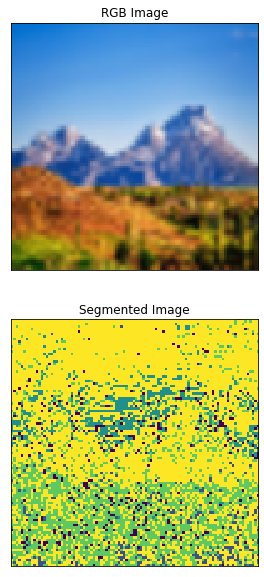

In [232]:
# plot the segmented image for no of clusters 5
colorvals = {'0': [173, 216, 230], '1': [144,238,144], '2': (222,184,135), '3': (139,69,19), '4': (0, 0, 0)}
fig, ax = plt.subplots(2, figsize=(10, 10))

ax[0].imshow(image)
ax[0].set_title("RGB Image")
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].imshow(labels)
ax[1].set_title("Segmented Image")
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()